Generating Graph 1: Impact of Window Size...


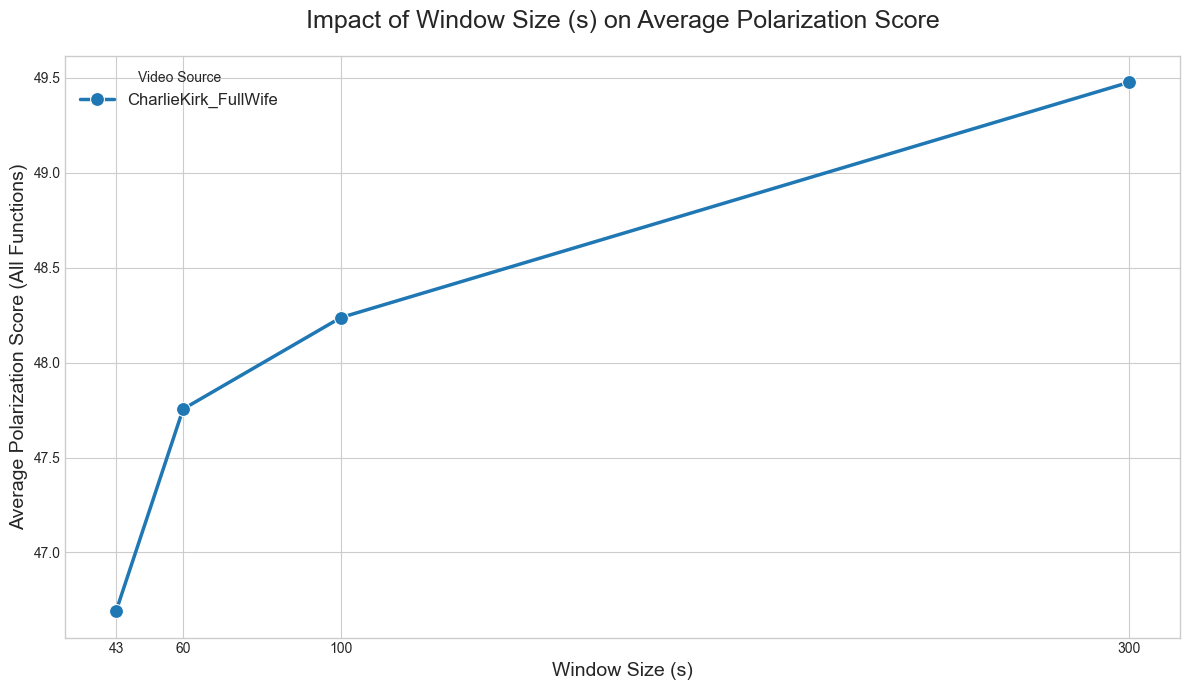

Generating Graph 2: Impact of Frame Sampling Rate...


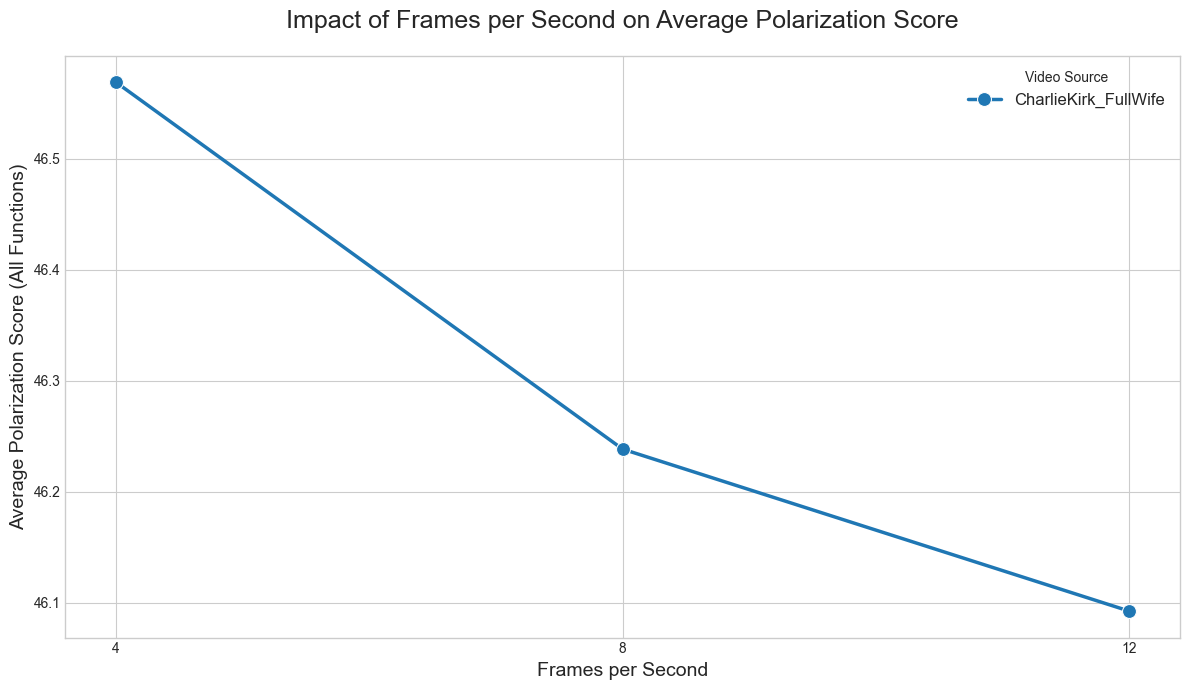

Generating Graph 3: Comparison of Polarization Functions...


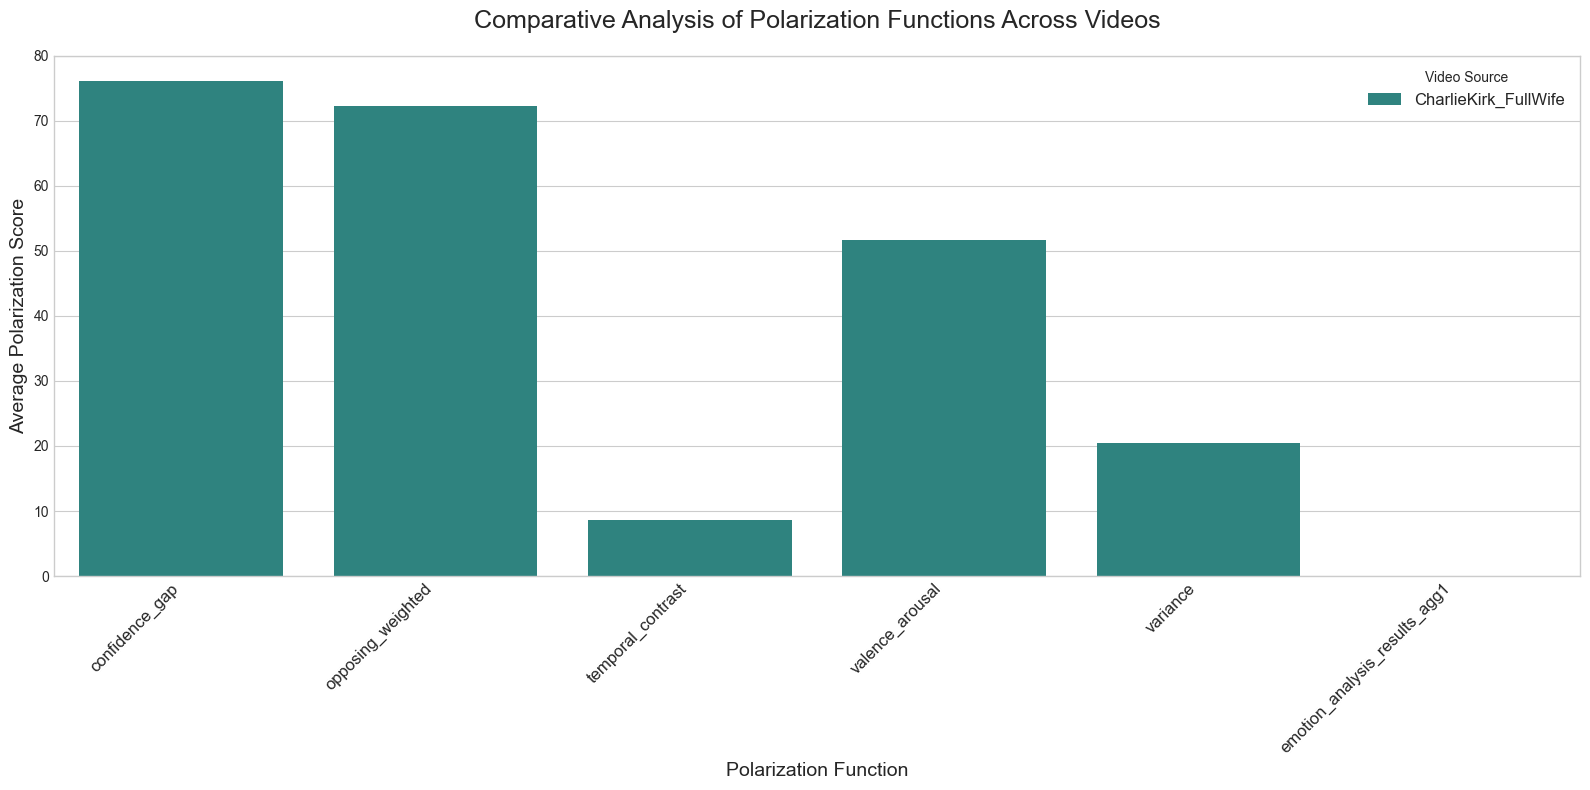

Done.


In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
BASE_PATH = "./Analysis"
VIDEO_FOLDERS = ["CharlieKirk_FullWife", "Indian_ParliAngry", "Zohran_Mamdani"]

def parse_data(base_path, video_folders):
    """
    Walks through the directory structure, parses experiment parameters from folder names,
    and aggregates all CSV results into a single pandas DataFrame.
    """
    all_results = []

    for video in video_folders:
        video_path = os.path.join(base_path, video)
        if not os.path.isdir(video_path):
            continue

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
            
            # --- Experiment 1: Comparing Aggregation Functions ---
            if experiment_folder.startswith('Agg_functions_changed_e1'):
                for csv_file in os.listdir(experiment_path):
                    if not csv_file.endswith('.csv'):
                        continue
                    
                    func_name = csv_file.replace('.csv', '')
                    df = pd.read_csv(os.path.join(experiment_path, csv_file))
                    mean_score = df['polarization_score'].mean()
                    
                    all_results.append({
                        'video': video,
                        'experiment': 'Function Comparison',
                        'parameter': 'N/A',
                        'value': 0,
                        'function': func_name,
                        'mean_score': mean_score
                    })

            # --- Experiment 2: Changing Window Size ---
            elif experiment_folder.startswith('Window_size_changed_e2'):
                for param_folder in os.listdir(experiment_path):
                    # Extract numeric value from folder name like "window_size=43"
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                    
                    win_size = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)
                    
                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                            continue
                        
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        
                        all_results.append({
                            'video': video,
                            'experiment': 'Window Size',
                            'parameter': 'Window Size (s)',
                            'value': win_size,
                            'function': func_name,
                            'mean_score': mean_score
                        })

            # --- Experiment 3: Changing Frame Samples ---
            elif experiment_folder.startswith('Frame_samples_changed_e3'):
                for param_folder in os.listdir(experiment_path):
                    # Extract numeric value from folder name like "frames=4"
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                        
                    frame_rate = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)

                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                             continue

                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()

                        all_results.append({
                            'video': video,
                            'experiment': 'Frame Samples',
                            'parameter': 'Frames per Second',
                            'value': frame_rate,
                            'function': func_name,
                            'mean_score': mean_score
                        })

    return pd.DataFrame(all_results)

def plot_parameter_impact(df, experiment_name, parameter_name):
    """
    Creates a line plot showing the impact of a parameter (e.g., window size)
    on the average polarization score across all functions.
    """
    # Filter for the specific experiment
    exp_df = df[df['experiment'] == experiment_name].copy()
    
    # Calculate the average score across all 5 functions for each parameter value and video
    plot_data = exp_df.groupby(['video', 'value'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data,
        x='value',
        y='mean_score',
        hue='video',
        style='video',
        markers=True,
        dashes=False,
        linewidth=2.5,
        markersize=10
    )
    
    ax.set_title(f'Impact of {parameter_name} on Average Polarization Score', fontsize=18, pad=20)
    ax.set_xlabel(parameter_name, fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(plot_data['value'].unique()) # Ensure all parameter values are shown as ticks
    plt.tight_layout()
    plt.show()

def plot_function_comparison(df):
    """
    Creates a grouped bar chart to compare the output of different polarization
    functions across all videos.
    """
    # Filter for the baseline function comparison experiment
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    
    # Clean up function names for better readability on the plot
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 8))

    ax = sns.barplot(
        data=func_df,
        x='function',
        y='mean_score',
        hue='video',
        palette='viridis'
    )

    ax.set_title('Comparative Analysis of Polarization Functions Across Videos', fontsize=18, pad=20)
    ax.set_xlabel('Polarization Function', fontsize=14)
    ax.set_ylabel('Average Polarization Score', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate labels for readability
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # 1. Parse all experiment data into a single DataFrame
    master_df = parse_data(BASE_PATH, VIDEO_FOLDERS)

    if master_df.empty:
        print("No data found. Please check your BASE_PATH and directory structure.")
    else:
        # 2. Generate the three meaningful graphs
        print("Generating Graph 1: Impact of Window Size...")
        plot_parameter_impact(master_df, 'Window Size', 'Window Size (s)')
        
        print("Generating Graph 2: Impact of Frame Sampling Rate...")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second')
        
        print("Generating Graph 3: Comparison of Polarization Functions...")
        plot_function_comparison(master_df)
        
        print("Done.")

Generating professional visualizations...

Graph 1: Impact of Window Size


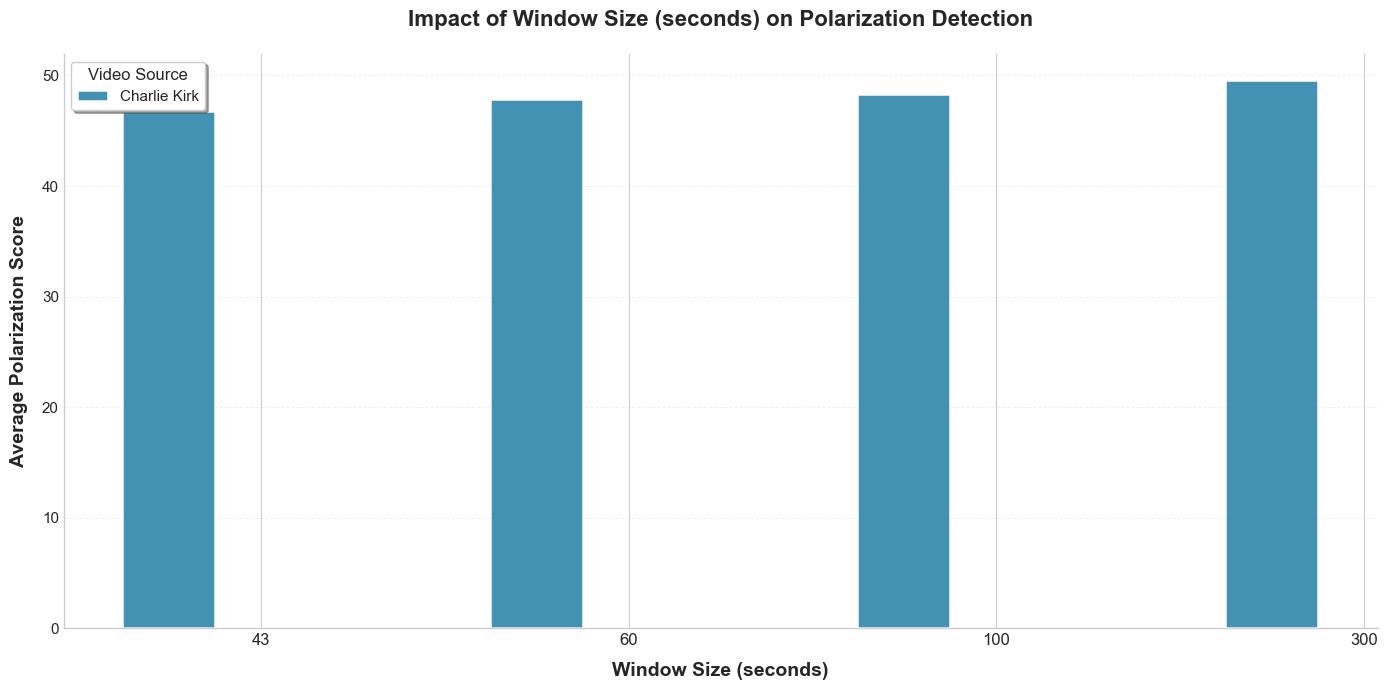

Graph 2: Impact of Frame Sampling Rate


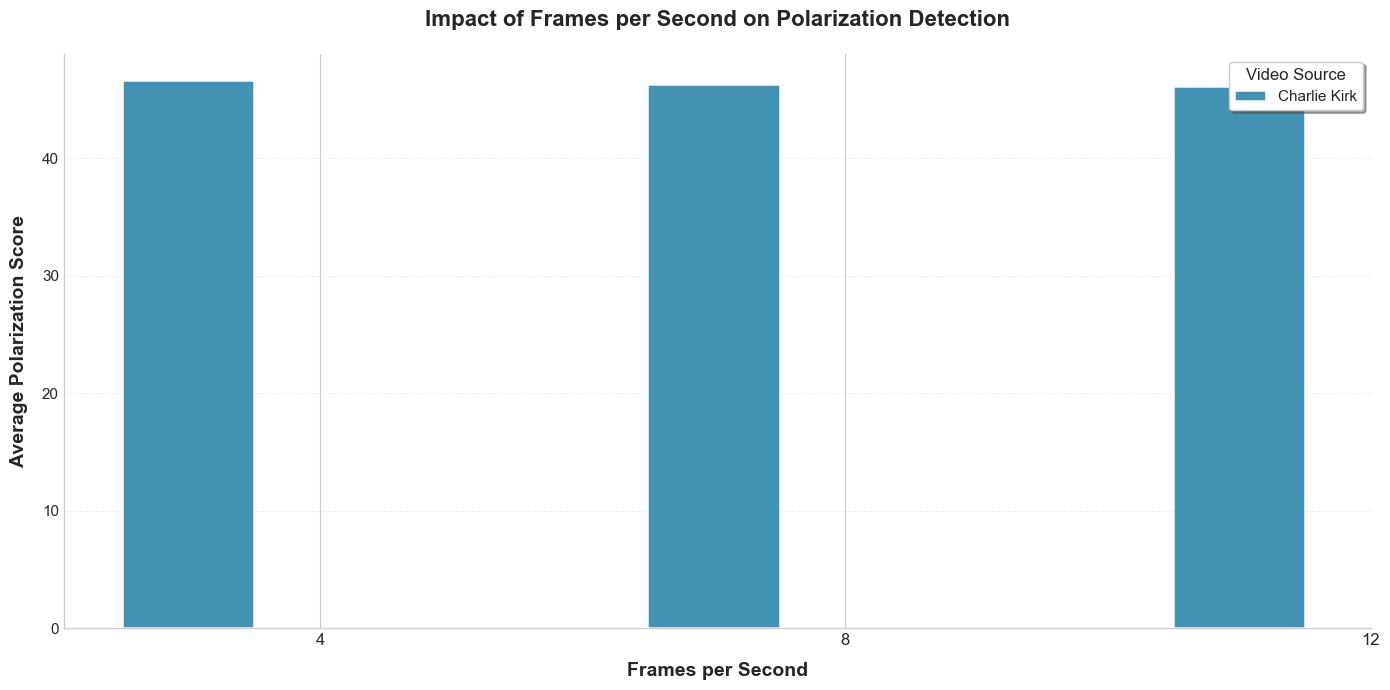

Graph 3: Comparison of Polarization Functions


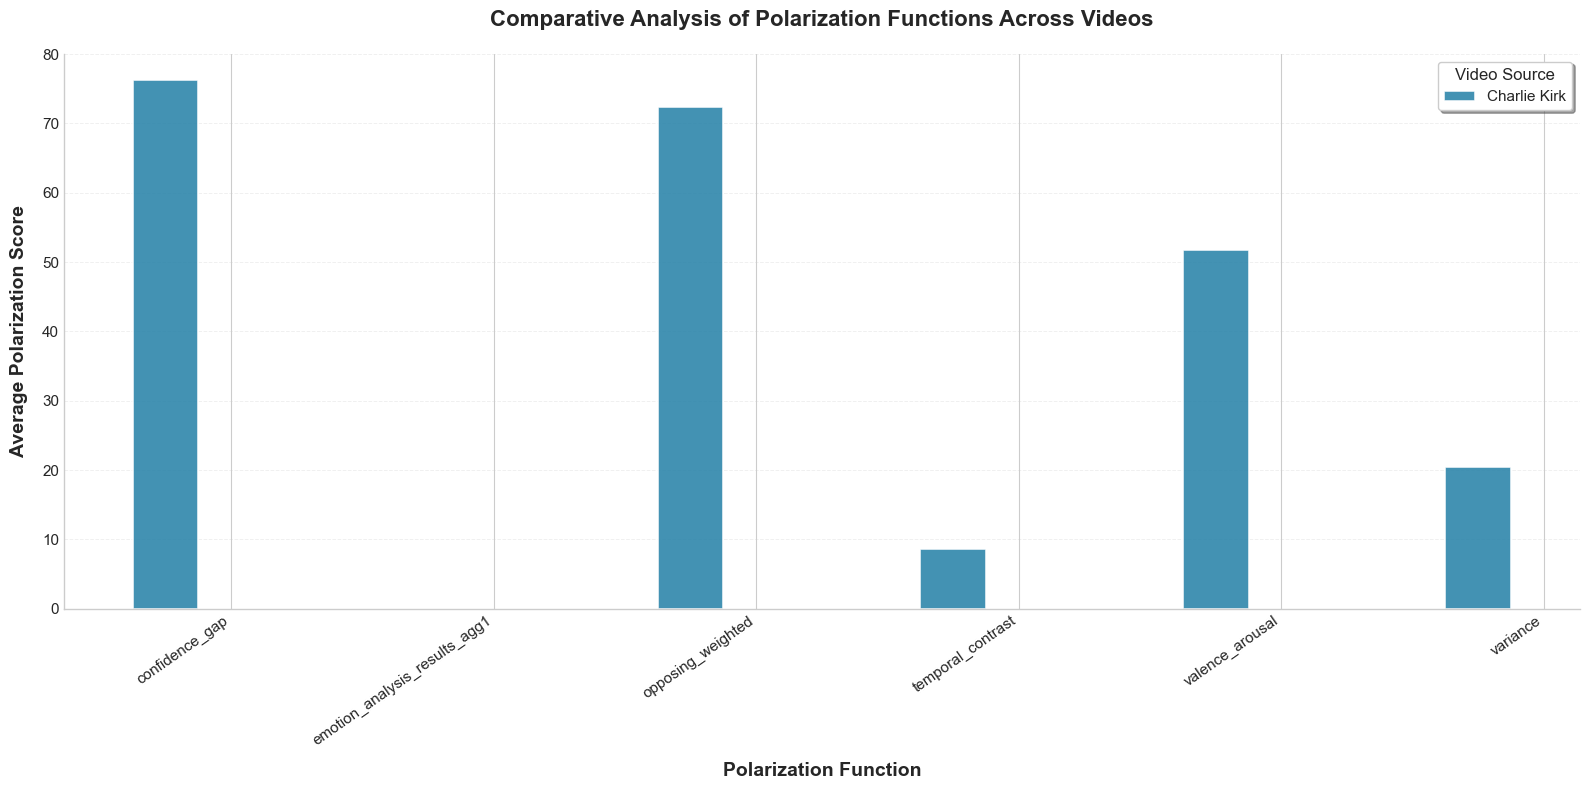


All visualizations generated successfully!
High-resolution images saved as PNG files.


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration ---
BASE_PATH = "./Analysis"
VIDEO_FOLDERS = ["CharlieKirk_FullWife", "Indian_ParliAngry", "Zohran_Mamdani"]

def parse_data(base_path, video_folders):
    """
    Walks through the directory structure, parses experiment parameters from folder names,
    and aggregates all CSV results into a single pandas DataFrame.
    """
    all_results = []

    for video in video_folders:
        video_path = os.path.join(base_path, video)
        if not os.path.isdir(video_path):
            continue

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
            
            # --- Experiment 1: Comparing Aggregation Functions ---
            if experiment_folder.startswith('Agg_functions_changed_e1'):
                for csv_file in os.listdir(experiment_path):
                    if not csv_file.endswith('.csv'):
                        continue
                    
                    func_name = csv_file.replace('.csv', '')
                    df = pd.read_csv(os.path.join(experiment_path, csv_file))
                    mean_score = df['polarization_score'].mean()
                    
                    all_results.append({
                        'video': video,
                        'experiment': 'Function Comparison',
                        'parameter': 'N/A',
                        'value': 0,
                        'function': func_name,
                        'mean_score': mean_score
                    })

            # --- Experiment 2: Changing Window Size ---
            elif experiment_folder.startswith('Window_size_changed_e2'):
                for param_folder in os.listdir(experiment_path):
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                    
                    win_size = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)
                    
                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                            continue
                        
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        
                        all_results.append({
                            'video': video,
                            'experiment': 'Window Size',
                            'parameter': 'Window Size (s)',
                            'value': win_size,
                            'function': func_name,
                            'mean_score': mean_score
                        })

            # --- Experiment 3: Changing Frame Samples ---
            elif experiment_folder.startswith('Frame_samples_changed_e3'):
                for param_folder in os.listdir(experiment_path):
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                        
                    frame_rate = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)

                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                             continue

                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()

                        all_results.append({
                            'video': video,
                            'experiment': 'Frame Samples',
                            'parameter': 'Frames per Second',
                            'value': frame_rate,
                            'function': func_name,
                            'mean_score': mean_score
                        })

    return pd.DataFrame(all_results)

def clean_video_name(name):
    """Convert technical video names to readable labels."""
    name_map = {
        'CharlieKirk_FullWife': 'Charlie Kirk',
        'Indian_ParliAngry': 'Indian Parliament',
        'Zohran_Mamdani': 'Zohran Mamdani'
    }
    return name_map.get(name, name)

def plot_parameter_impact(df, experiment_name, parameter_name, filename=None):
    """
    Creates grouped bar charts showing the impact of a parameter across videos.
    Each video is shown separately for clarity.
    """
    exp_df = df[df['experiment'] == experiment_name].copy()
    exp_df['video_clean'] = exp_df['video'].apply(clean_video_name)
    
    # Average across all functions for each video and parameter value
    plot_data = exp_df.groupby(['video_clean', 'value'])['mean_score'].mean().reset_index()
    
    # Set professional style
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Custom color palette
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    # Get unique values and videos
    values = sorted(plot_data['value'].unique())
    videos = plot_data['video_clean'].unique()
    
    # Bar width and positions
    bar_width = 0.25
    x_pos = np.arange(len(values))
    
    # Plot bars for each video
    for i, video in enumerate(videos):
        video_data = plot_data[plot_data['video_clean'] == video]
        scores = [video_data[video_data['value'] == v]['mean_score'].values[0] 
                 if len(video_data[video_data['value'] == v]) > 0 else 0 
                 for v in values]
        
        ax.bar(x_pos + i * bar_width, scores, bar_width, 
               label=video, color=colors[i], alpha=0.9, 
               edgecolor='white', linewidth=1.2)
    
    # Styling
    ax.set_xlabel(parameter_name, fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Average Polarization Score', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(f'Impact of {parameter_name} on Polarization Detection', 
                fontsize=16, fontweight='bold', pad=20)
    
    ax.set_xticks(x_pos + bar_width)
    ax.set_xticklabels(values, fontsize=12)
    ax.tick_params(axis='y', labelsize=11)
    
    # Enhanced legend
    ax.legend(title='Video Source', fontsize=11, title_fontsize=12, 
             frameon=True, shadow=True, loc='best')
    
    # Add subtle grid
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

def plot_function_comparison(df, filename=None):
    """
    Creates a grouped bar chart comparing polarization functions across videos.
    Shows each video separately instead of averaging.
    """
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function_clean'] = func_df['function'].str.replace('calculate_polarization_', '')
    func_df['video_clean'] = func_df['video'].apply(clean_video_name)
    
    # Set professional style
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Custom color palette
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    # Get unique functions and videos
    functions = sorted(func_df['function_clean'].unique())
    videos = func_df['video_clean'].unique()
    
    # Bar width and positions
    bar_width = 0.25
    x_pos = np.arange(len(functions))
    
    # Plot bars for each video
    for i, video in enumerate(videos):
        video_data = func_df[func_df['video_clean'] == video]
        scores = [video_data[video_data['function_clean'] == f]['mean_score'].values[0] 
                 if len(video_data[video_data['function_clean'] == f]) > 0 else 0 
                 for f in functions]
        
        ax.bar(x_pos + i * bar_width, scores, bar_width, 
               label=video, color=colors[i], alpha=0.9,
               edgecolor='white', linewidth=1.2)
    
    # Styling
    ax.set_xlabel('Polarization Function', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Average Polarization Score', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title('Comparative Analysis of Polarization Functions Across Videos', 
                fontsize=16, fontweight='bold', pad=20)
    
    ax.set_xticks(x_pos + bar_width)
    ax.set_xticklabels(functions, fontsize=11, rotation=35, ha='right')
    ax.tick_params(axis='y', labelsize=11)
    
    # Enhanced legend
    ax.legend(title='Video Source', fontsize=11, title_fontsize=12,
             frameon=True, shadow=True, loc='best')
    
    # Add subtle grid
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Parse all experiment data
    master_df = parse_data(BASE_PATH, VIDEO_FOLDERS)

    if master_df.empty:
        print("No data found. Please check your BASE_PATH and directory structure.")
    else:
        print("Generating professional visualizations...\n")
        
        print("Graph 1: Impact of Window Size")
        plot_parameter_impact(master_df, 'Window Size', 'Window Size (seconds)', 
                            'window_size_impact.png')
        
        print("Graph 2: Impact of Frame Sampling Rate")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            'frame_sampling_impact.png')
        
        print("Graph 3: Comparison of Polarization Functions")
        plot_function_comparison(master_df, 'function_comparison.png')
        
        print("\nAll visualizations generated successfully!")
        print("High-resolution images saved as PNG files.")

Data loaded successfully from all video directories.
Total records parsed: 41

Generating Graph 1: Impact of Window Size...


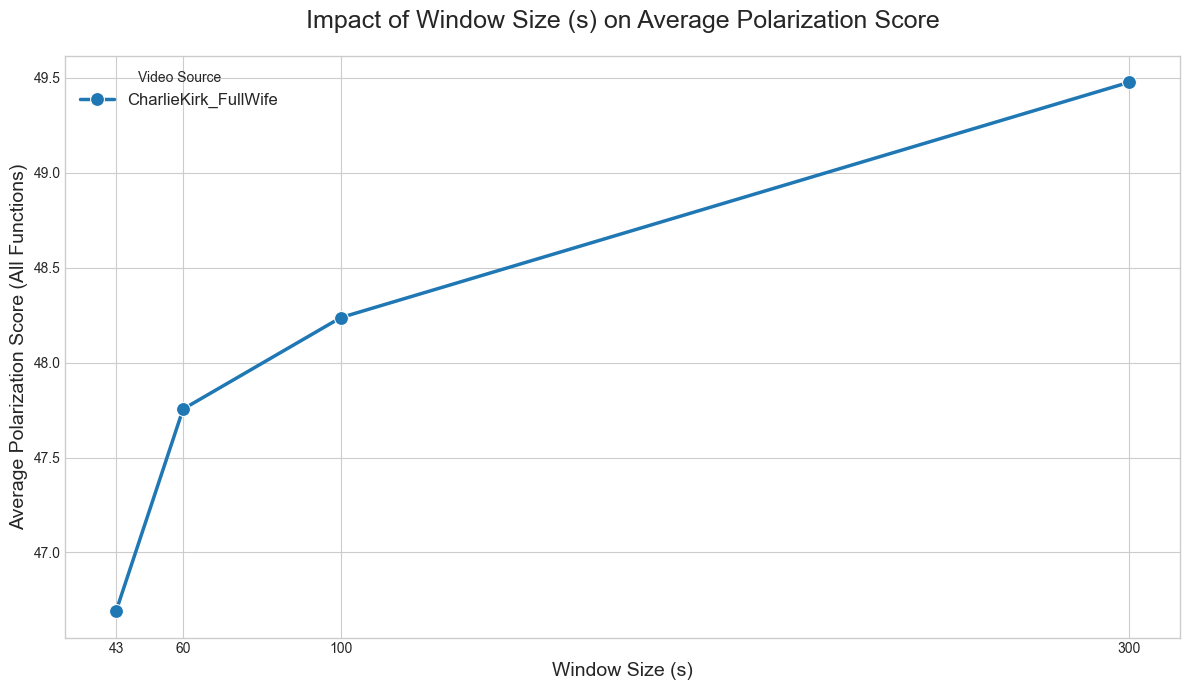

Generating Graph 2: Impact of Frame Sampling Rate...


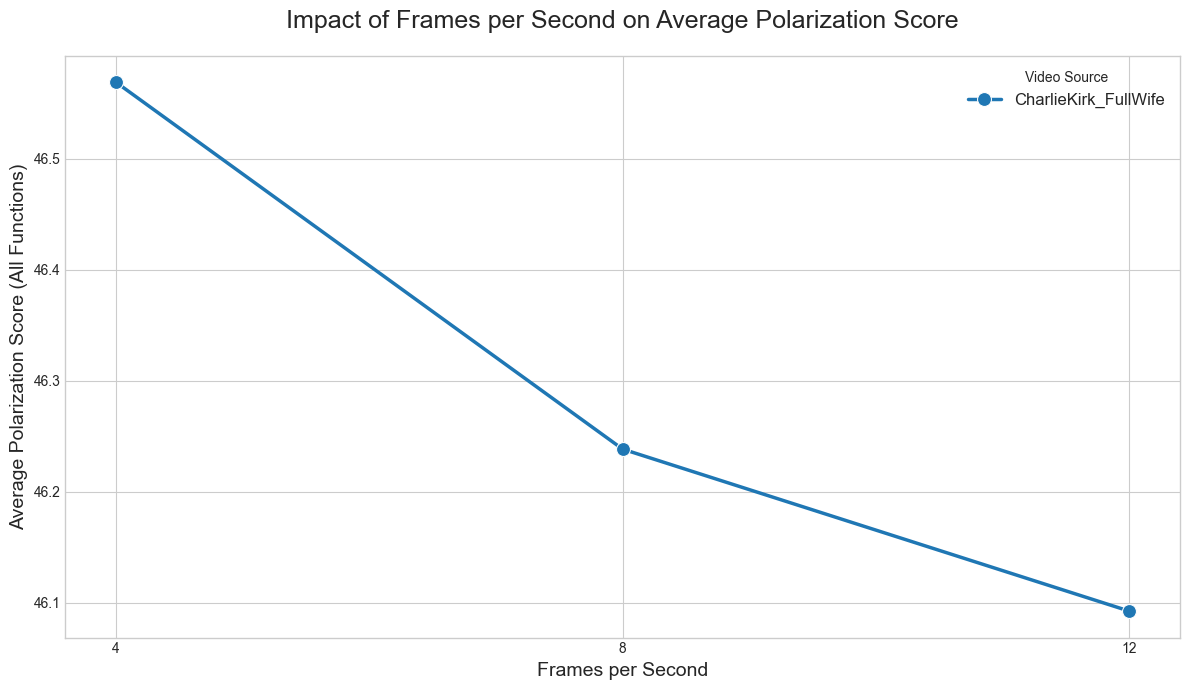

Generating Graph 3: Comparison of Polarization Functions...


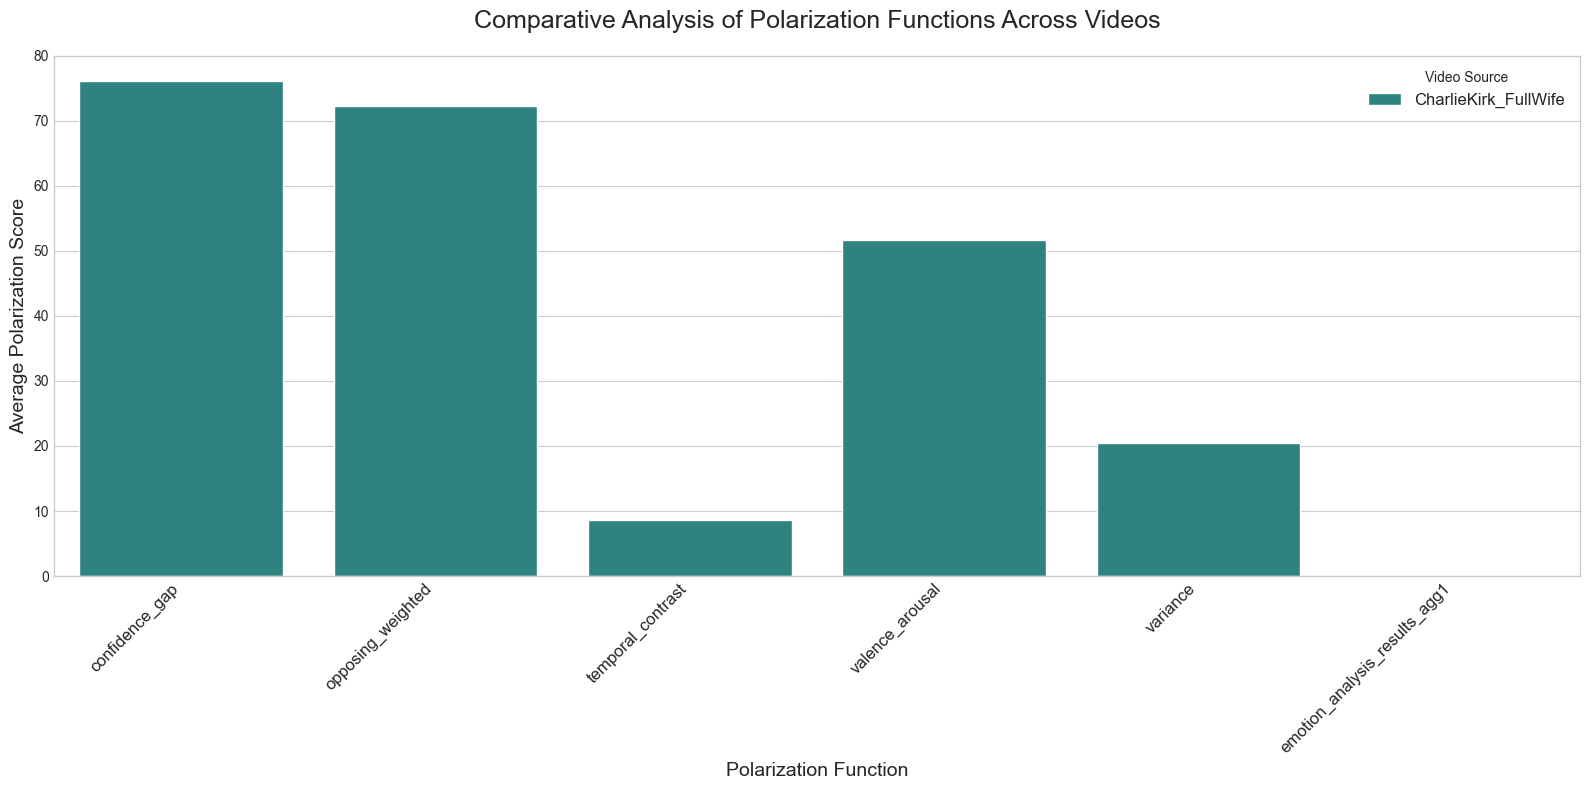


Done.


In [4]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
BASE_PATH = "./Analysis"
VIDEO_FOLDERS = ["CharlieKirk_FullWife", "Indian_ParliAngry", "Zohran_Mamdani"]

def parse_data(base_path, video_folders):
    """
    Walks through the directory structure, parses experiment parameters from folder names,
    and aggregates all CSV results into a single pandas DataFrame.
    (This version is corrected to handle naming inconsistencies.)
    """
    all_results = []

    for video in video_folders:
        video_path = os.path.join(base_path, video)
        if not os.path.isdir(video_path):
            continue

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
            
            # --- CORRECTED LOGIC: Use 'in' for robust matching ---
            
            # --- Experiment 1: Comparing Aggregation Functions ---
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if not csv_file.endswith('.csv'):
                        continue
                    
                    func_name = csv_file.replace('.csv', '')
                    df = pd.read_csv(os.path.join(experiment_path, csv_file))
                    mean_score = df['polarization_score'].mean()
                    
                    all_results.append({
                        'video': video,
                        'experiment': 'Function Comparison',
                        'parameter': 'N/A',
                        'value': 0,
                        'function': func_name,
                        'mean_score': mean_score
                    })

            # --- Experiment 2: Changing Window Size ---
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                    
                    win_size = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)
                    
                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                            continue
                        
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        
                        all_results.append({
                            'video': video,
                            'experiment': 'Window Size',
                            'parameter': 'Window Size (s)',
                            'value': win_size,
                            'function': func_name,
                            'mean_score': mean_score
                        })

            # --- Experiment 3: Changing Frame Samples ---
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    match = re.search(r'(\d+)', param_folder)
                    if not match:
                        continue
                        
                    frame_rate = int(match.group(1))
                    param_path = os.path.join(experiment_path, param_folder)

                    for csv_file in os.listdir(param_path):
                        if not csv_file.endswith('.csv'):
                             continue

                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(param_path, csv_file))
                        mean_score = df['polarization_score'].mean()

                        all_results.append({
                            'video': video,
                            'experiment': 'Frame Samples',
                            'parameter': 'Frames per Second',
                            'value': frame_rate,
                            'function': func_name,
                            'mean_score': mean_score
                        })

    return pd.DataFrame(all_results)

def plot_parameter_impact(df, experiment_name, parameter_name):
    """
    Creates a line plot showing the impact of a parameter (e.g., window size)
    on the average polarization score across all functions.
    """
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data,
        x='value',
        y='mean_score',
        hue='video',
        style='video',
        markers=True,
        dashes=False,
        linewidth=2.5,
        markersize=10
    )
    
    ax.set_title(f'Impact of {parameter_name} on Average Polarization Score', fontsize=18, pad=20)
    ax.set_xlabel(parameter_name, fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(plot_data['value'].unique())
    plt.tight_layout()
    plt.show()

def plot_function_comparison(df):
    """
    Creates a grouped bar chart to compare the output of different polarization
    functions across all videos.
    """
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 8))

    ax = sns.barplot(
        data=func_df,
        x='function',
        y='mean_score',
        hue='video',
        palette='viridis'
    )

    ax.set_title('Comparative Analysis of Polarization Functions Across Videos', fontsize=18, pad=20)
    ax.set_xlabel('Polarization Function', fontsize=14)
    ax.set_ylabel('Average Polarization Score', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    master_df = parse_data(BASE_PATH, VIDEO_FOLDERS)

    if master_df.empty:
        print("No data found. Please check your BASE_PATH and directory structure.")
    else:
        print("Data loaded successfully from all video directories.")
        print(f"Total records parsed: {len(master_df)}")
        
        print("\nGenerating Graph 1: Impact of Window Size...")
        plot_parameter_impact(master_df, 'Window Size', 'Window Size (s)')
        
        print("Generating Graph 2: Impact of Frame Sampling Rate...")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second')
        
        print("Generating Graph 3: Comparison of Polarization Functions...")
        plot_function_comparison(master_df)
        
        print("\nDone.")

Data loaded successfully from all specified video directories.
Total records parsed: 121
Video sources found: ['CharlieKirk_FullWife' 'Indian_ParliAngry' 'Zohran_Mamdani']

Generating Graph 1: Impact of Window Size...


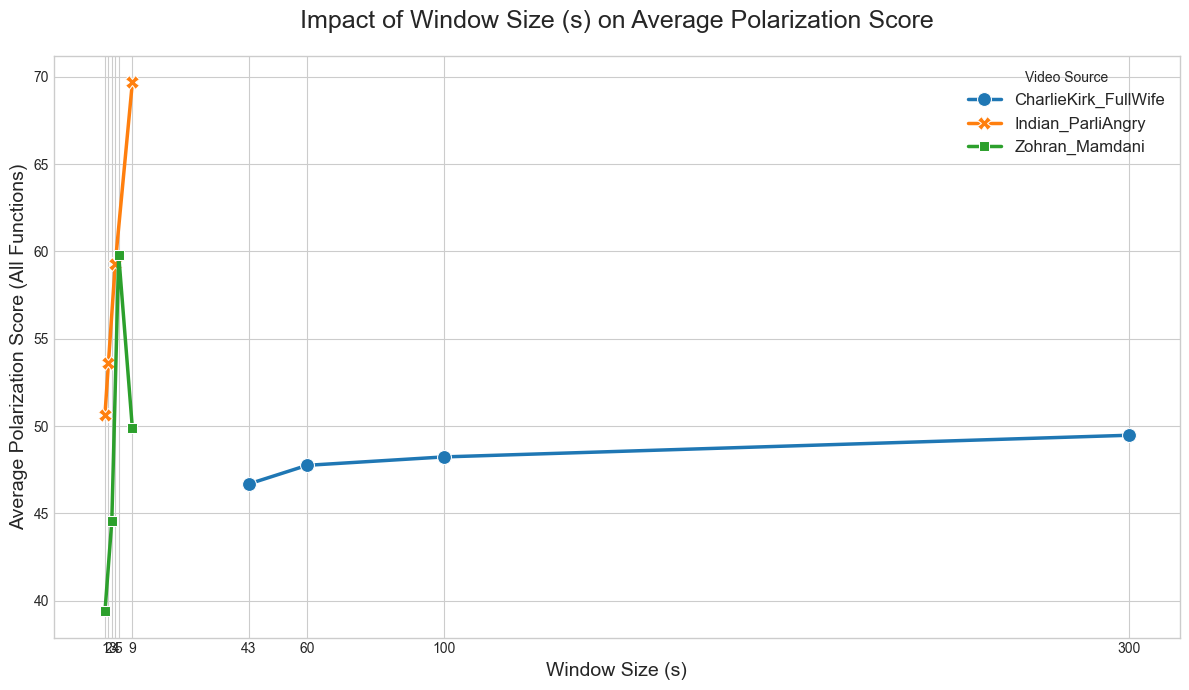

Generating Graph 2: Impact of Frame Sampling Rate...


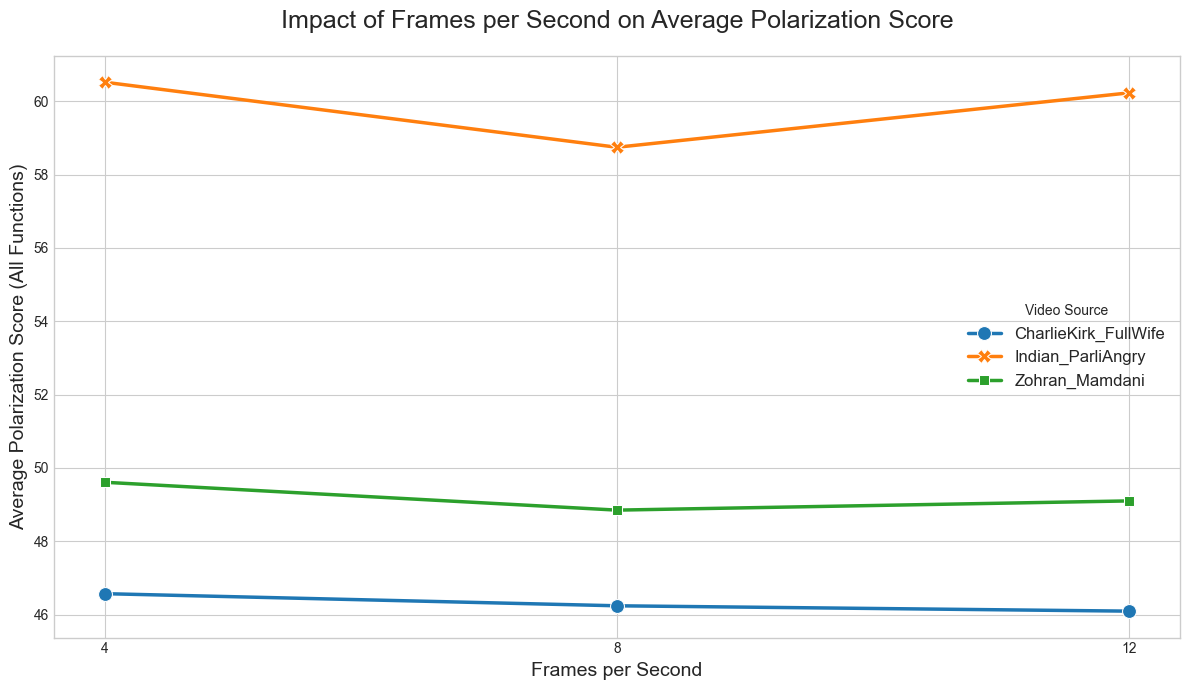

Generating Graph 3: Comparison of Polarization Functions...


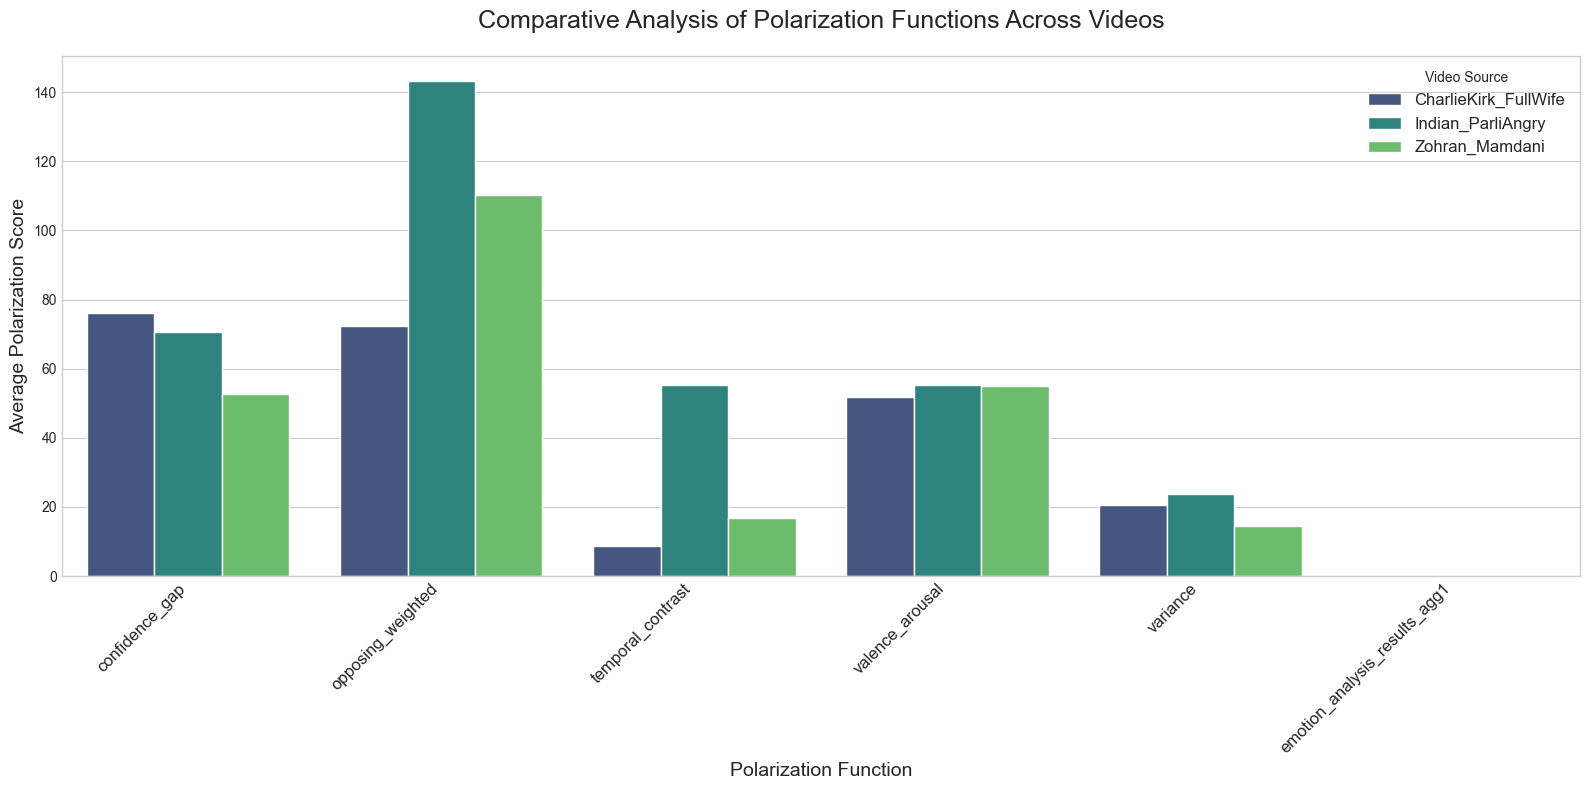


Done.


In [5]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Define the explicit relative paths to each main video analysis folder
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

def parse_data(video_paths):
    """
    Walks through the specified directory paths, parses experiment parameters,
    and aggregates all CSV results into a single pandas DataFrame.
    """
    all_results = []

    # Iterate through the full path of each video's result folder
    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
        
        # Extract the base folder name (e.g., "CharlieKirk_FullWife") for labeling
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
            
            # --- Experiment 1: Comparing Aggregation Functions ---
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 'parameter': 'N/A',
                            'value': 0, 'function': func_name, 'mean_score': mean_score
                        })

            # --- Experiment 2: Changing Window Size ---
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                        
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 'parameter': 'Window Size (s)',
                                    'value': win_size, 'function': func_name, 'mean_score': mean_score
                                })

            # --- Experiment 3: Changing Frame Samples ---
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 'parameter': 'Frames per Second',
                                    'value': frame_rate, 'function': func_name, 'mean_score': mean_score
                                })

    return pd.DataFrame(all_results)

def plot_parameter_impact(df, experiment_name, parameter_name):
    """
    Creates a line plot showing the impact of a parameter on the average polarization score.
    """
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data, x='value', y='mean_score', hue='video',
        style='video', markers=True, dashes=False, linewidth=2.5, markersize=10
    )
    
    ax.set_title(f'Impact of {parameter_name} on Average Polarization Score', fontsize=18, pad=20)
    ax.set_xlabel(parameter_name, fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(plot_data['value'].unique())
    plt.tight_layout()
    plt.show()

def plot_function_comparison(df):
    """
    Creates a grouped bar chart to compare different polarization functions.
    """
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 8))

    ax = sns.barplot(data=func_df, x='function', y='mean_score', hue='video', palette='viridis')

    ax.set_title('Comparative Analysis of Polarization Functions Across Videos', fontsize=18, pad=20)
    ax.set_xlabel('Polarization Function', fontsize=14)
    ax.set_ylabel('Average Polarization Score', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        print("Data loaded successfully from all specified video directories.")
        print(f"Total records parsed: {len(master_df)}")
        print("Video sources found:", master_df['video'].unique())
        
        print("\nGenerating Graph 1: Impact of Window Size...")
        plot_parameter_impact(master_df, 'Window Size', 'Window Size (s)')
        
        print("Generating Graph 2: Impact of Frame Sampling Rate...")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second')
        
        print("Generating Graph 3: Comparison of Polarization Functions...")
        plot_function_comparison(master_df)
        
        print("\nDone.")

Generating Normalized Graph: Impact of Relative Window Size...


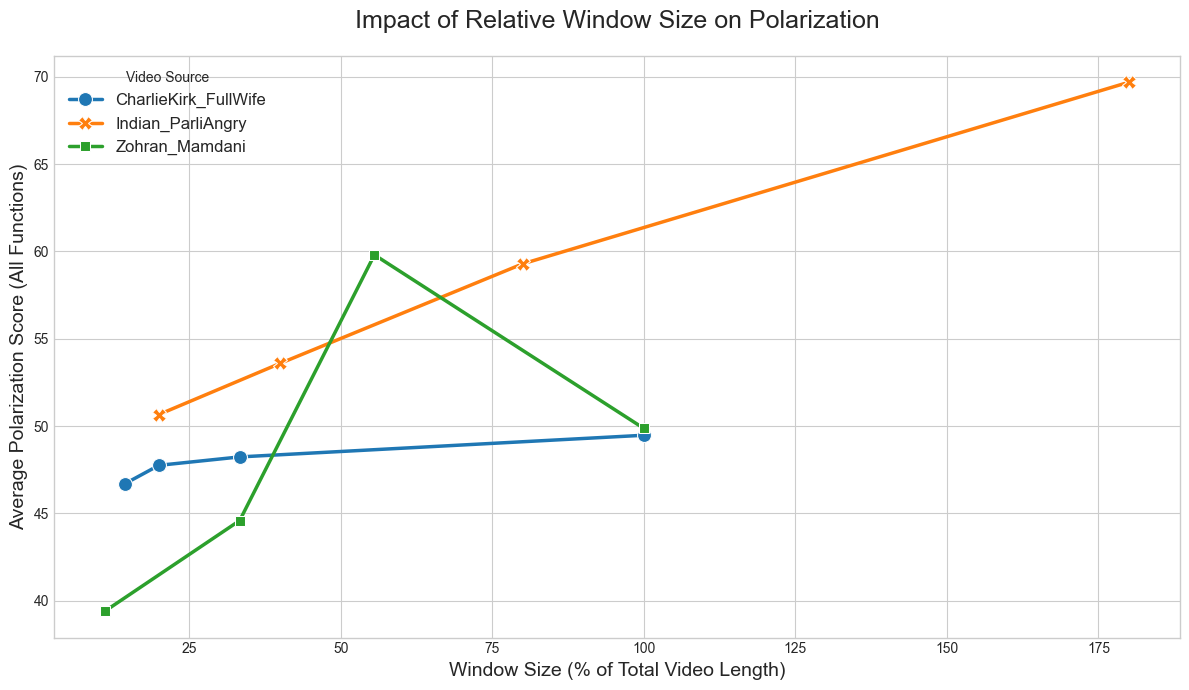

In [6]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

# !! NEW: Define video lengths in seconds !!
VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# (The parse_data function remains the same as the last version)
def parse_data(video_paths):
    all_results = []
    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
        video_name = os.path.basename(video_path)
        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path): continue
            if 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 'parameter': 'Window Size (s)',
                                    'value': win_size, 'function': func_name, 'mean_score': mean_score
                                })
    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths):
    """
    Plots polarization against the window size as a percentage of total video length.
    """
    exp_df = df[df['experiment'] == 'Window Size'].copy()

    # --- NORMALIZATION STEP ---
    # Map the video lengths and calculate the percentage
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
    
    # Calculate the average score across all functions for each relative window size
    plot_data = exp_df.groupby(['video', 'relative_window_size'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data, x='relative_window_size', y='mean_score', hue='video',
        style='video', markers=True, dashes=False, linewidth=2.5, markersize=10
    )
    
    ax.set_title('Impact of Relative Window Size on Polarization', fontsize=18, pad=20)
    ax.set_xlabel('Window Size (% of Total Video Length)', fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    master_df = parse_data(VIDEO_PATHS)
    if not master_df.empty:
        print("Generating Normalized Graph: Impact of Relative Window Size...")
        plot_normalized_window_impact(master_df, VIDEO_LENGTHS)
    else:
        print("No data found.")

Data loaded successfully from all specified video directories.
Total records parsed: 121
Video sources found: ['CharlieKirk_FullWife' 'Indian_ParliAngry' 'Zohran_Mamdani']

Generating Graph 1: Impact of Relative Window Size...


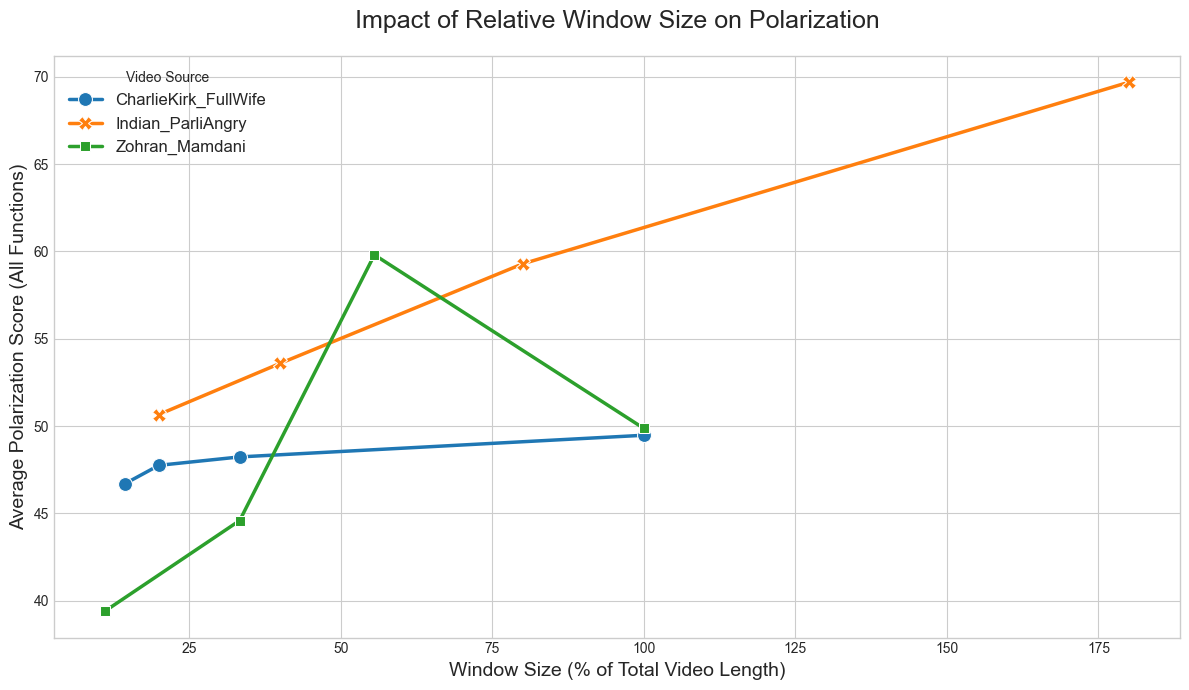

Generating Graph 2: Impact of Frame Sampling Rate...


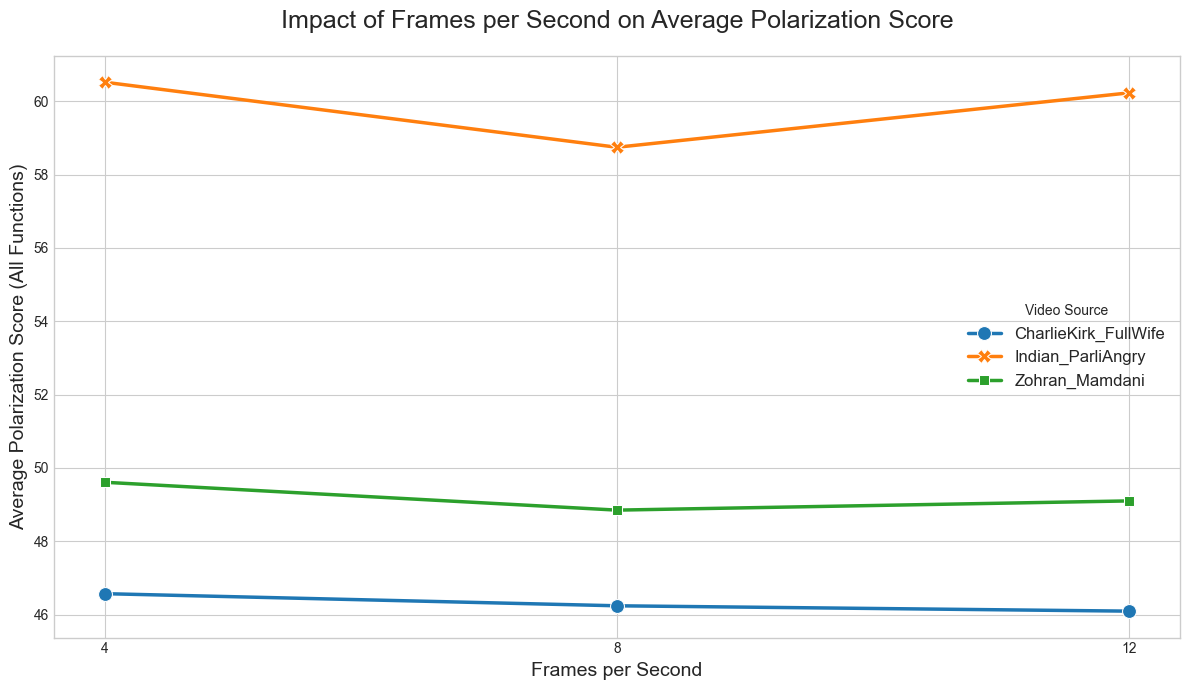

Generating Graph 3: Comparison of Polarization Functions...


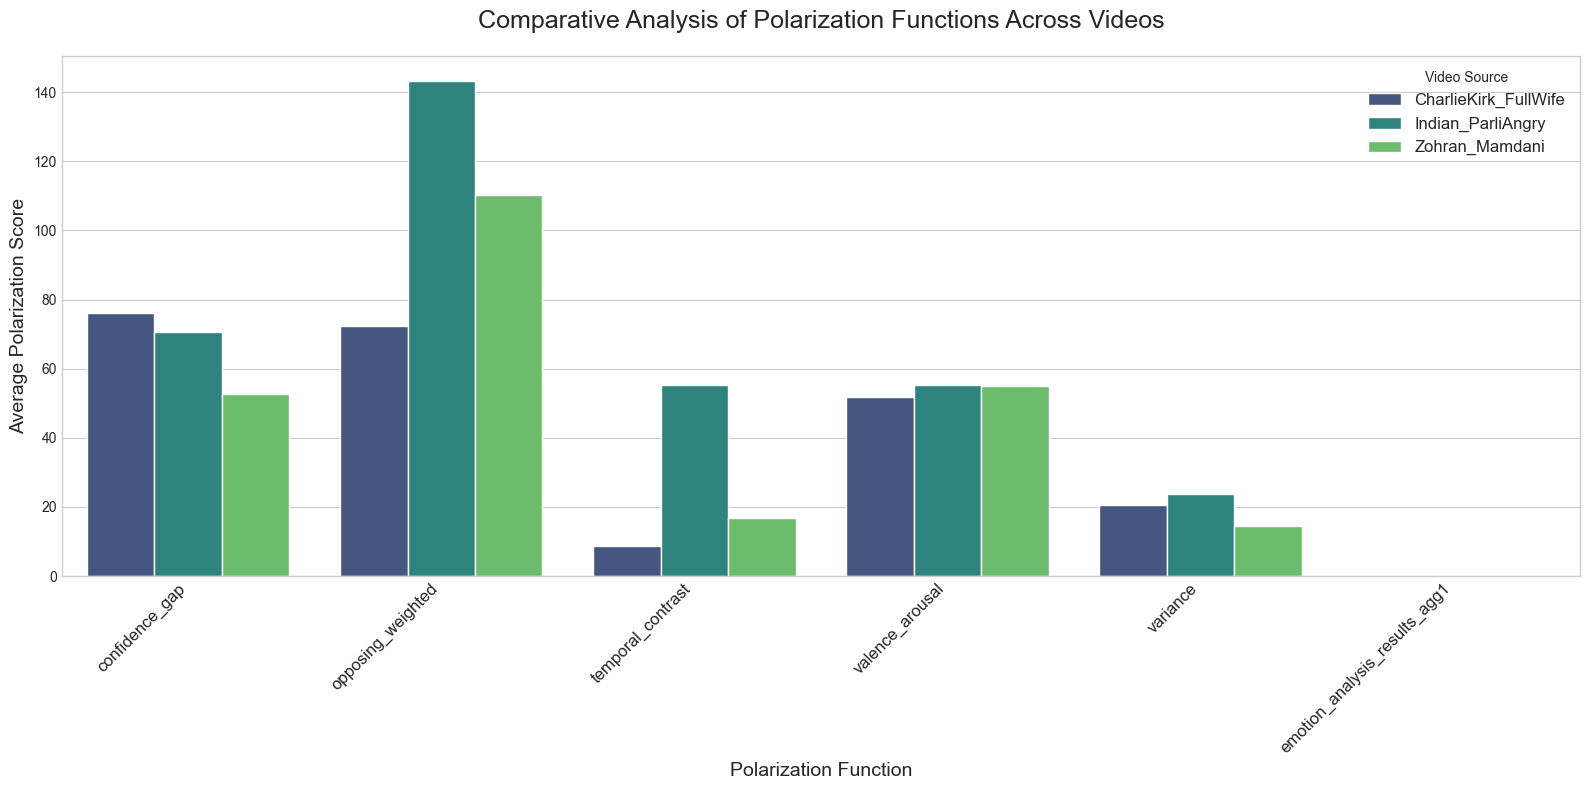


Done.


In [7]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Define the explicit relative paths to each main video analysis folder
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

# Define video lengths in seconds for normalization
VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}


def parse_data(video_paths):
    """
    Walks through all specified directory paths, parses all experiment types,
    and aggregates the CSV results into a single pandas DataFrame.
    """
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
        
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
            
            # --- Experiment 1: Comparing Aggregation Functions ---
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 'parameter': 'N/A',
                            'value': 0, 'function': func_name, 'mean_score': mean_score
                        })

            # --- Experiment 2: Changing Window Size ---
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                        
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 'parameter': 'Window Size (s)',
                                    'value': win_size, 'function': func_name, 'mean_score': mean_score
                                })

            # --- Experiment 3: Changing Frame Samples ---
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 'parameter': 'Frames per Second',
                                    'value': frame_rate, 'function': func_name, 'mean_score': mean_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths):
    """
    Plots polarization against the window size as a percentage of total video length.
    """
    exp_df = df[df['experiment'] == 'Window Size'].copy()

    # --- NORMALIZATION STEP ---
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
    
    plot_data = exp_df.groupby(['video', 'relative_window_size'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data, x='relative_window_size', y='mean_score', hue='video',
        style='video', markers=True, dashes=False, linewidth=2.5, markersize=10
    )
    
    ax.set_title('Impact of Relative Window Size on Polarization', fontsize=18, pad=20)
    ax.set_xlabel('Window Size (% of Total Video Length)', fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name):
    """
    Creates a line plot showing the impact of a parameter (e.g., frame samples)
    on the average polarization score.
    """
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value'])['mean_score'].mean().reset_index()

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 7))
    
    ax = sns.lineplot(
        data=plot_data, x='value', y='mean_score', hue='video',
        style='video', markers=True, dashes=False, linewidth=2.5, markersize=10
    )
    
    ax.set_title(f'Impact of {parameter_name} on Average Polarization Score', fontsize=18, pad=20)
    ax.set_xlabel(parameter_name, fontsize=14)
    ax.set_ylabel('Average Polarization Score (All Functions)', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(sorted(plot_data['value'].unique()))
    plt.tight_layout()
    plt.show()


def plot_function_comparison(df):
    """
    Creates a grouped bar chart to compare different polarization functions.
    """
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(16, 8))

    ax = sns.barplot(data=func_df, x='function', y='mean_score', hue='video', palette='viridis')

    ax.set_title('Comparative Analysis of Polarization Functions Across Videos', fontsize=18, pad=20)
    ax.set_xlabel('Polarization Function', fontsize=14)
    ax.set_ylabel('Average Polarization Score', fontsize=14)
    ax.legend(title='Video Source', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        print("Data loaded successfully from all specified video directories.")
        print(f"Total records parsed: {len(master_df)}")
        print("Video sources found:", master_df['video'].unique())
        
        print("\nGenerating Graph 1: Impact of Relative Window Size...")
        plot_normalized_window_impact(master_df, VIDEO_LENGTHS)
        
        print("Generating Graph 2: Impact of Frame Sampling Rate...")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second')
        
        print("Generating Graph 3: Comparison of Polarization Functions...")
        plot_function_comparison(master_df)
        
        print("\nDone.")

Loading and parsing polarization analysis data...
✓ Data loaded successfully
✓ Total records parsed: 121
✓ Video sources: CharlieKirk_FullWife, Indian_ParliAngry, Zohran_Mamdani

SUMMARY STATISTICS

Function Comparison:
  Videos analyzed: 3
  Configurations tested: 16
  Mean score range: 0.014 - 143.395

Frame Samples:
  Videos analyzed: 3
  Configurations tested: 45
  Mean score range: 8.676 - 132.475

Window Size:
  Videos analyzed: 3
  Configurations tested: 60
  Mean score range: 0.000 - 143.395

GENERATING VISUALIZATIONS

[1/3] Generating: Relative Window Size Analysis (Line Plot)


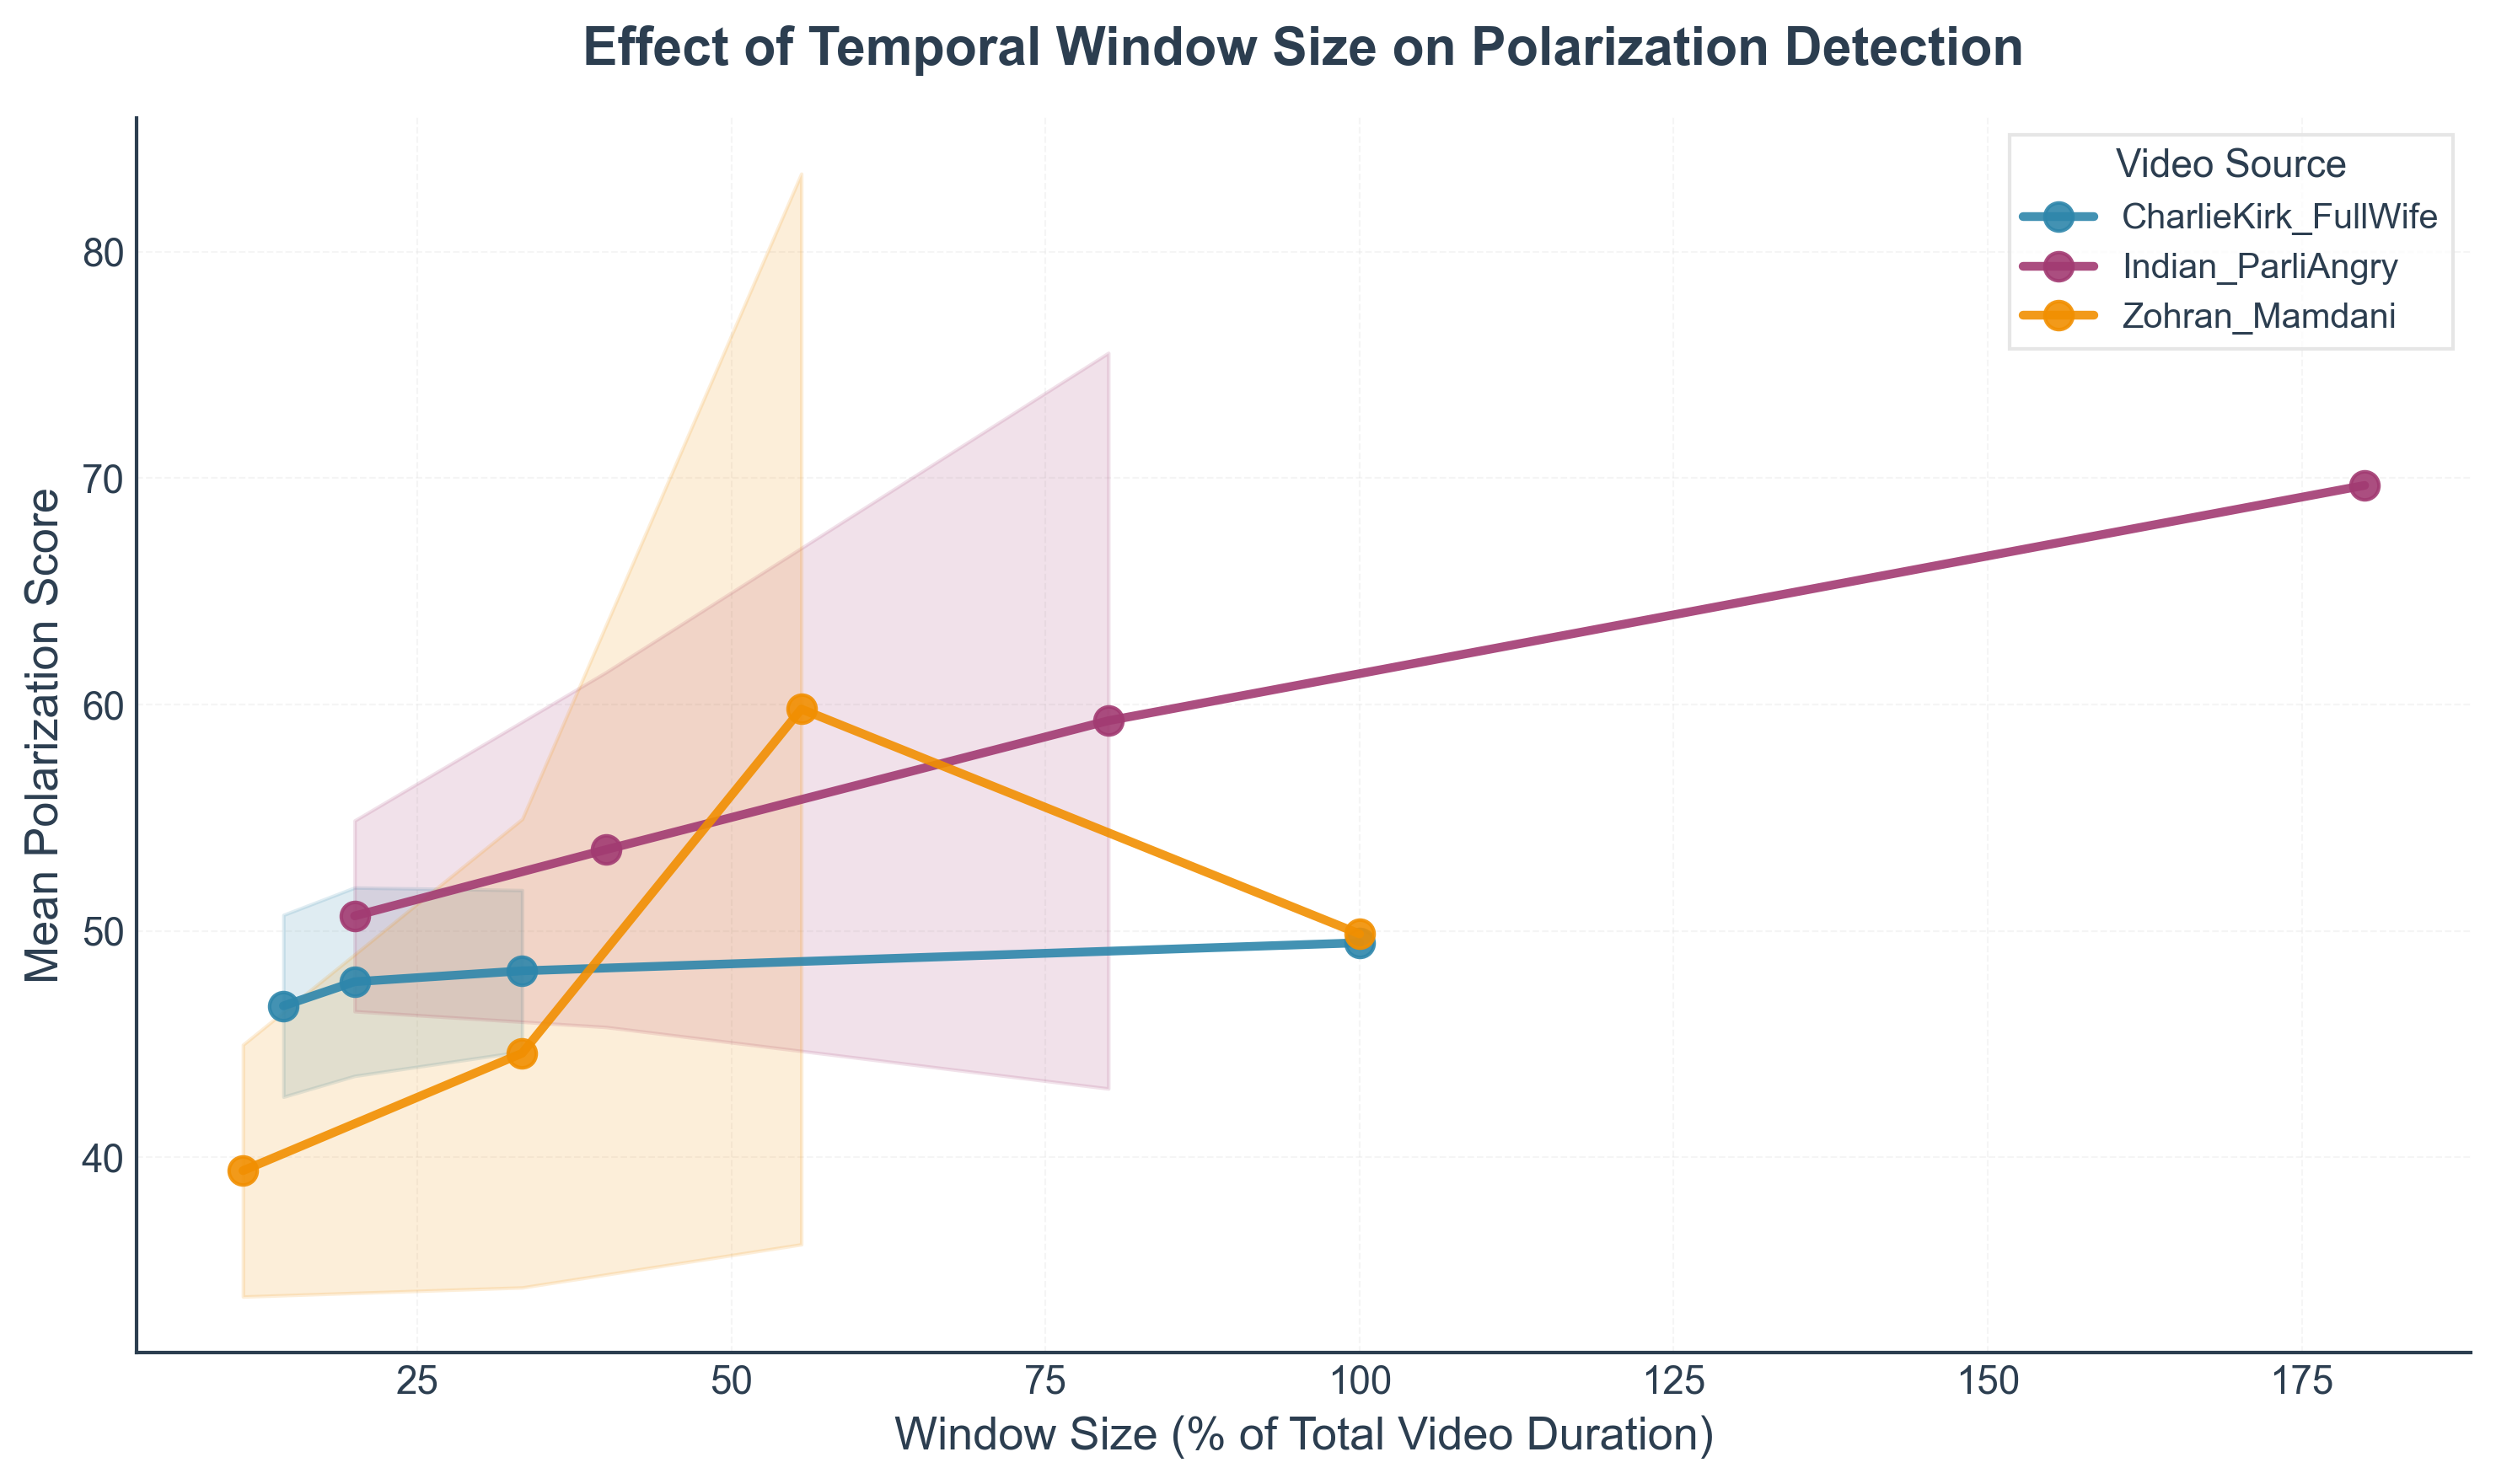

[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)


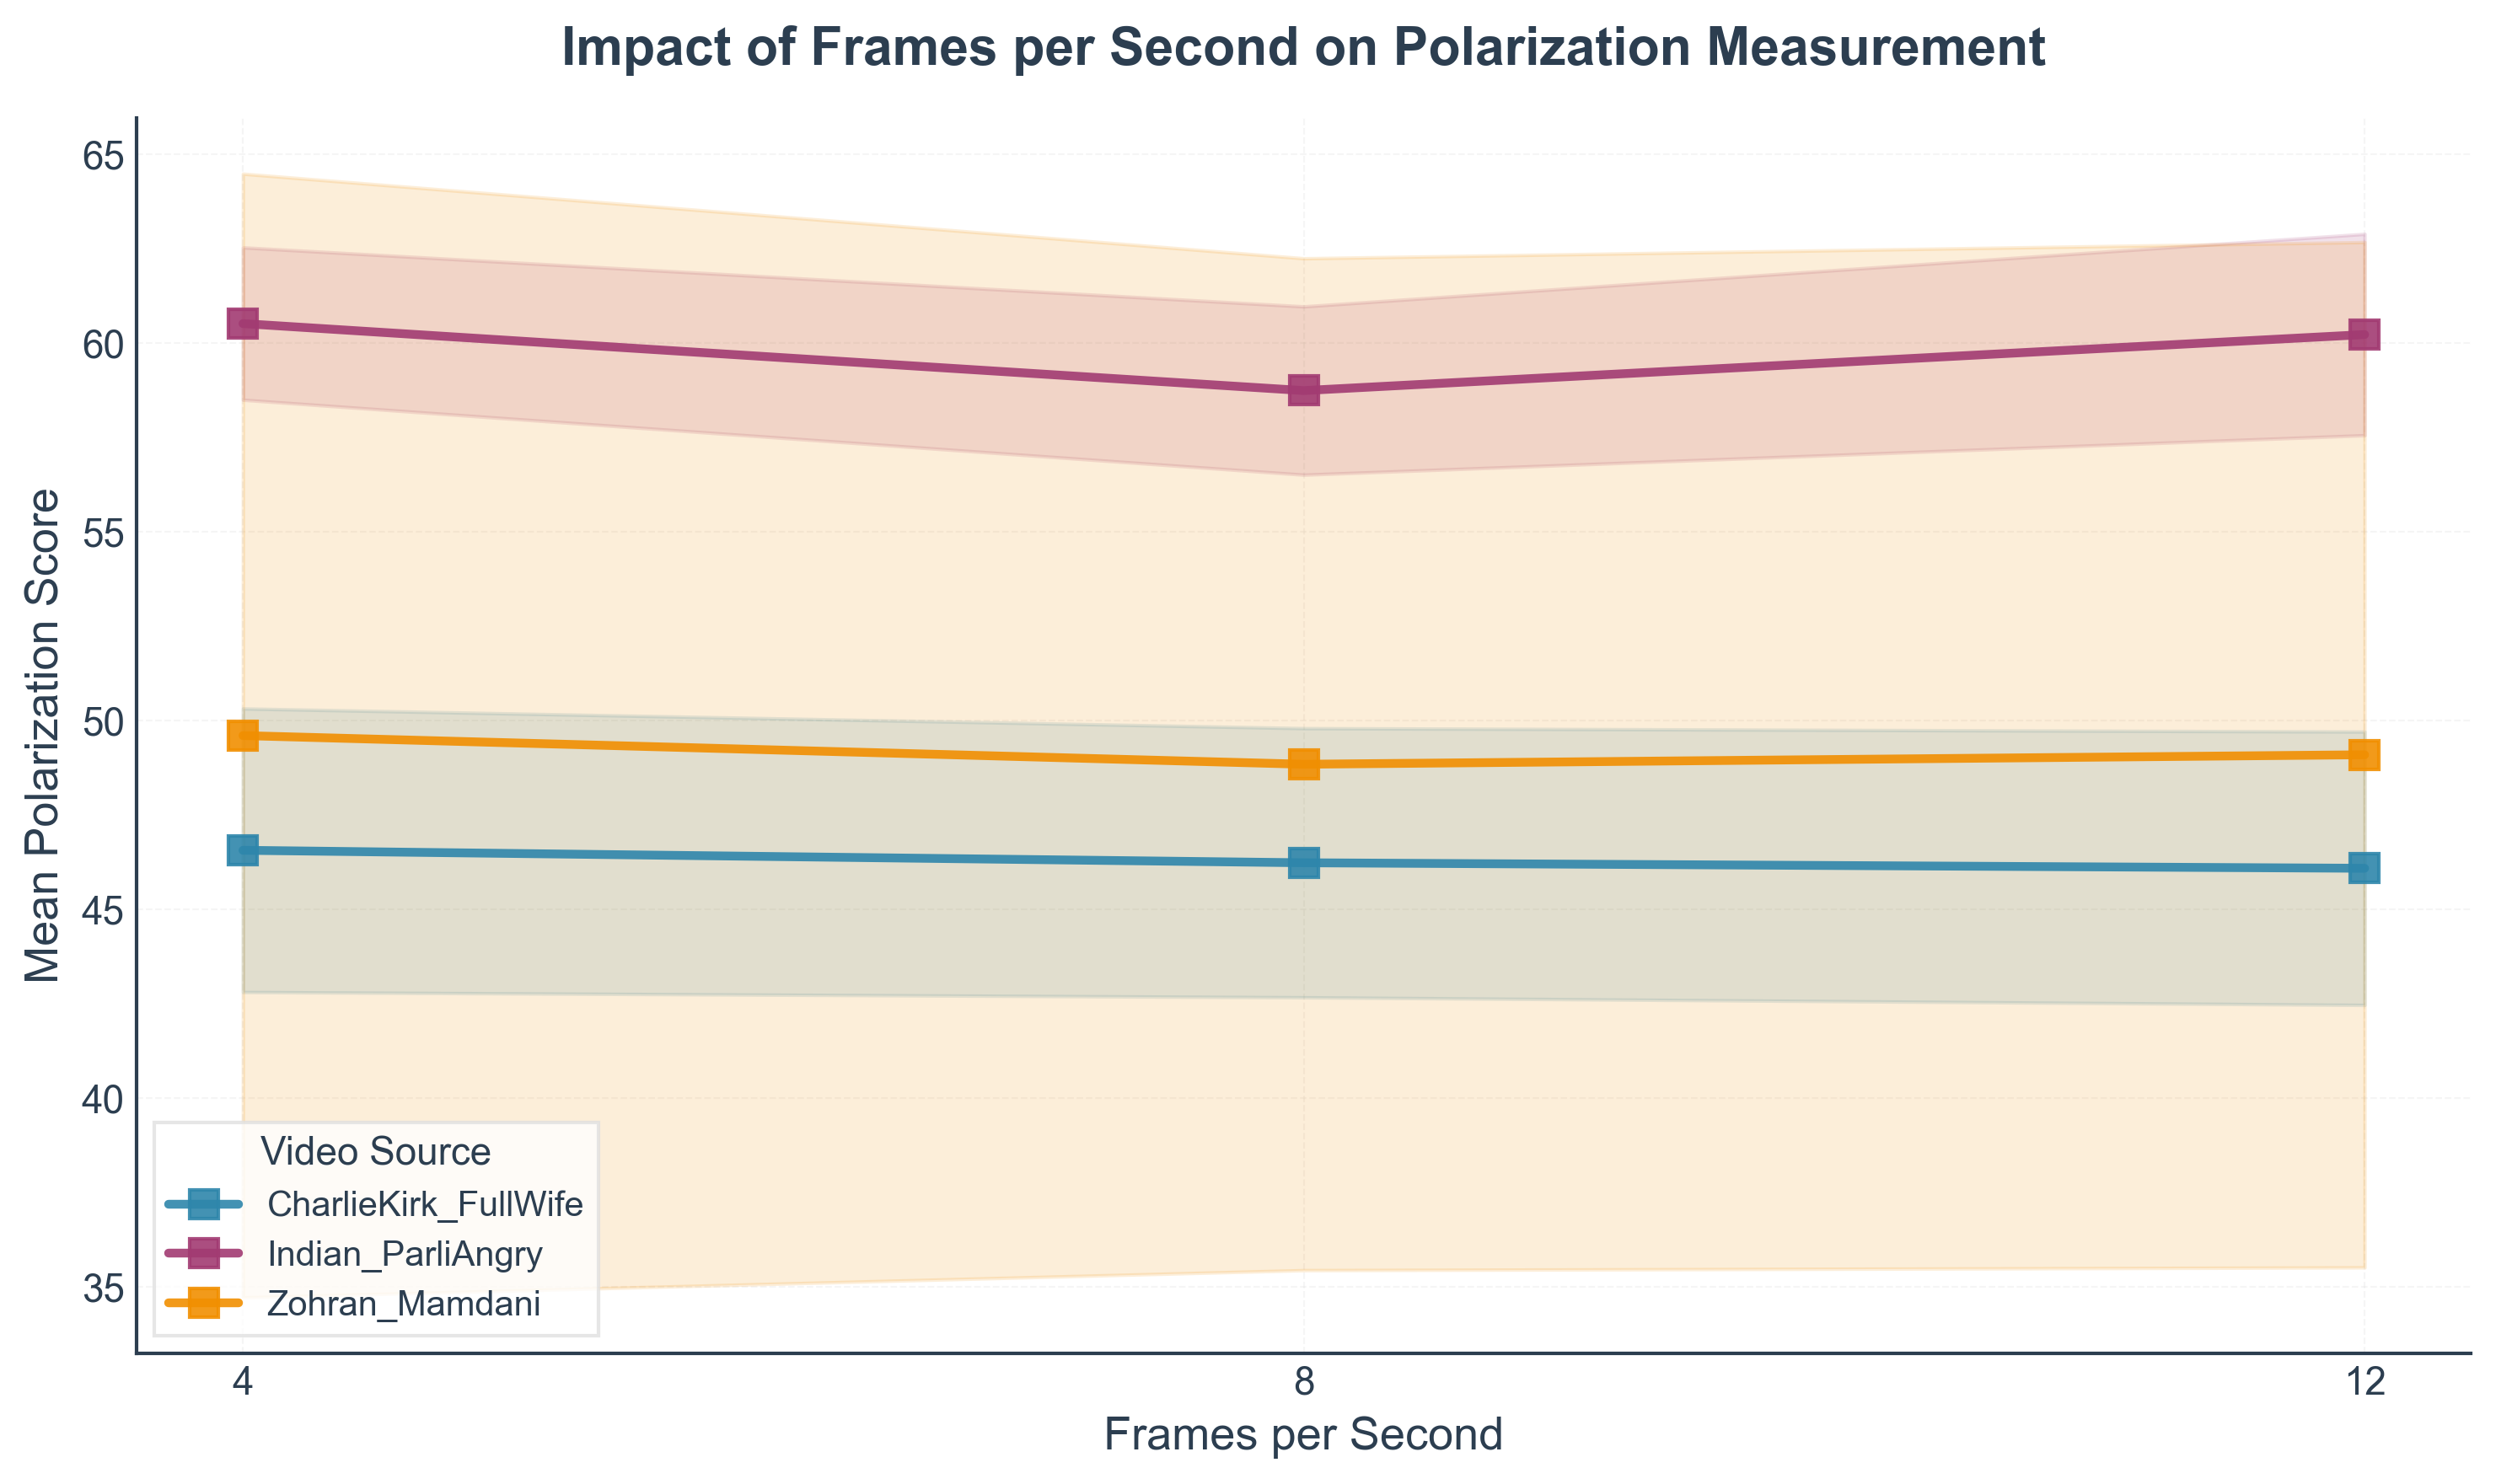

[3/3] Generating: Function Comparison Analysis (Bar Chart)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (5,).

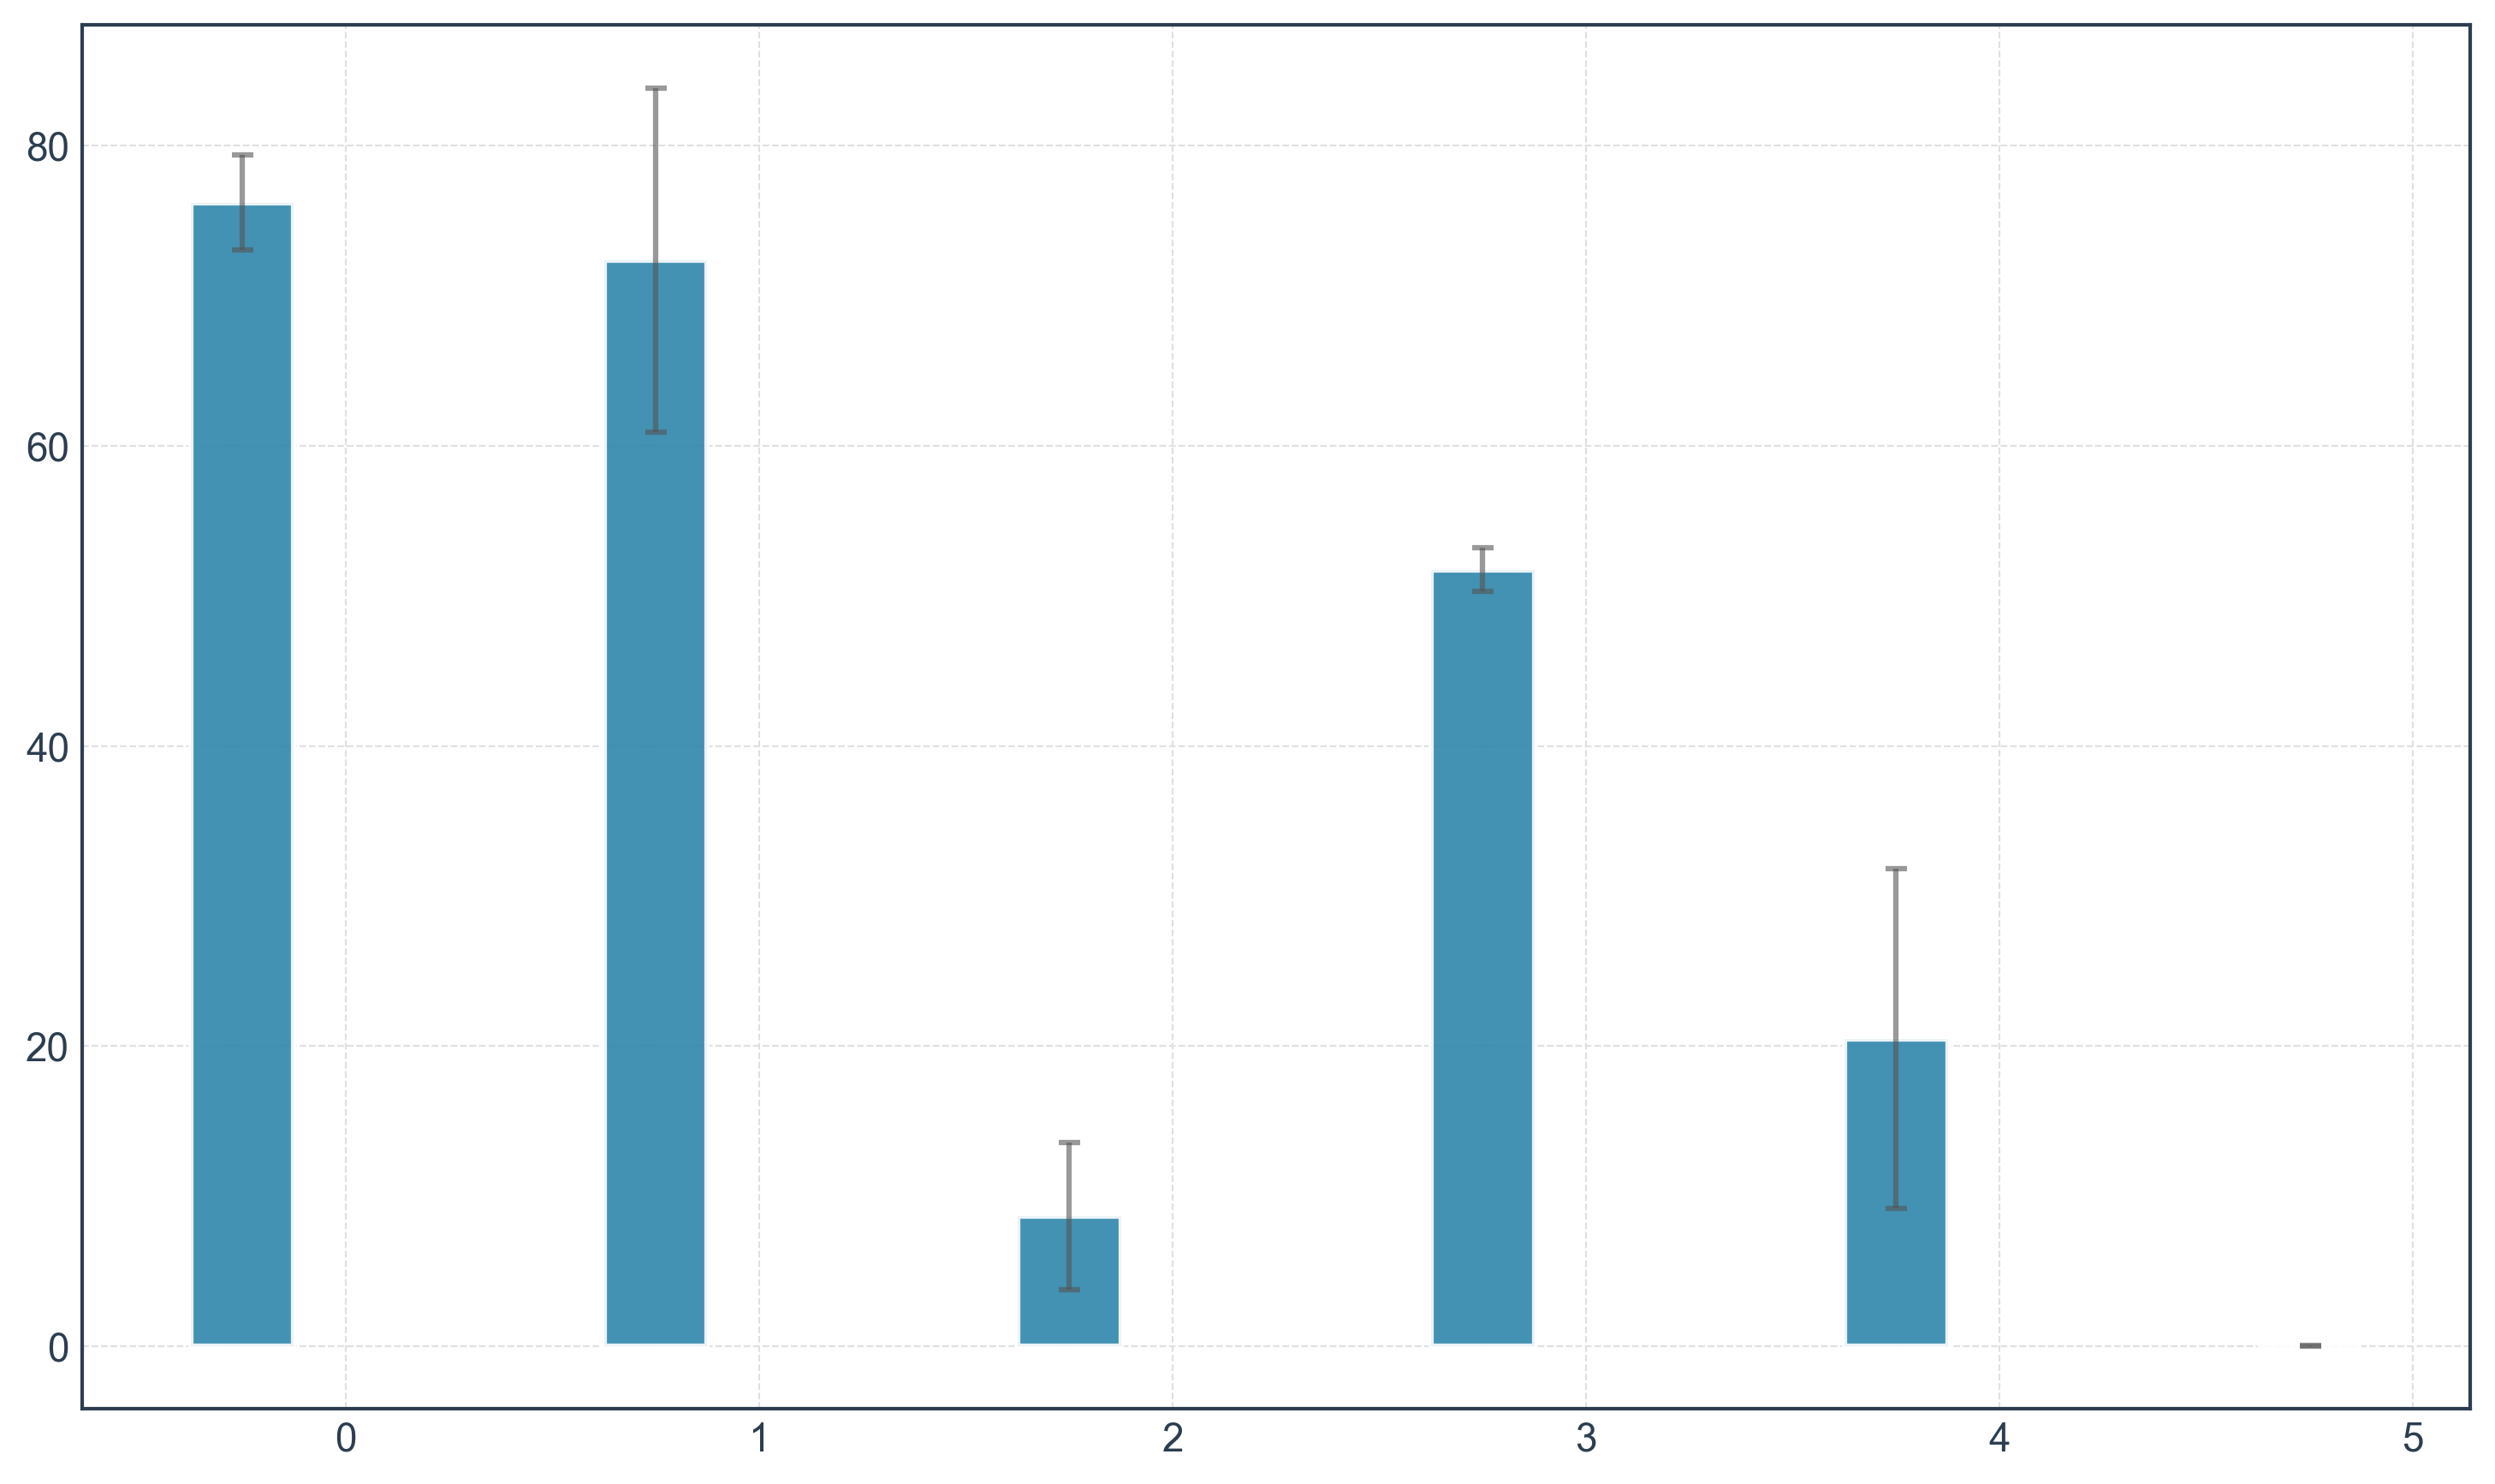

In [9]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# Professional color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'tertiary': '#F18F01',
    'background': '#F8F9FA',
    'grid': '#E0E0E0',
    'text': '#2C3E50'
}

# Custom palette for multiple videos
VIDEO_PALETTE = ['#2E86AB', '#A23B72', '#F18F01']

def set_publication_style():
    """Set consistent professional styling for all plots."""
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = COLORS['text']
    plt.rcParams['axes.labelcolor'] = COLORS['text']
    plt.rcParams['xtick.color'] = COLORS['text']
    plt.rcParams['ytick.color'] = COLORS['text']
    plt.rcParams['text.color'] = COLORS['text']
    plt.rcParams['grid.color'] = COLORS['grid']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11


def parse_data(video_paths):
    """Parse all experiment data into a DataFrame."""
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
       
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
           
            # Experiment 1: Aggregation Functions
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        std_score = df['polarization_score'].std()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 
                            'parameter': 'N/A', 'value': 0, 'function': func_name, 
                            'mean_score': mean_score, 'std_score': std_score
                        })

            # Experiment 2: Window Size
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                       
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 
                                    'parameter': 'Window Size (s)', 'value': win_size, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

            # Experiment 3: Frame Samples
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 
                                    'parameter': 'Frames per Second', 'value': frame_rate, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths, save_path=None):
    """
    Line plot for window size impact - best for showing trends over continuous variables.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == 'Window Size'].copy()
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
   
    plot_data = exp_df.groupby(['video', 'relative_window_size']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    for idx, video in enumerate(plot_data['video'].unique()):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['relative_window_size'], video_data['mean_score'], 
                marker='o', linewidth=2.5, markersize=8, 
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        # Add confidence bands
        ax.fill_between(video_data['relative_window_size'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel('Window Size (% of Total Video Duration)', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Effect of Temporal Window Size on Polarization Detection', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11, 
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name, save_path=None):
    """
    Line plot for frame sampling - shows trends in discrete sampling rates.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
   
    for idx, video in enumerate(plot_data['video'].unique()):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['value'], video_data['mean_score'], 
                marker='s', linewidth=2.5, markersize=8,
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['value'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel(parameter_name, fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title(f'Impact of {parameter_name} on Polarization Measurement', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set integer ticks for discrete values
    ax.set_xticks(sorted(plot_data['value'].unique()))
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_function_comparison(df, save_path=None):
    """
    Grouped bar chart - best for comparing categorical functions across videos.
    """
    set_publication_style()
    
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    # Clean up function names for better readability
    func_df['function'] = func_df['function'].str.replace('_', ' ').str.title()
   
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

    x = np.arange(len(func_df['function'].unique()))
    width = 0.25
    
    videos = func_df['video'].unique()
    for idx, video in enumerate(videos):
        video_data = func_df[func_df['video'] == video]
        positions = x + (idx - 1) * width
        
        bars = ax.bar(positions, video_data['mean_score'], width, 
                      label=video, color=VIDEO_PALETTE[idx], alpha=0.9,
                      edgecolor='white', linewidth=1.5)
        
        # Add error bars if std available
        if 'std_score' in video_data.columns:
            ax.errorbar(positions, video_data['mean_score'], 
                       yerr=video_data['std_score'],
                       fmt='none', ecolor='#555555', capsize=3, 
                       capthick=1.5, alpha=0.6)

    ax.set_xlabel('Polarization Aggregation Function', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Comparative Performance of Polarization Functions', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.set_xticks(x)
    ax.set_xticklabels(func_df['function'].unique(), rotation=35, ha='right', fontsize=10)
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    
    ax.grid(True, alpha=0.3, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def generate_summary_statistics(df):
    """Generate and print summary statistics for the report."""
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    for experiment in df['experiment'].unique():
        print(f"\n{experiment}:")
        exp_data = df[df['experiment'] == experiment]
        print(f"  Videos analyzed: {exp_data['video'].nunique()}")
        print(f"  Configurations tested: {len(exp_data)}")
        print(f"  Mean score range: {exp_data['mean_score'].min():.3f} - {exp_data['mean_score'].max():.3f}")


if __name__ == "__main__":
    print("Loading and parsing polarization analysis data...")
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        print(f"✓ Data loaded successfully")
        print(f"✓ Total records parsed: {len(master_df)}")
        print(f"✓ Video sources: {', '.join(master_df['video'].unique())}")
        
        generate_summary_statistics(master_df)
       
        print("\n" + "="*70)
        print("GENERATING VISUALIZATIONS")
        print("="*70)
        
        print("\n[1/3] Generating: Relative Window Size Analysis (Line Plot)")
        plot_normalized_window_impact(master_df, VIDEO_LENGTHS, 
                                      save_path='figure1_window_size.png')
       
        print("[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            save_path='figure2_frame_sampling.png')
       
        print("[3/3] Generating: Function Comparison Analysis (Bar Chart)")
        plot_function_comparison(master_df, save_path='figure3_function_comparison.png')
       
        print("\n✓ All visualizations generated successfully")
        print("✓ High-resolution figures saved (300 DPI)")
        print("\nDone.")

Loading and parsing polarization analysis data...
✓ Data loaded successfully
✓ Total records parsed: 120
✓ Video sources: CharlieKirk_FullWife, Indian_ParliAngry, Zohran_Mamdani

SUMMARY STATISTICS

Function Comparison:
  Videos analyzed: 3
  Mean score range: 8.669 - 143.395

Frame Samples:
  Videos analyzed: 3
  Mean score range: 8.676 - 132.475

Window Size:
  Videos analyzed: 3
  Mean score range: 0.000 - 143.395

GENERATING VISUALIZATIONS

[1/3] Generating: Relative Window Size Analysis (Line Plot)


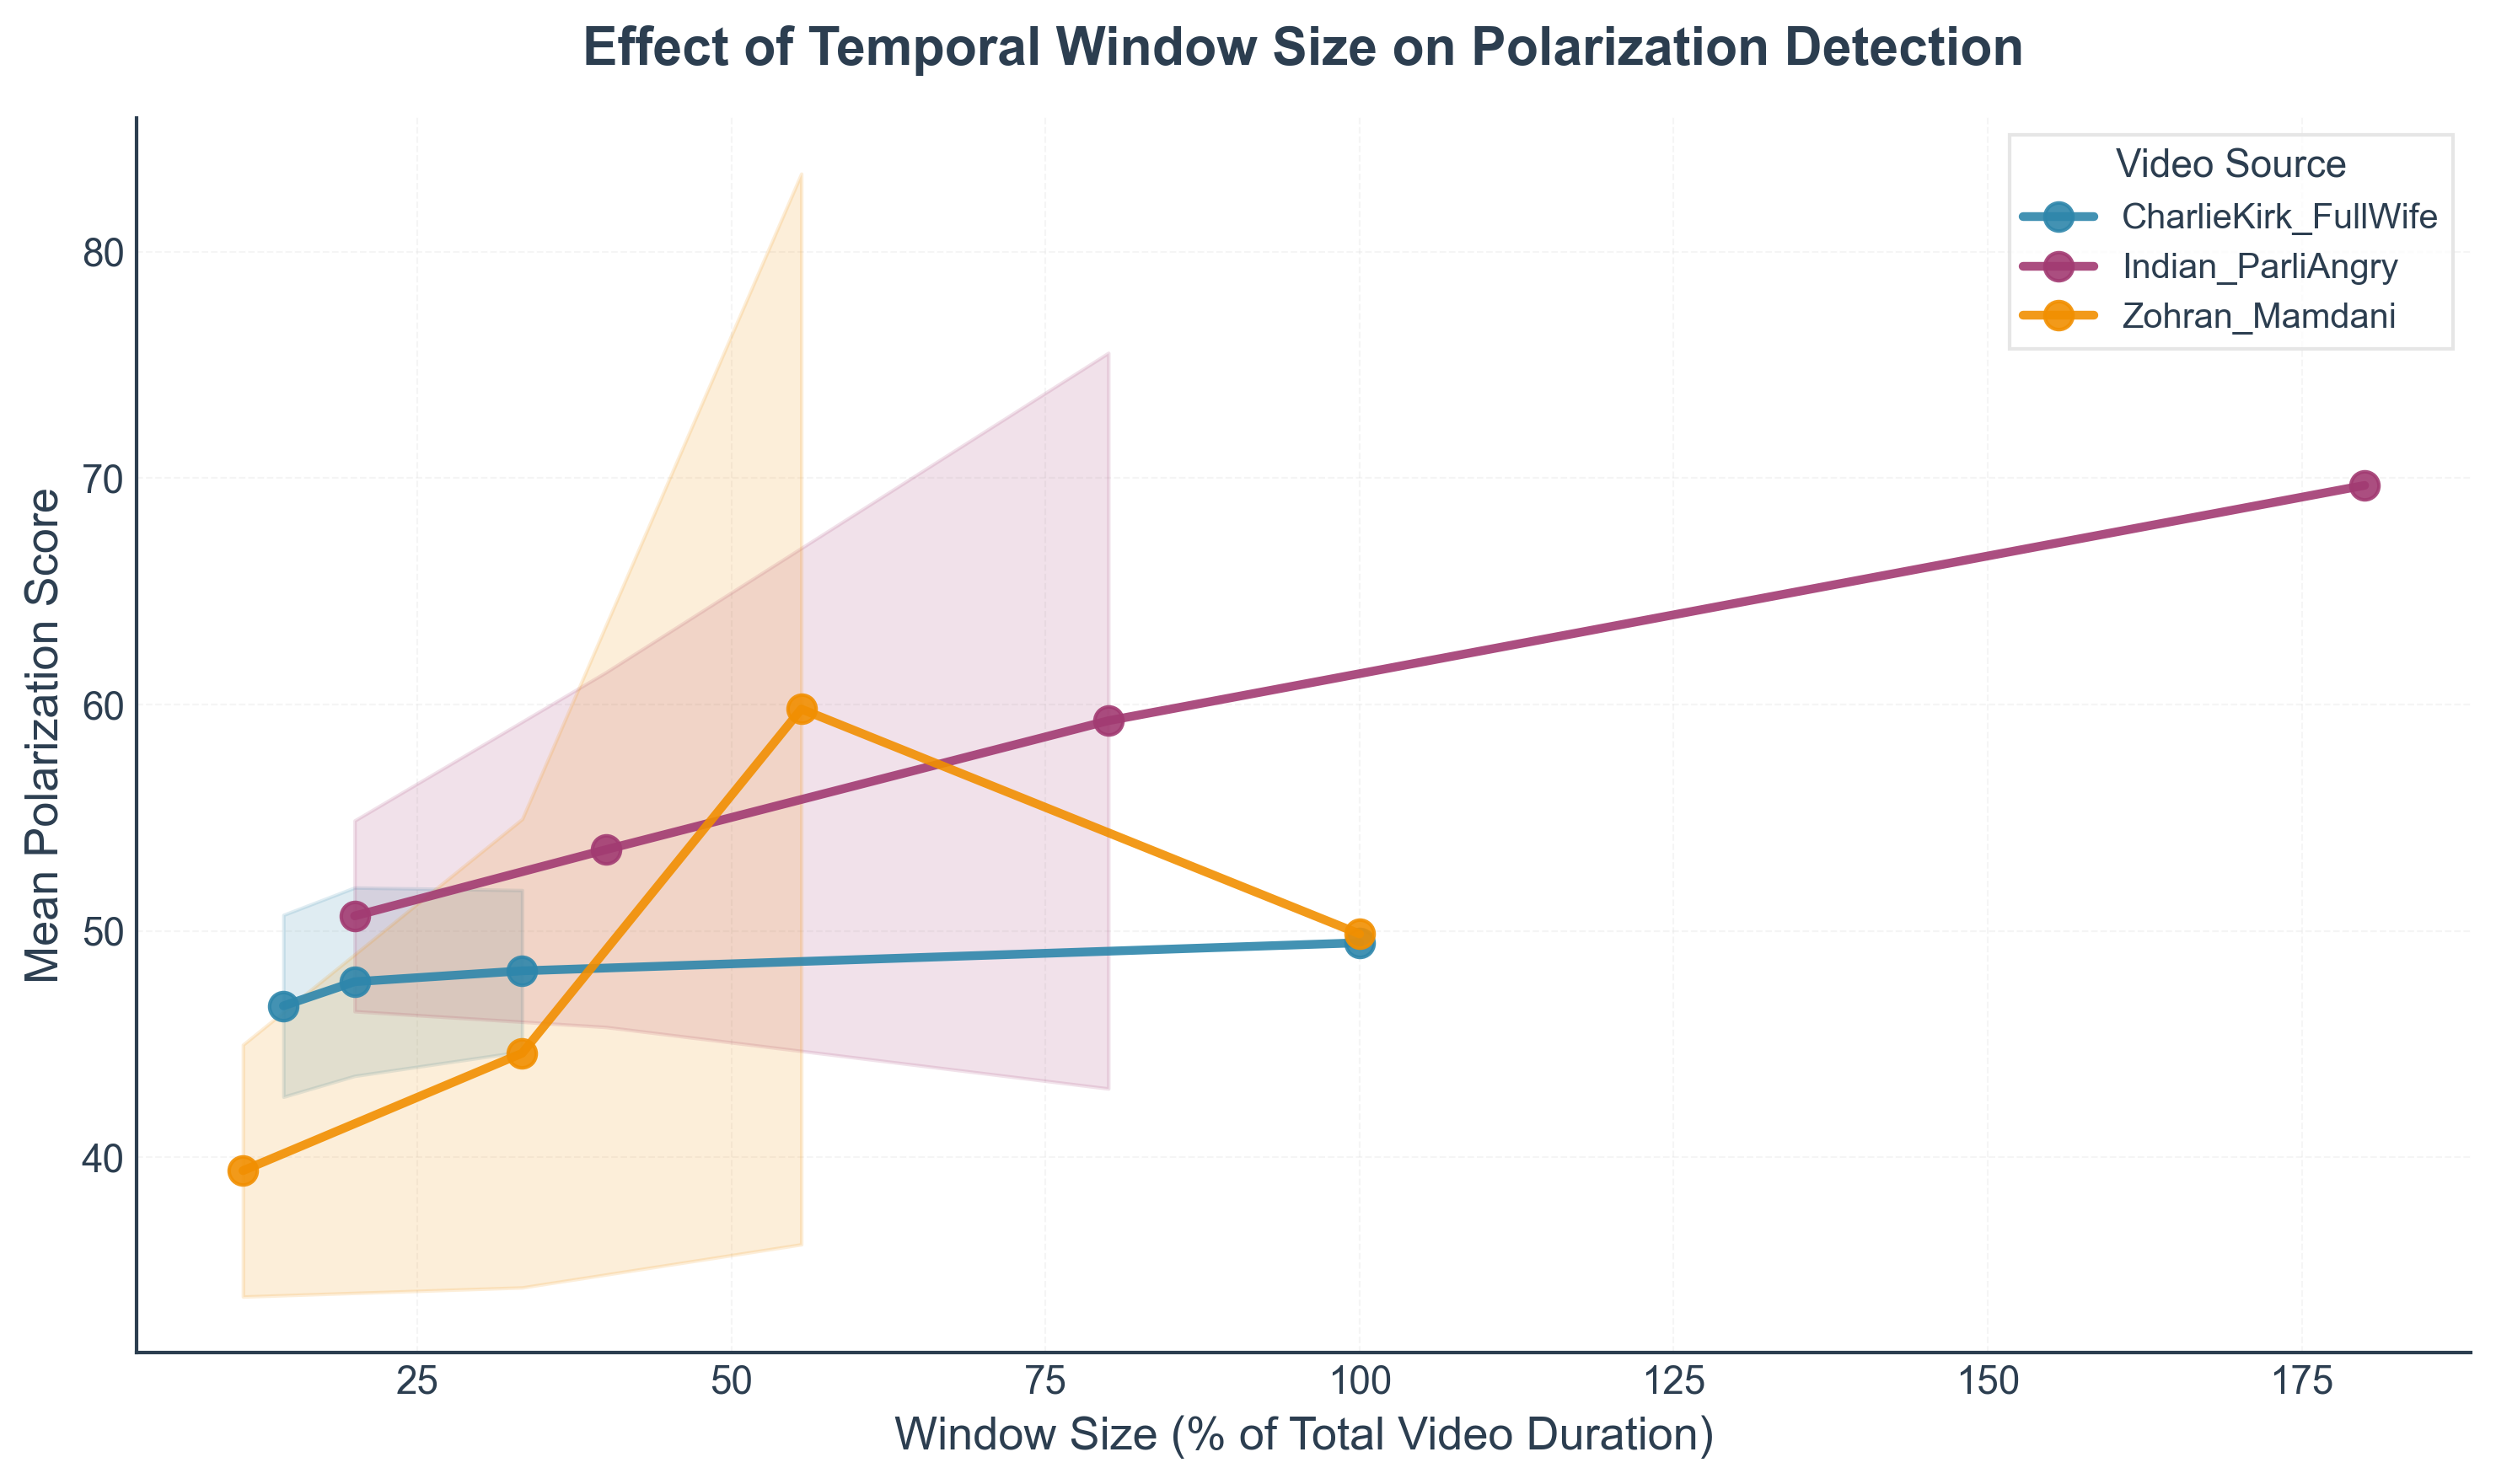

[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)


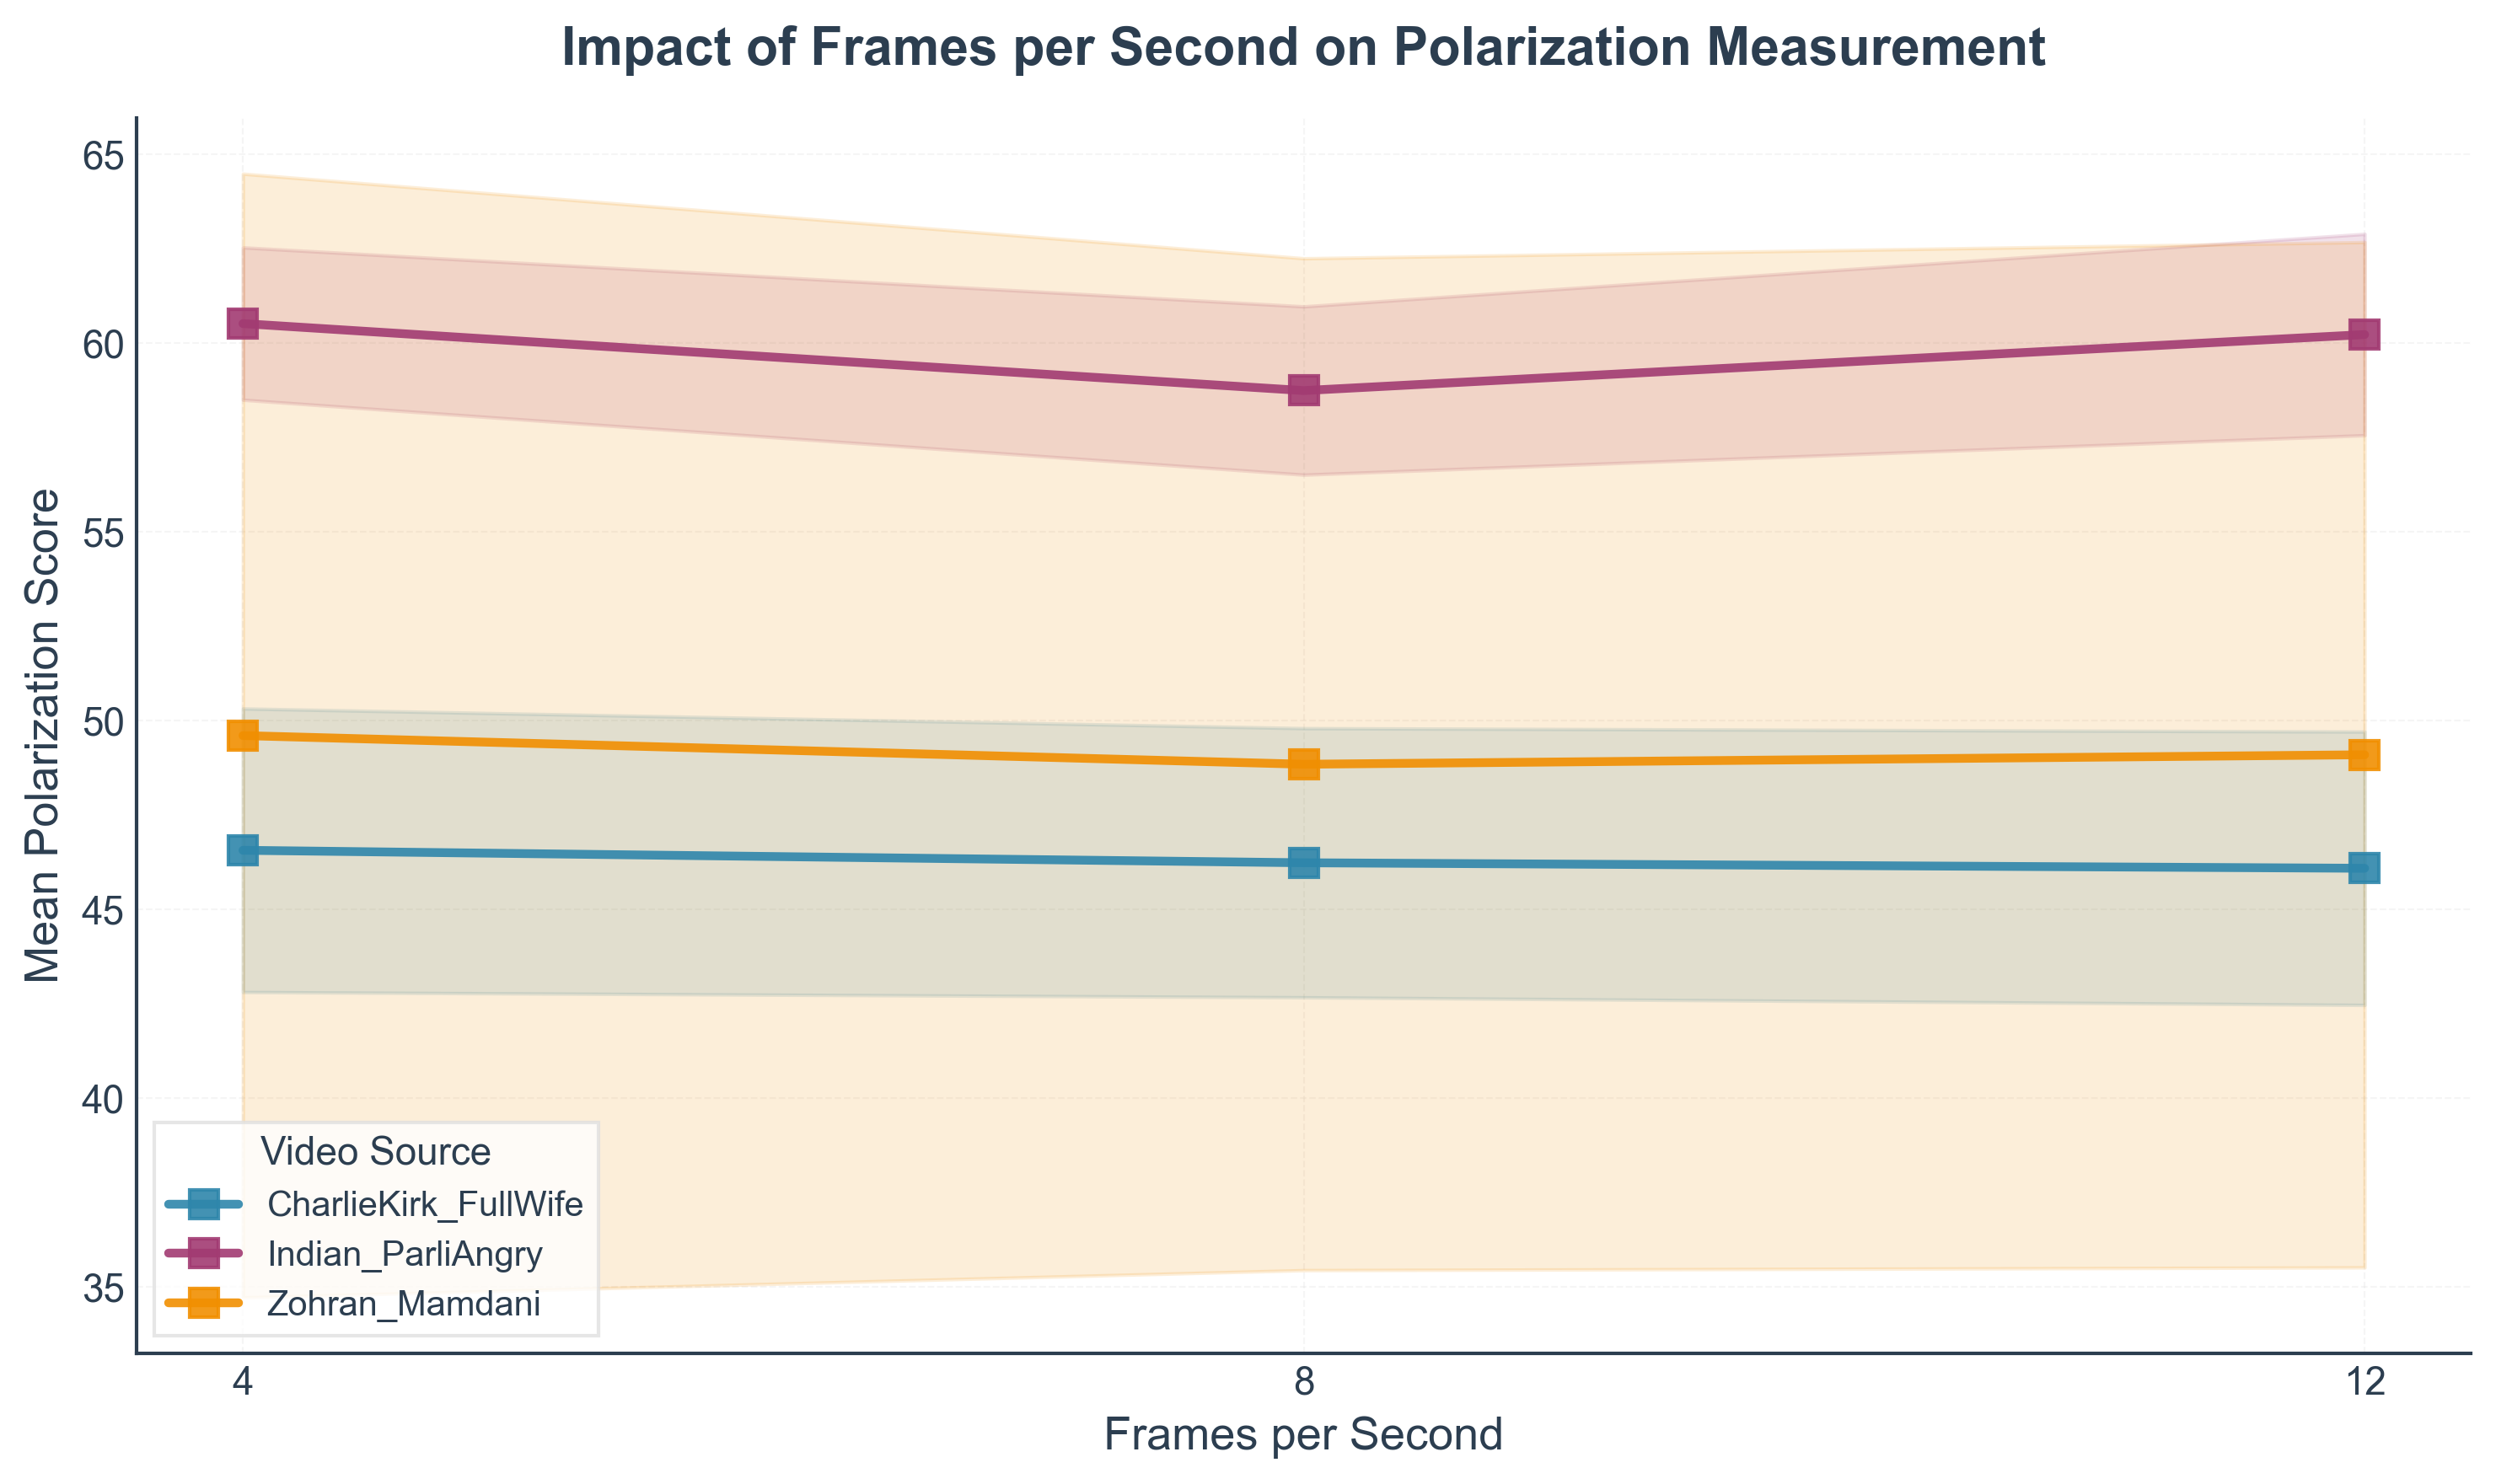

[3/3] Generating: Function Comparison Analysis (Bar Chart)


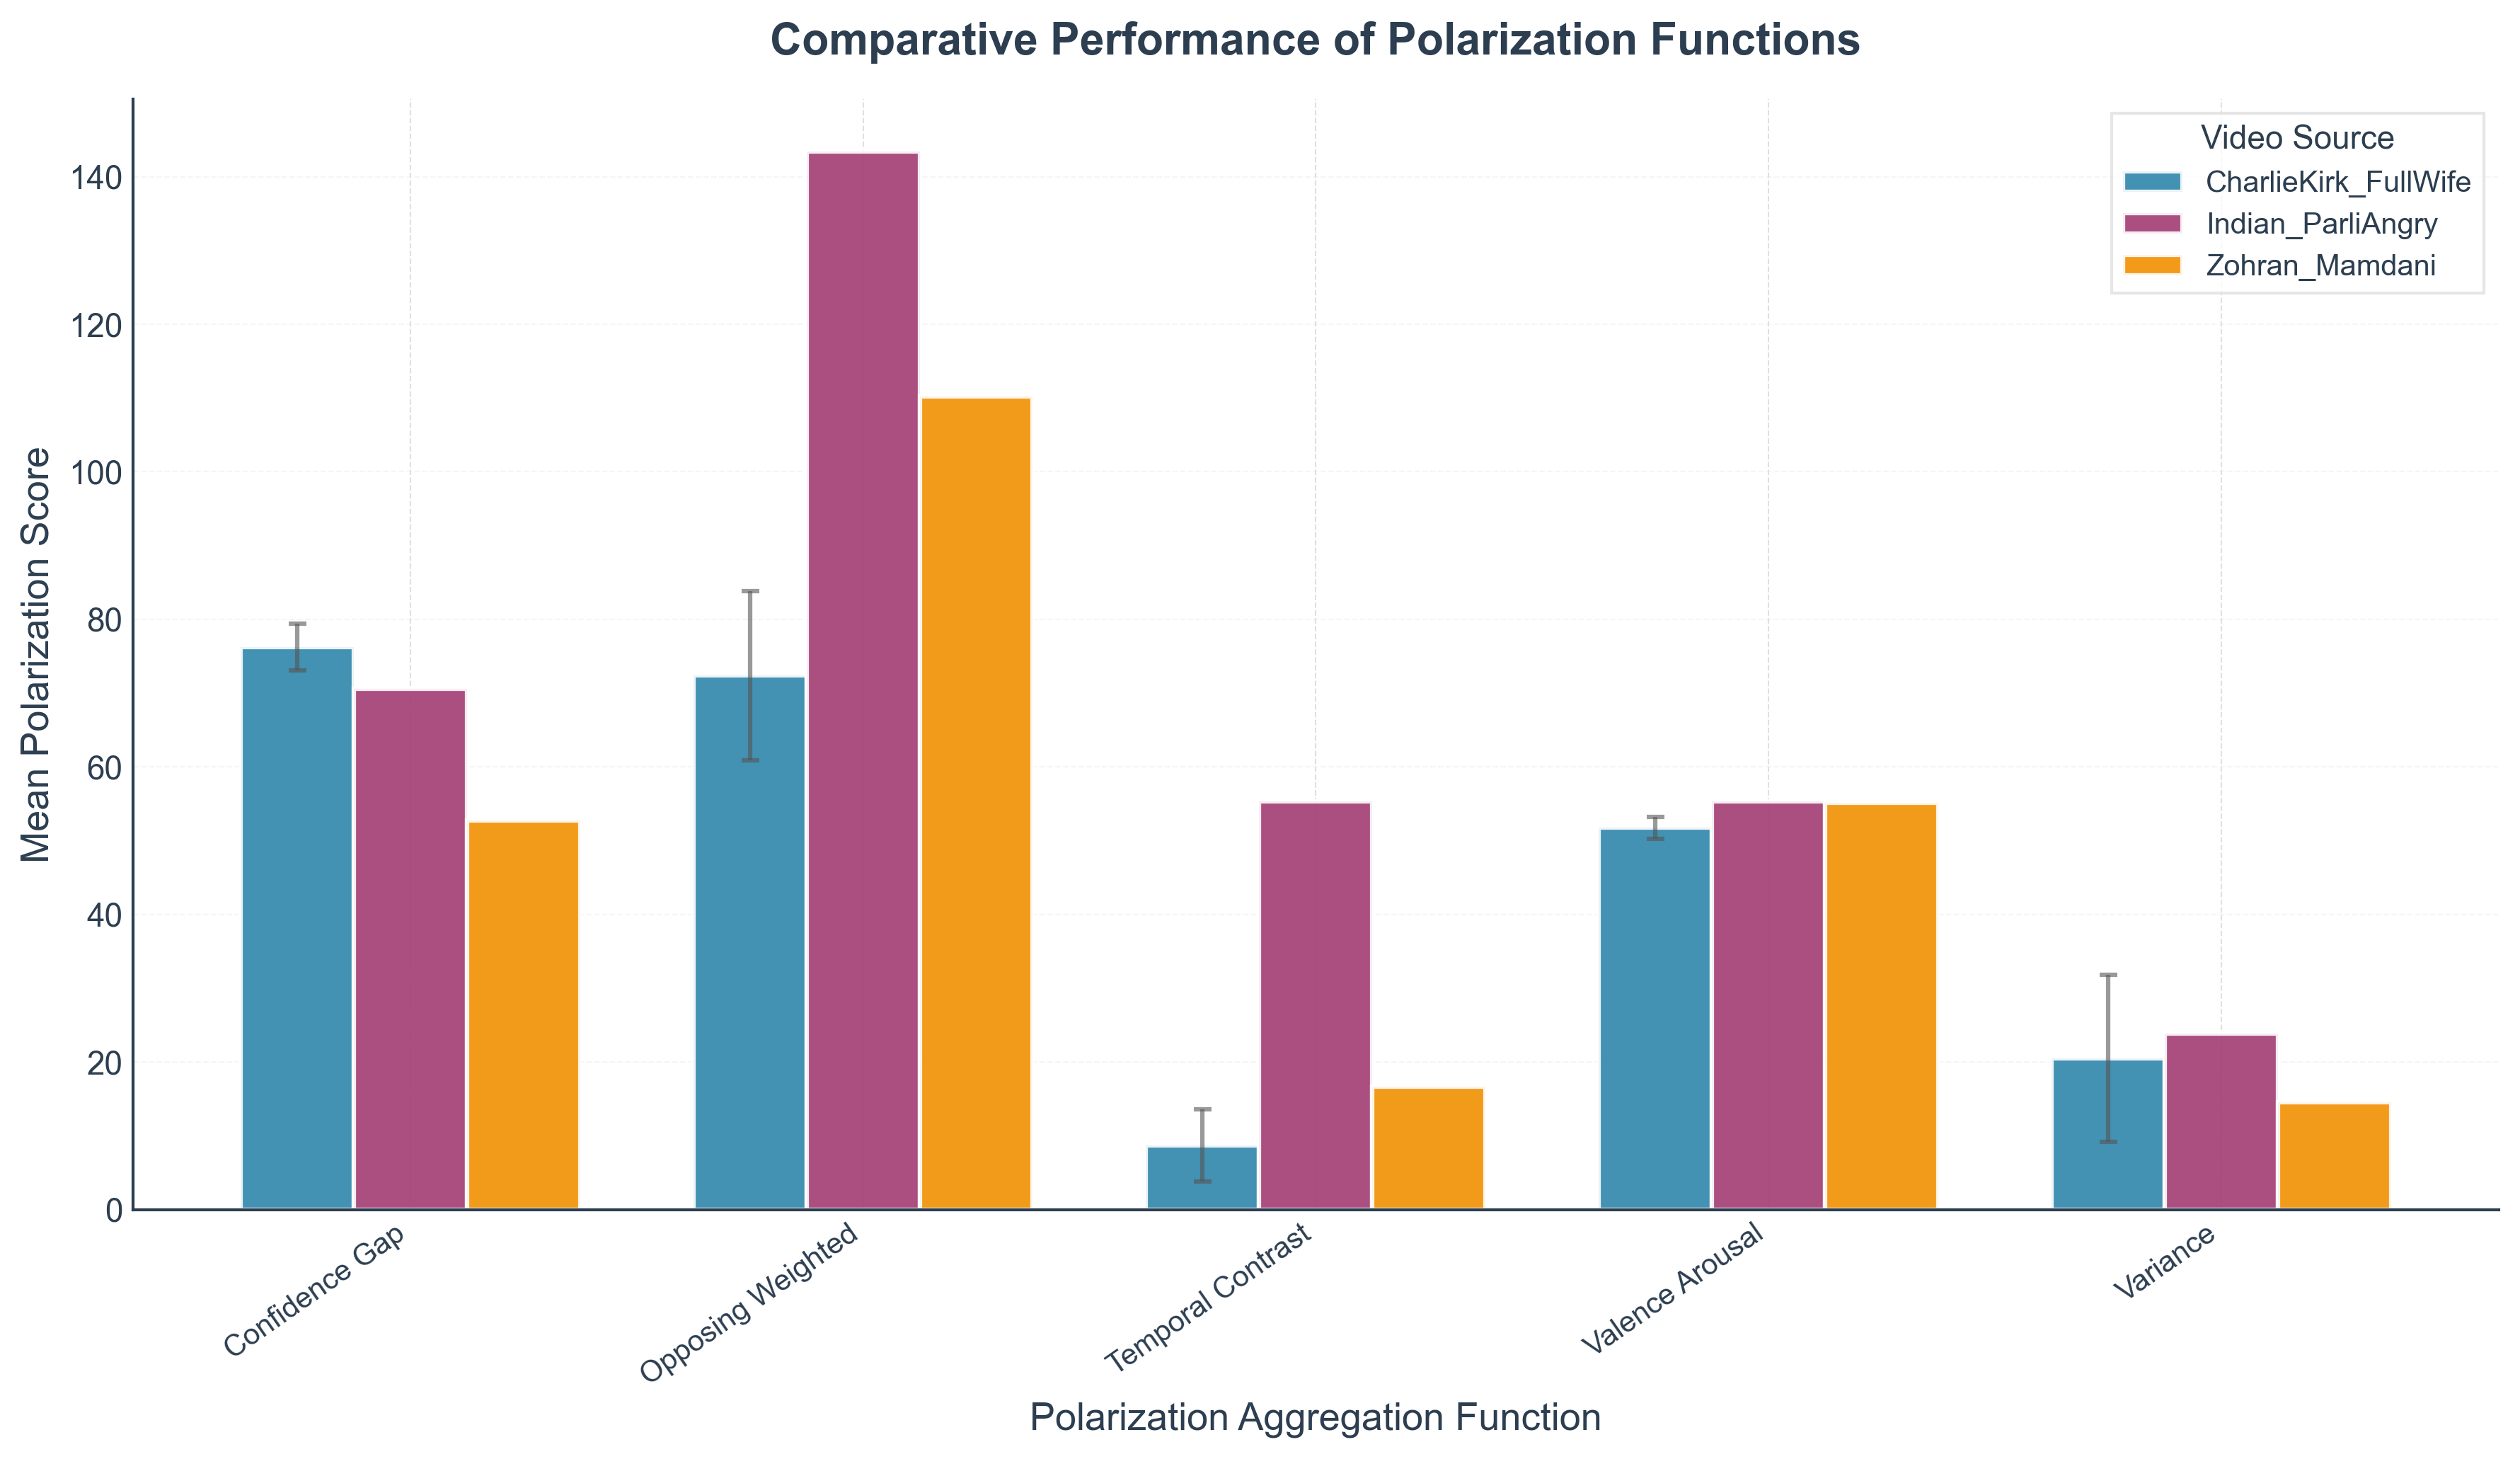


✓ All visualizations generated successfully
✓ High-resolution figures saved (300 DPI)

Done.


In [10]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# Professional color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'tertiary': '#F18F01',
    'background': '#F8F9FA',
    'grid': '#E0E0E0',
    'text': '#2C3E50'
}

# Custom palette for multiple videos
VIDEO_PALETTE = ['#2E86AB', '#A23B72', '#F18F01']

def set_publication_style():
    """Set consistent professional styling for all plots."""
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = COLORS['text']
    plt.rcParams['axes.labelcolor'] = COLORS['text']
    plt.rcParams['xtick.color'] = COLORS['text']
    plt.rcParams['ytick.color'] = COLORS['text']
    plt.rcParams['text.color'] = COLORS['text']
    plt.rcParams['grid.color'] = COLORS['grid']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11


def parse_data(video_paths):
    """Parse all experiment data into a DataFrame."""
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
       
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
           
            # Experiment 1: Aggregation Functions
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    # --- FIX APPLIED HERE ---
                    if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        std_score = df['polarization_score'].std()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 
                            'parameter': 'N/A', 'value': 0, 'function': func_name, 
                            'mean_score': mean_score, 'std_score': std_score
                        })

            # Experiment 2: Window Size
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                       
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            # --- FIX APPLIED HERE ---
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 
                                    'parameter': 'Window Size (s)', 'value': win_size, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

            # Experiment 3: Frame Samples
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            # --- FIX APPLIED HERE ---
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 
                                    'parameter': 'Frames per Second', 'value': frame_rate, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths, save_path=None):
    """
    Line plot for window size impact - best for showing trends over continuous variables.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == 'Window Size'].copy()
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
   
    plot_data = exp_df.groupby(['video', 'relative_window_size']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    for idx, video in enumerate(plot_data['video'].unique()):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['relative_window_size'], video_data['mean_score'], 
                marker='o', linewidth=2.5, markersize=8, 
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        # Add confidence bands
        ax.fill_between(video_data['relative_window_size'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel('Window Size (% of Total Video Duration)', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Effect of Temporal Window Size on Polarization Detection', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11, 
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name, save_path=None):
    """
    Line plot for frame sampling - shows trends in discrete sampling rates.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
   
    for idx, video in enumerate(plot_data['video'].unique()):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['value'], video_data['mean_score'], 
                marker='s', linewidth=2.5, markersize=8,
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['value'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel(parameter_name, fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title(f'Impact of {parameter_name} on Polarization Measurement', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set integer ticks for discrete values
    ax.set_xticks(sorted(plot_data['value'].unique()))
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_function_comparison(df, save_path=None):
    """
    Grouped bar chart - best for comparing categorical functions across videos.
    """
    set_publication_style()
    
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    
    # Clean up function names for better readability
    func_df['function'] = func_df['function'].str.replace('_', ' ').str.title()
   
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

    # Sort to ensure consistent order
    unique_functions = sorted(func_df['function'].unique())
    x = np.arange(len(unique_functions))
    width = 0.25
    
    videos = sorted(func_df['video'].unique())
    for idx, video in enumerate(videos):
        # Prepare data for this video, ensuring it's sorted by the function name
        video_data = func_df[func_df['video'] == video].set_index('function').loc[unique_functions].reset_index()
        
        positions = x + (idx - len(videos) / 2 + 0.5) * width
        
        bars = ax.bar(positions, video_data['mean_score'], width, 
                      label=video, color=VIDEO_PALETTE[idx], alpha=0.9,
                      edgecolor='white', linewidth=1.5)
        
        # Add error bars if std available
        if 'std_score' in video_data.columns:
            ax.errorbar(positions, video_data['mean_score'], 
                       yerr=video_data['std_score'],
                       fmt='none', ecolor='#555555', capsize=3, 
                       capthick=1.5, alpha=0.6)

    ax.set_xlabel('Polarization Aggregation Function', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Comparative Performance of Polarization Functions', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.set_xticks(x)
    ax.set_xticklabels(unique_functions, rotation=35, ha='right', fontsize=10)
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    
    ax.grid(True, alpha=0.3, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def generate_summary_statistics(df):
    """Generate and print summary statistics for the report."""
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    for experiment in df['experiment'].unique():
        print(f"\n{experiment}:")
        exp_data = df[df['experiment'] == experiment]
        print(f"  Videos analyzed: {exp_data['video'].nunique()}")
        print(f"  Mean score range: {exp_data['mean_score'].min():.3f} - {exp_data['mean_score'].max():.3f}")


if __name__ == "__main__":
    print("Loading and parsing polarization analysis data...")
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        print(f"✓ Data loaded successfully")
        print(f"✓ Total records parsed: {len(master_df)}")
        print(f"✓ Video sources: {', '.join(sorted(master_df['video'].unique()))}")
        
        generate_summary_statistics(master_df)
       
        print("\n" + "="*70)
        print("GENERATING VISUALIZATIONS")
        print("="*70)
        
        print("\n[1/3] Generating: Relative Window Size Analysis (Line Plot)")
        plot_normalized_window_impact(master_df, VIDEO_LENGTHS, 
                                      save_path='figure1_window_size.png')
       
        print("[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            save_path='figure2_frame_sampling.png')
       
        print("[3/3] Generating: Function Comparison Analysis (Bar Chart)")
        plot_function_comparison(master_df, save_path='figure3_function_comparison.png')
       
        print("\n✓ All visualizations generated successfully")
        print("✓ High-resolution figures saved (300 DPI)")
        print("\nDone.")

Loading and parsing polarization analysis data...
✓ Data loaded successfully
✓ Total records parsed: 120
✓ Video sources: Charlie Kirk's widow tribute (Polar), Indian Parliament (Angry), Zohran Mamdani (Neutral)

SUMMARY STATISTICS

Function Comparison:
  Videos analyzed: 3
  Mean score range: 8.669 - 143.395

Frame Samples:
  Videos analyzed: 3
  Mean score range: 8.676 - 132.475

Window Size:
  Videos analyzed: 3
  Mean score range: 0.000 - 143.395

GENERATING VISUALIZATIONS

[1/3] Generating: Relative Window Size Analysis (Line Plot)


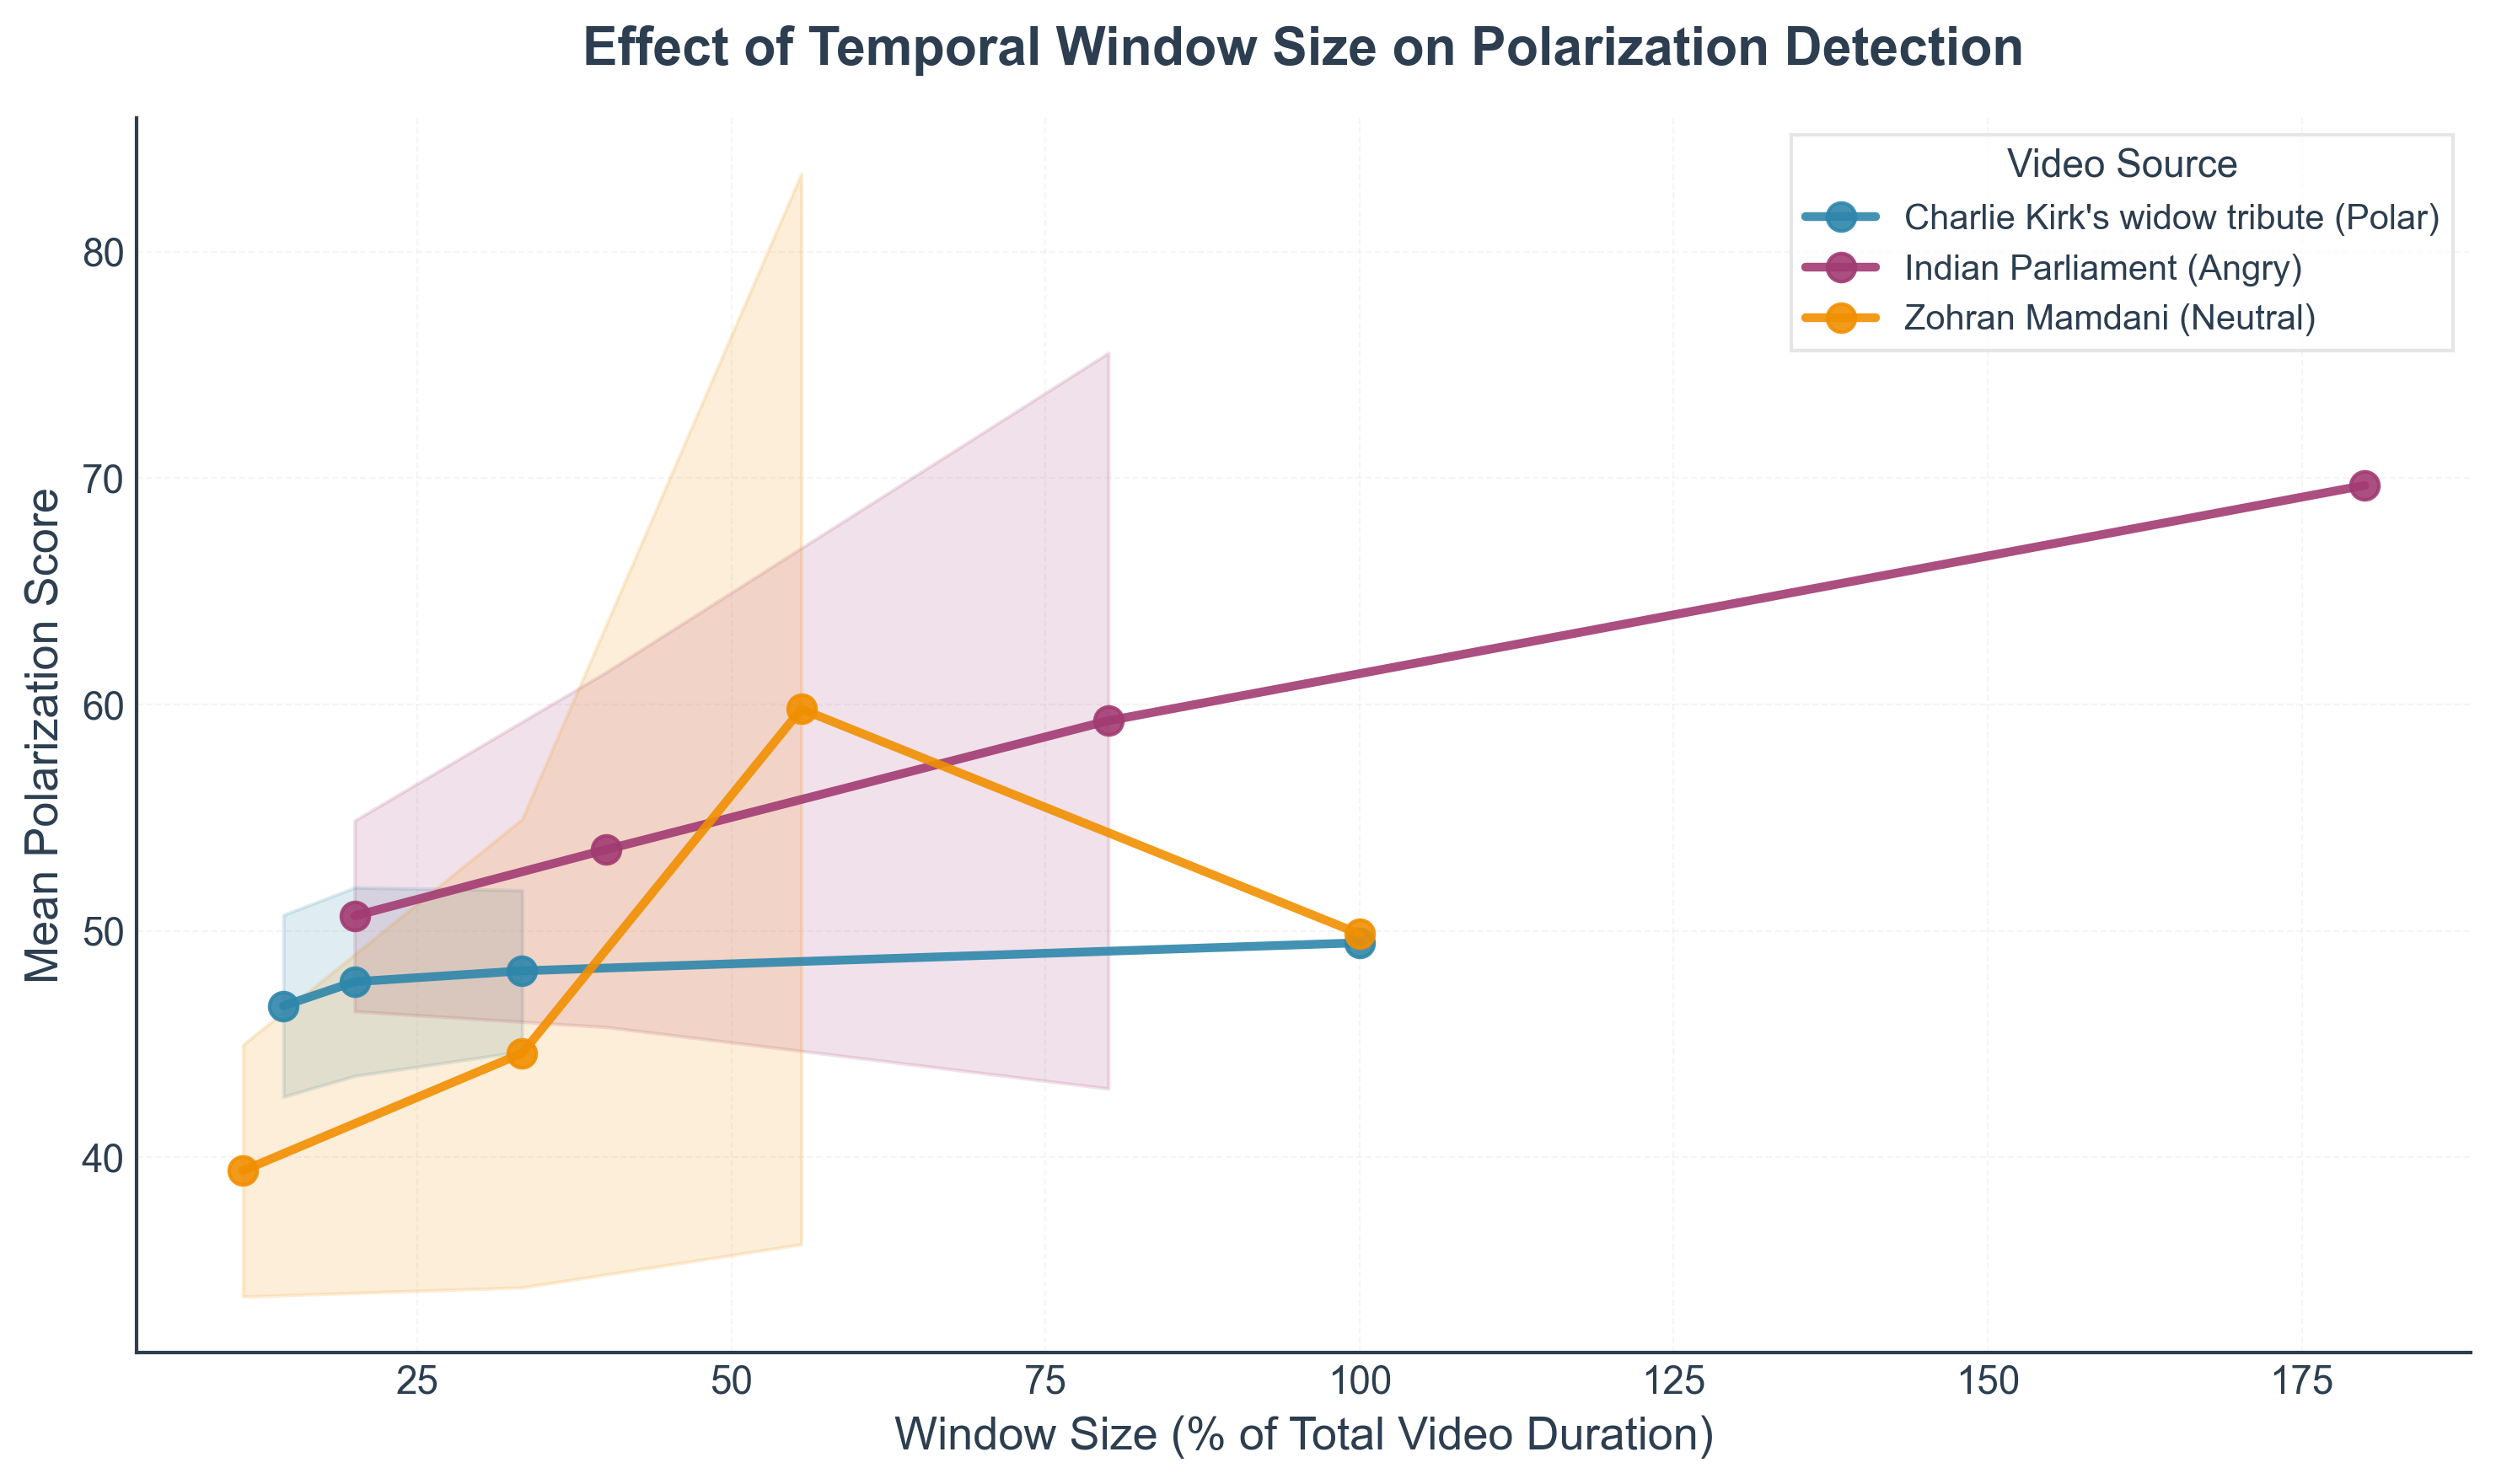

[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)


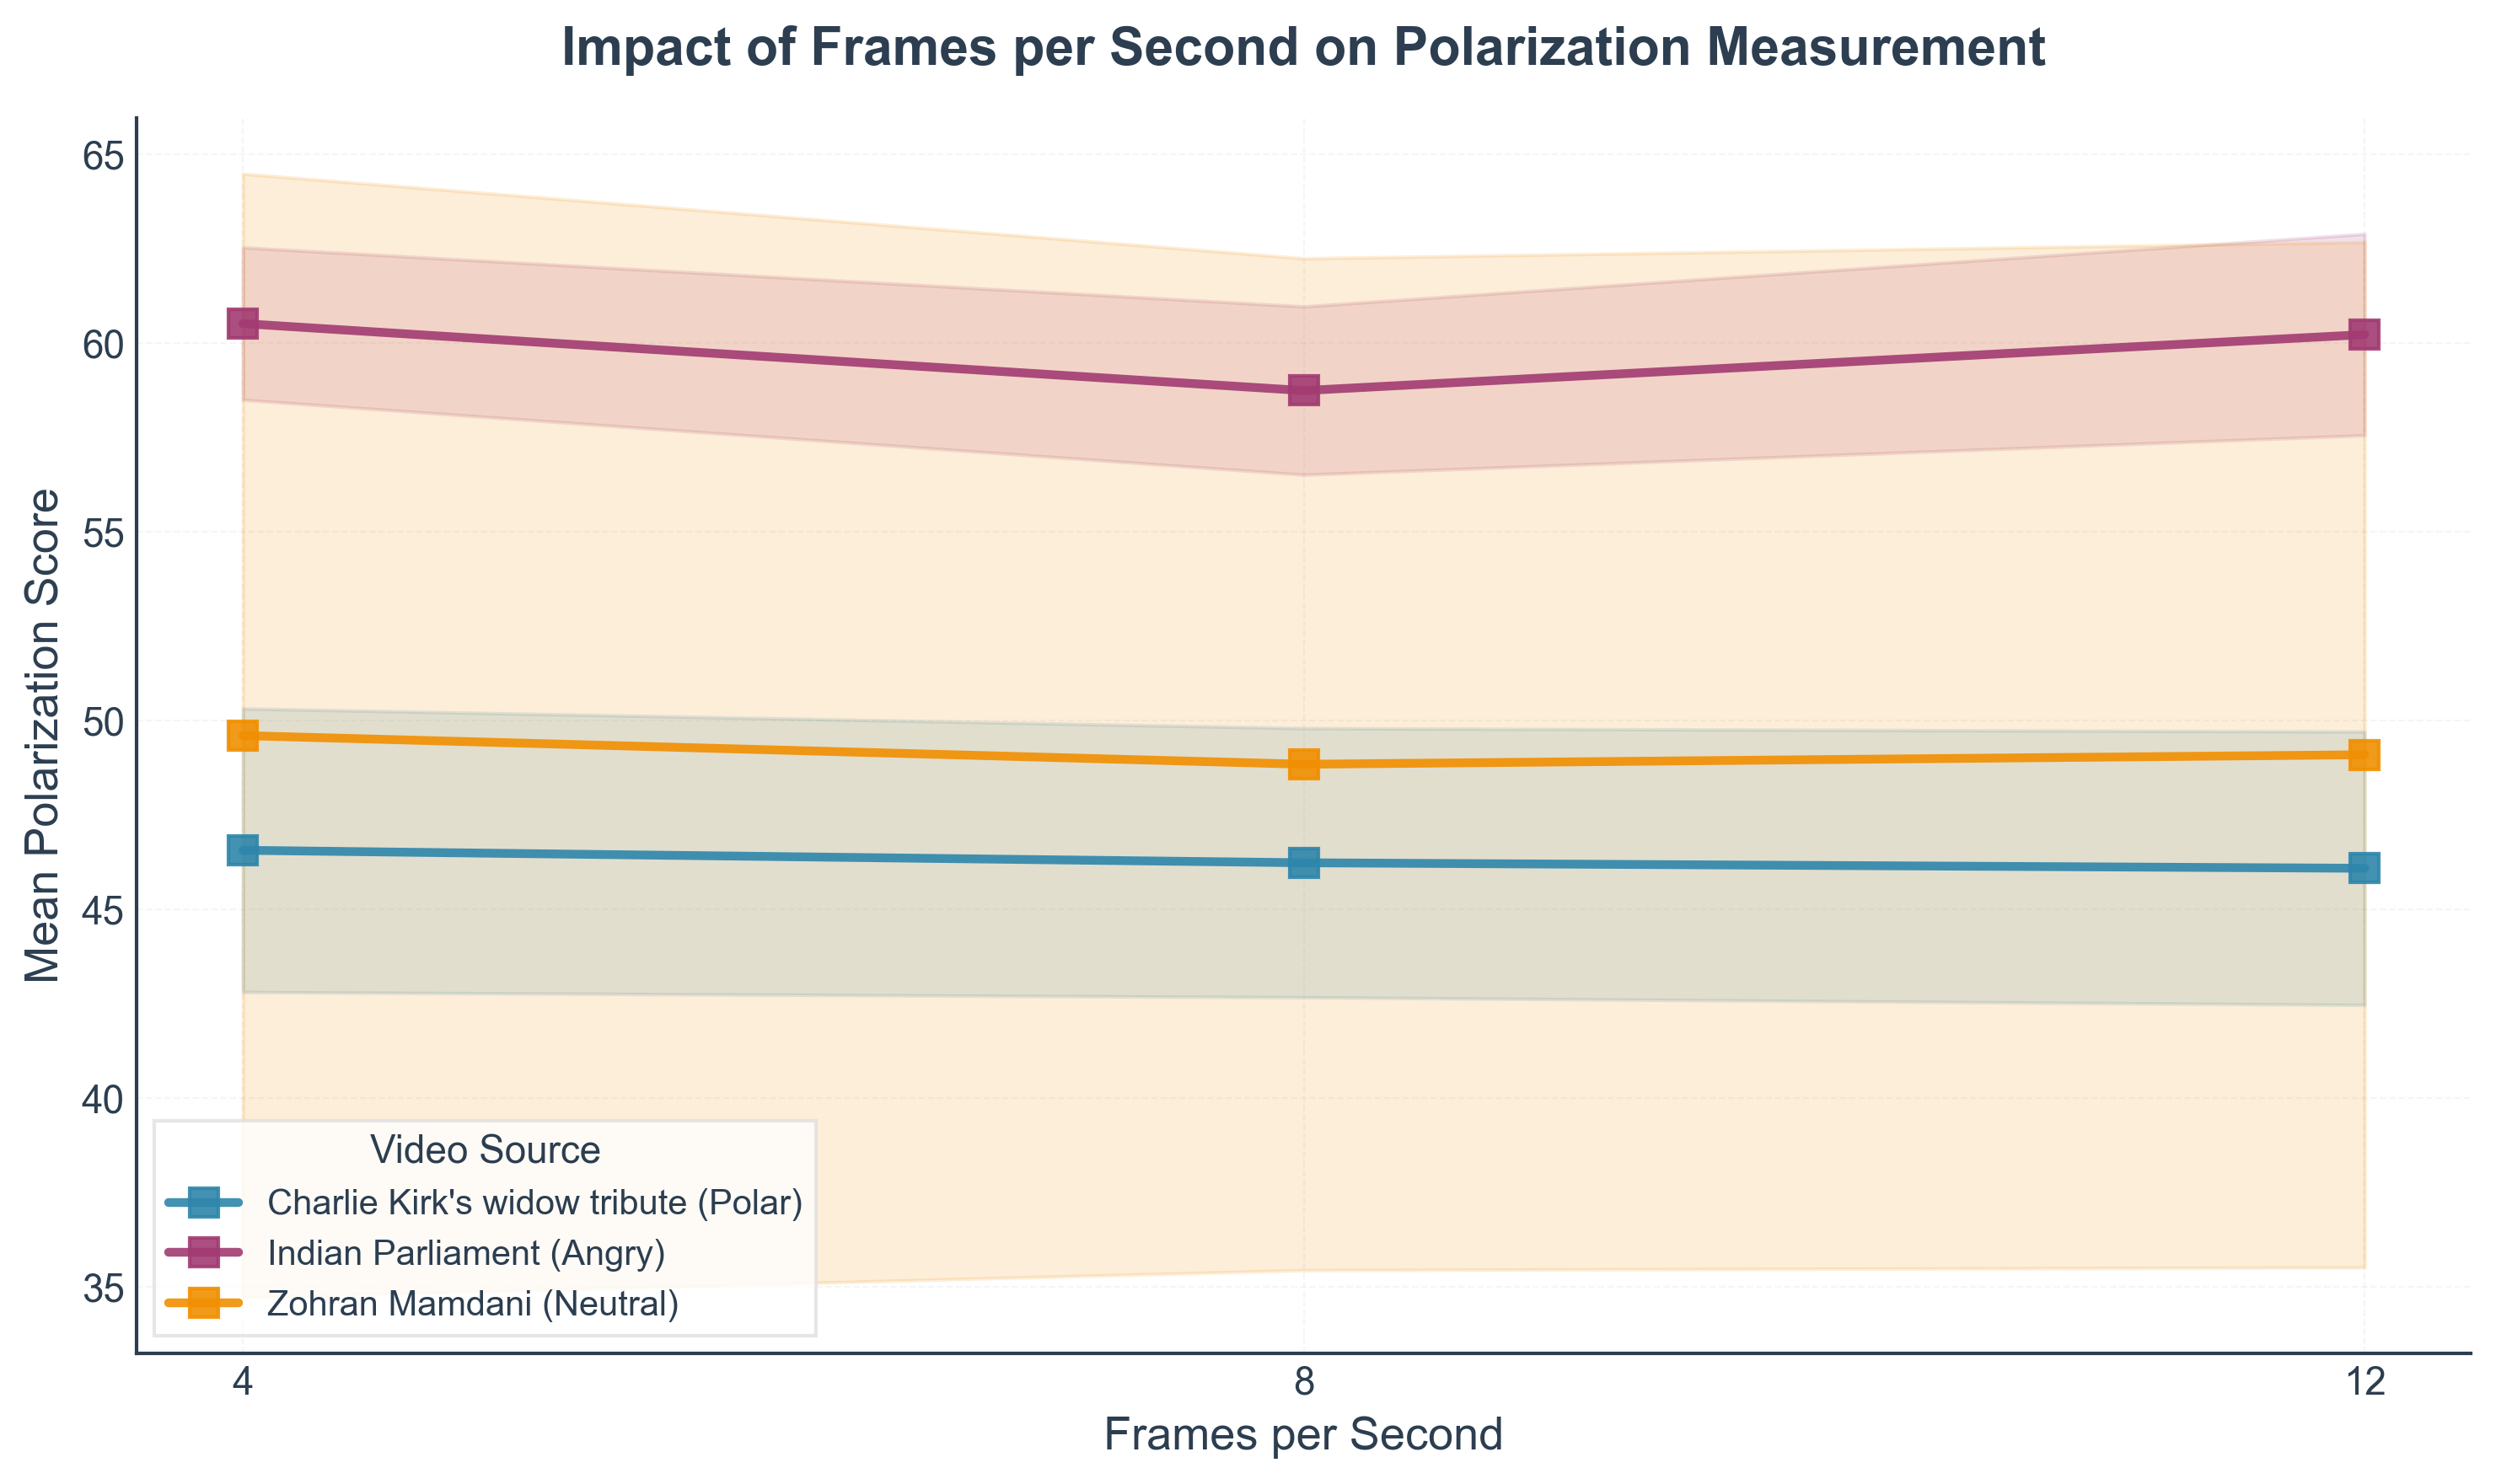

[3/3] Generating: Function Comparison Analysis (Bar Chart)


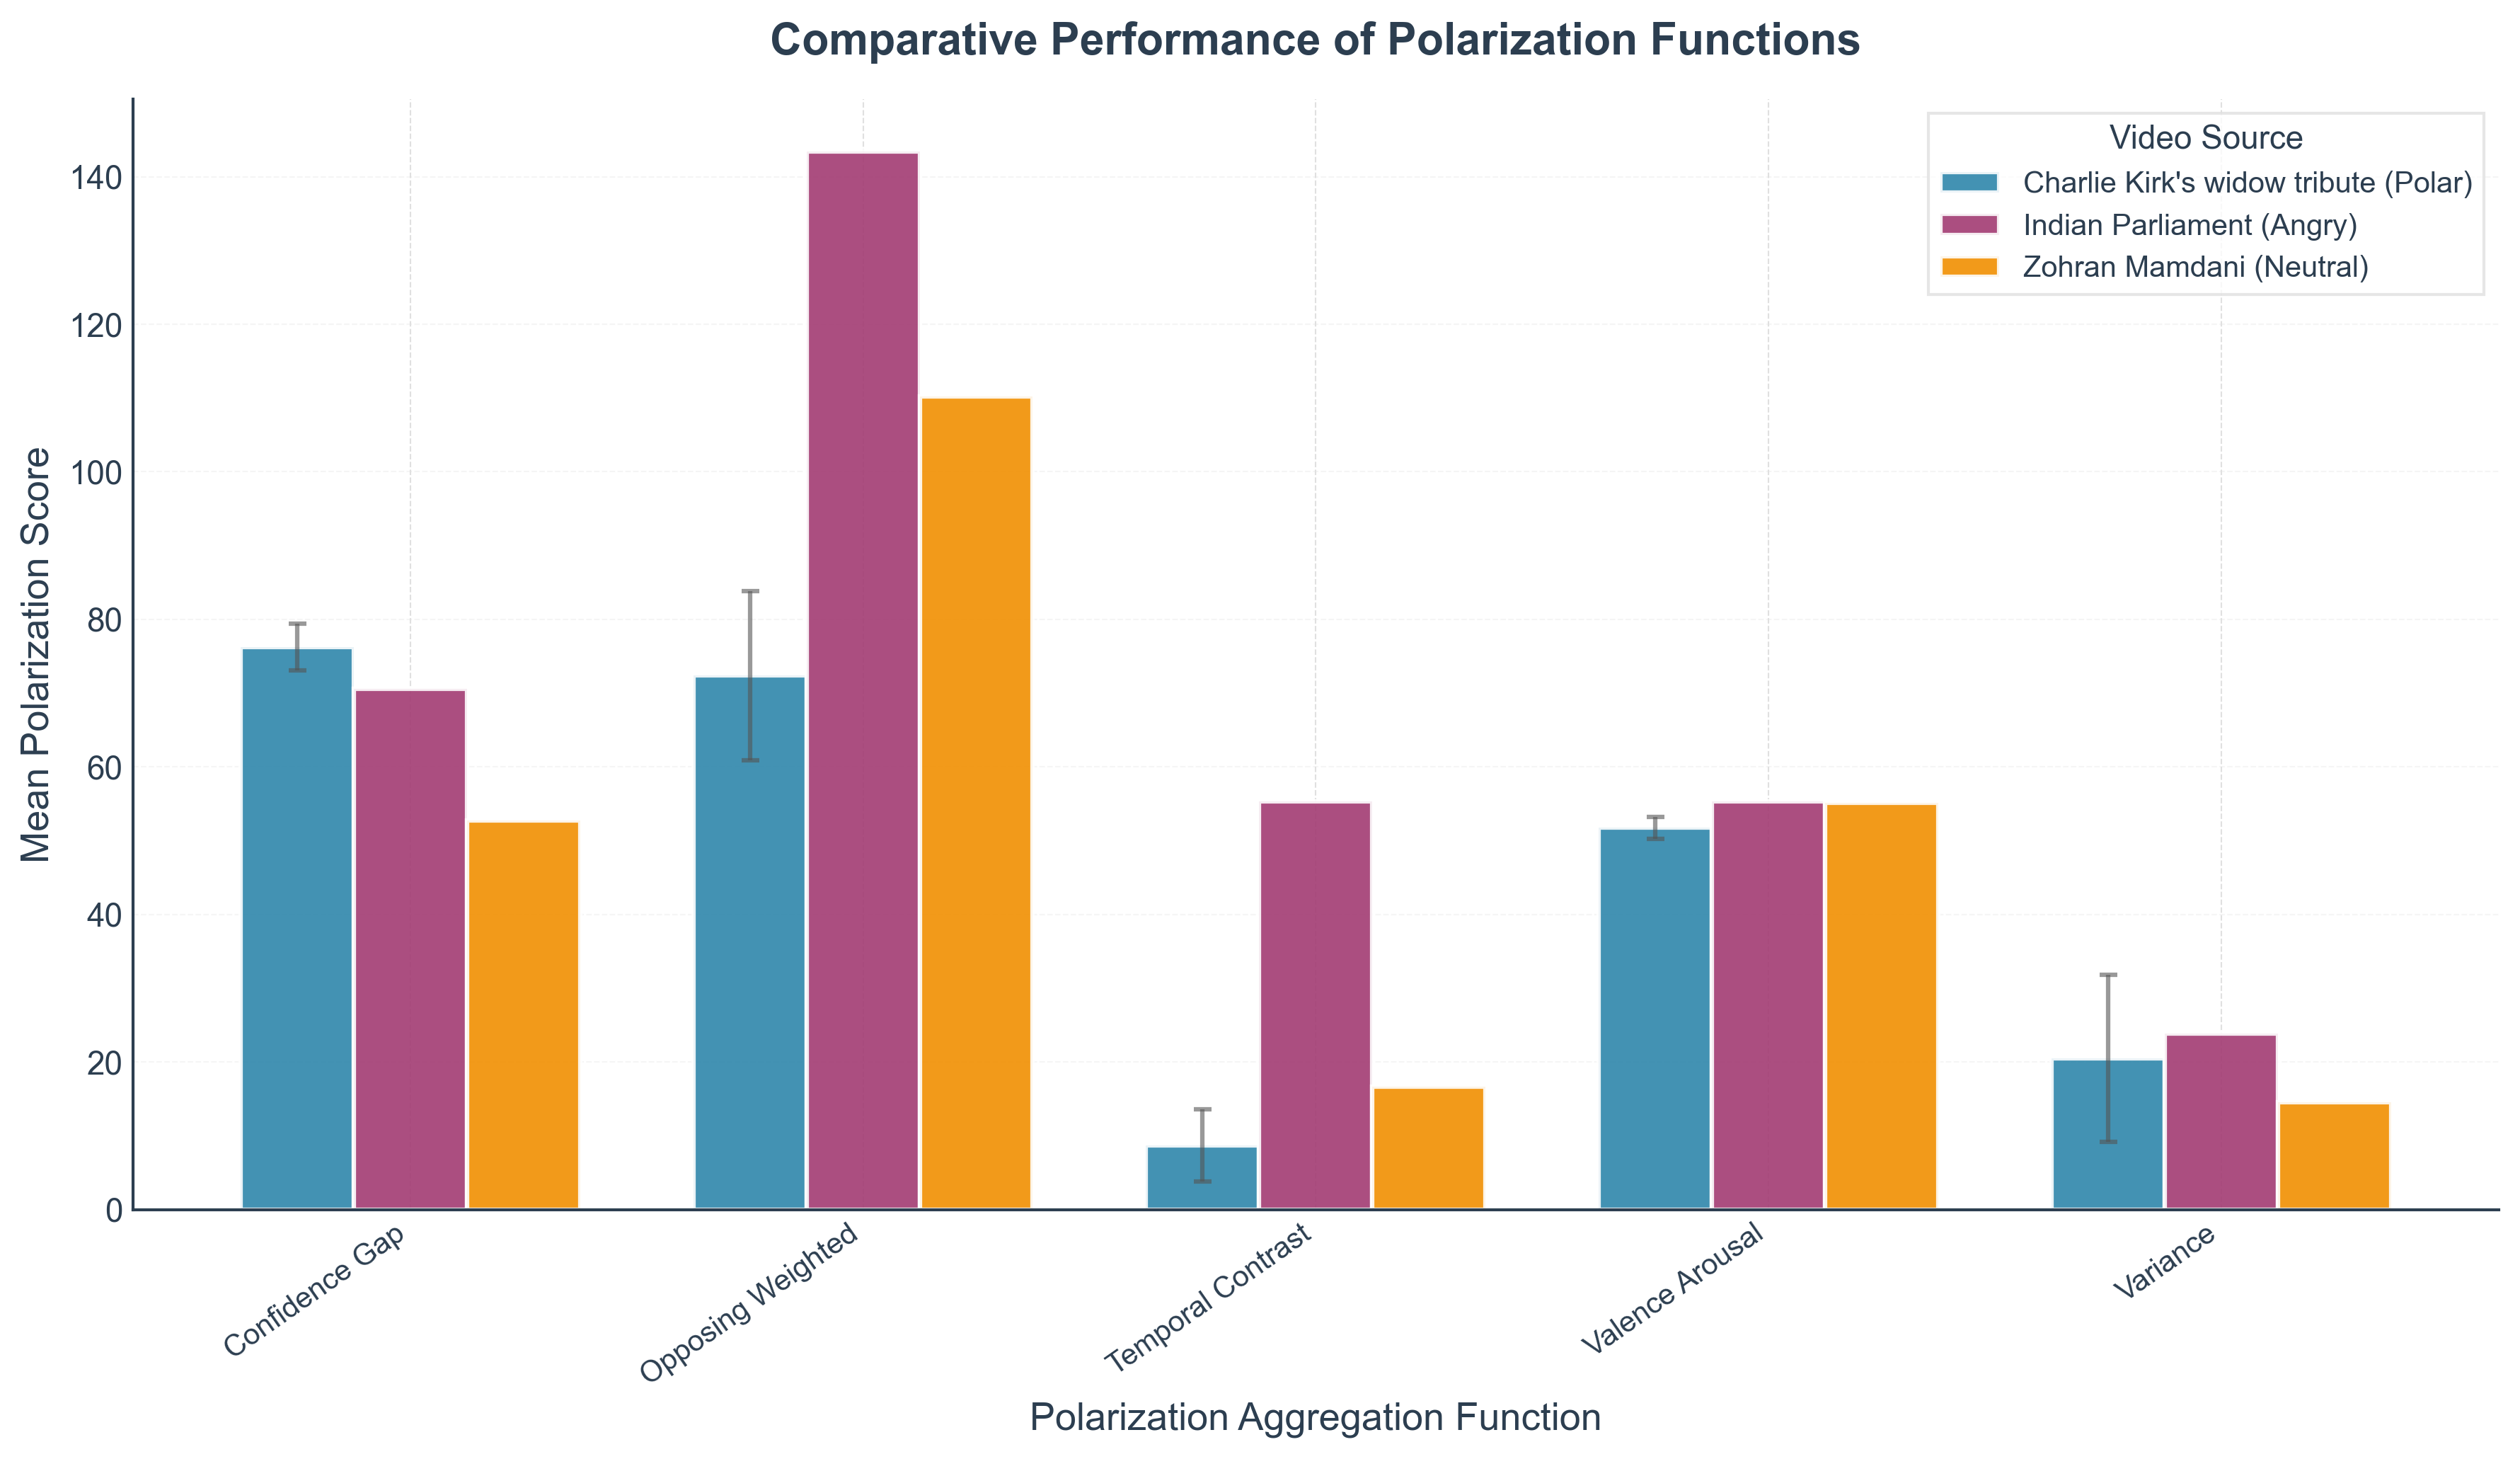


✓ All visualizations generated successfully
✓ High-resolution figures saved (300 DPI)

Done.


In [11]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# Professional color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'tertiary': '#F18F01',
    'background': '#F8F9FA',
    'grid': '#E0E0E0',
    'text': '#2C3E50'
}

# Custom palette for multiple videos
VIDEO_PALETTE = ['#2E86AB', '#A23B72', '#F18F01']

def set_publication_style():
    """Set consistent professional styling for all plots."""
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = COLORS['text']
    plt.rcParams['axes.labelcolor'] = COLORS['text']
    plt.rcParams['xtick.color'] = COLORS['text']
    plt.rcParams['ytick.color'] = COLORS['text']
    plt.rcParams['text.color'] = COLORS['text']
    plt.rcParams['grid.color'] = COLORS['grid']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11


def parse_data(video_paths):
    """Parse all experiment data into a DataFrame."""
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
       
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
           
            # Experiment 1: Aggregation Functions
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        std_score = df['polarization_score'].std()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 
                            'parameter': 'N/A', 'value': 0, 'function': func_name, 
                            'mean_score': mean_score, 'std_score': std_score
                        })

            # Experiment 2: Window Size
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                       
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 
                                    'parameter': 'Window Size (s)', 'value': win_size, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

            # Experiment 3: Frame Samples
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 
                                    'parameter': 'Frames per Second', 'value': frame_rate, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths, save_path=None):
    """
    Line plot for window size impact - best for showing trends over continuous variables.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == 'Window Size'].copy()
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
   
    plot_data = exp_df.groupby(['video', 'relative_window_size']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    # Sort video names to ensure consistent color mapping
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['relative_window_size'], video_data['mean_score'], 
                marker='o', linewidth=2.5, markersize=8, 
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['relative_window_size'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel('Window Size (% of Total Video Duration)', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Effect of Temporal Window Size on Polarization Detection', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11, 
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name, save_path=None):
    """
    Line plot for frame sampling - shows trends in discrete sampling rates.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
   
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['value'], video_data['mean_score'], 
                marker='s', linewidth=2.5, markersize=8,
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['value'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel(parameter_name, fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title(f'Impact of {parameter_name} on Polarization Measurement', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks(sorted(plot_data['value'].unique()))
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_function_comparison(df, save_path=None):
    """
    Grouped bar chart - best for comparing categorical functions across videos.
    """
    set_publication_style()
    
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    func_df['function'] = func_df['function'].str.replace('_', ' ').str.title()
   
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

    unique_functions = sorted(func_df['function'].unique())
    x = np.arange(len(unique_functions))
    width = 0.25
    
    videos = sorted(func_df['video'].unique())
    for idx, video in enumerate(videos):
        video_data = func_df[func_df['video'] == video].set_index('function').reindex(unique_functions).reset_index()
        
        positions = x + (idx - len(videos) / 2 + 0.5) * width
        
        bars = ax.bar(positions, video_data['mean_score'], width, 
                      label=video, color=VIDEO_PALETTE[idx], alpha=0.9,
                      edgecolor='white', linewidth=1.5)
        
        if 'std_score' in video_data.columns:
            ax.errorbar(positions, video_data['mean_score'], 
                       yerr=video_data['std_score'],
                       fmt='none', ecolor='#555555', capsize=3, 
                       capthick=1.5, alpha=0.6)

    ax.set_xlabel('Polarization Aggregation Function', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Comparative Performance of Polarization Functions', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.set_xticks(x)
    ax.set_xticklabels(unique_functions, rotation=35, ha='right', fontsize=10)
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False, edgecolor=COLORS['grid'])
    
    ax.grid(True, alpha=0.3, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


def generate_summary_statistics(df):
    """Generate and print summary statistics for the report."""
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    for experiment in df['experiment'].unique():
        print(f"\n{experiment}:")
        exp_data = df[df['experiment'] == experiment]
        print(f"  Videos analyzed: {exp_data['video'].nunique()}")
        print(f"  Mean score range: {exp_data['mean_score'].min():.3f} - {exp_data['mean_score'].max():.3f}")


if __name__ == "__main__":
    print("Loading and parsing polarization analysis data...")
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        # --- LEGEND RENAMING LOGIC ---
        legend_mapping = {
            "CharlieKirk_FullWife": "Charlie Kirk's widow tribute (Polar)",
            "Indian_ParliAngry": "Indian Parliament (Angry)",
            "Zohran_Mamdani": "Zohran Mamdani (Neutral)"
        }
        master_df['video'] = master_df['video'].replace(legend_mapping)

        # Update the VIDEO_LENGTHS dictionary keys to match the new legend names
        new_video_lengths = {legend_mapping.get(k, k): v for k, v in VIDEO_LENGTHS.items()}
        # --- END OF RENAMING LOGIC ---

        print(f"✓ Data loaded successfully")
        print(f"✓ Total records parsed: {len(master_df)}")
        print(f"✓ Video sources: {', '.join(sorted(master_df['video'].unique()))}")
        
        generate_summary_statistics(master_df)
       
        print("\n" + "="*70)
        print("GENERATING VISUALIZATIONS")
        print("="*70)
        
        print("\n[1/3] Generating: Relative Window Size Analysis (Line Plot)")
        plot_normalized_window_impact(master_df, new_video_lengths, 
                                      save_path='figure1_window_size.png')
       
        print("[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            save_path='figure2_frame_sampling.png')
       
        print("[3/3] Generating: Function Comparison Analysis (Bar Chart)")
        plot_function_comparison(master_df, save_path='figure3_function_comparison.png')
       
        print("\n✓ All visualizations generated successfully")
        print("✓ High-resolution figures saved (300 DPI)")
        print("\nDone.")

Loading and parsing polarization analysis data...
✓ Data loaded successfully
✓ Total records parsed: 120
✓ Video sources: Charlie Kirk's widow tribute (Polar), Indian Parliament (Angry), Zohran Mamdani (Neutral)

SUMMARY STATISTICS

Function Comparison:
  Videos analyzed: 3
  Mean score range: 8.669 - 143.395

Frame Samples:
  Videos analyzed: 3
  Mean score range: 8.676 - 132.475

Window Size:
  Videos analyzed: 3
  Mean score range: 0.000 - 143.395

GENERATING VISUALIZATIONS

[1/3] Generating: Relative Window Size Analysis (Line Plot)


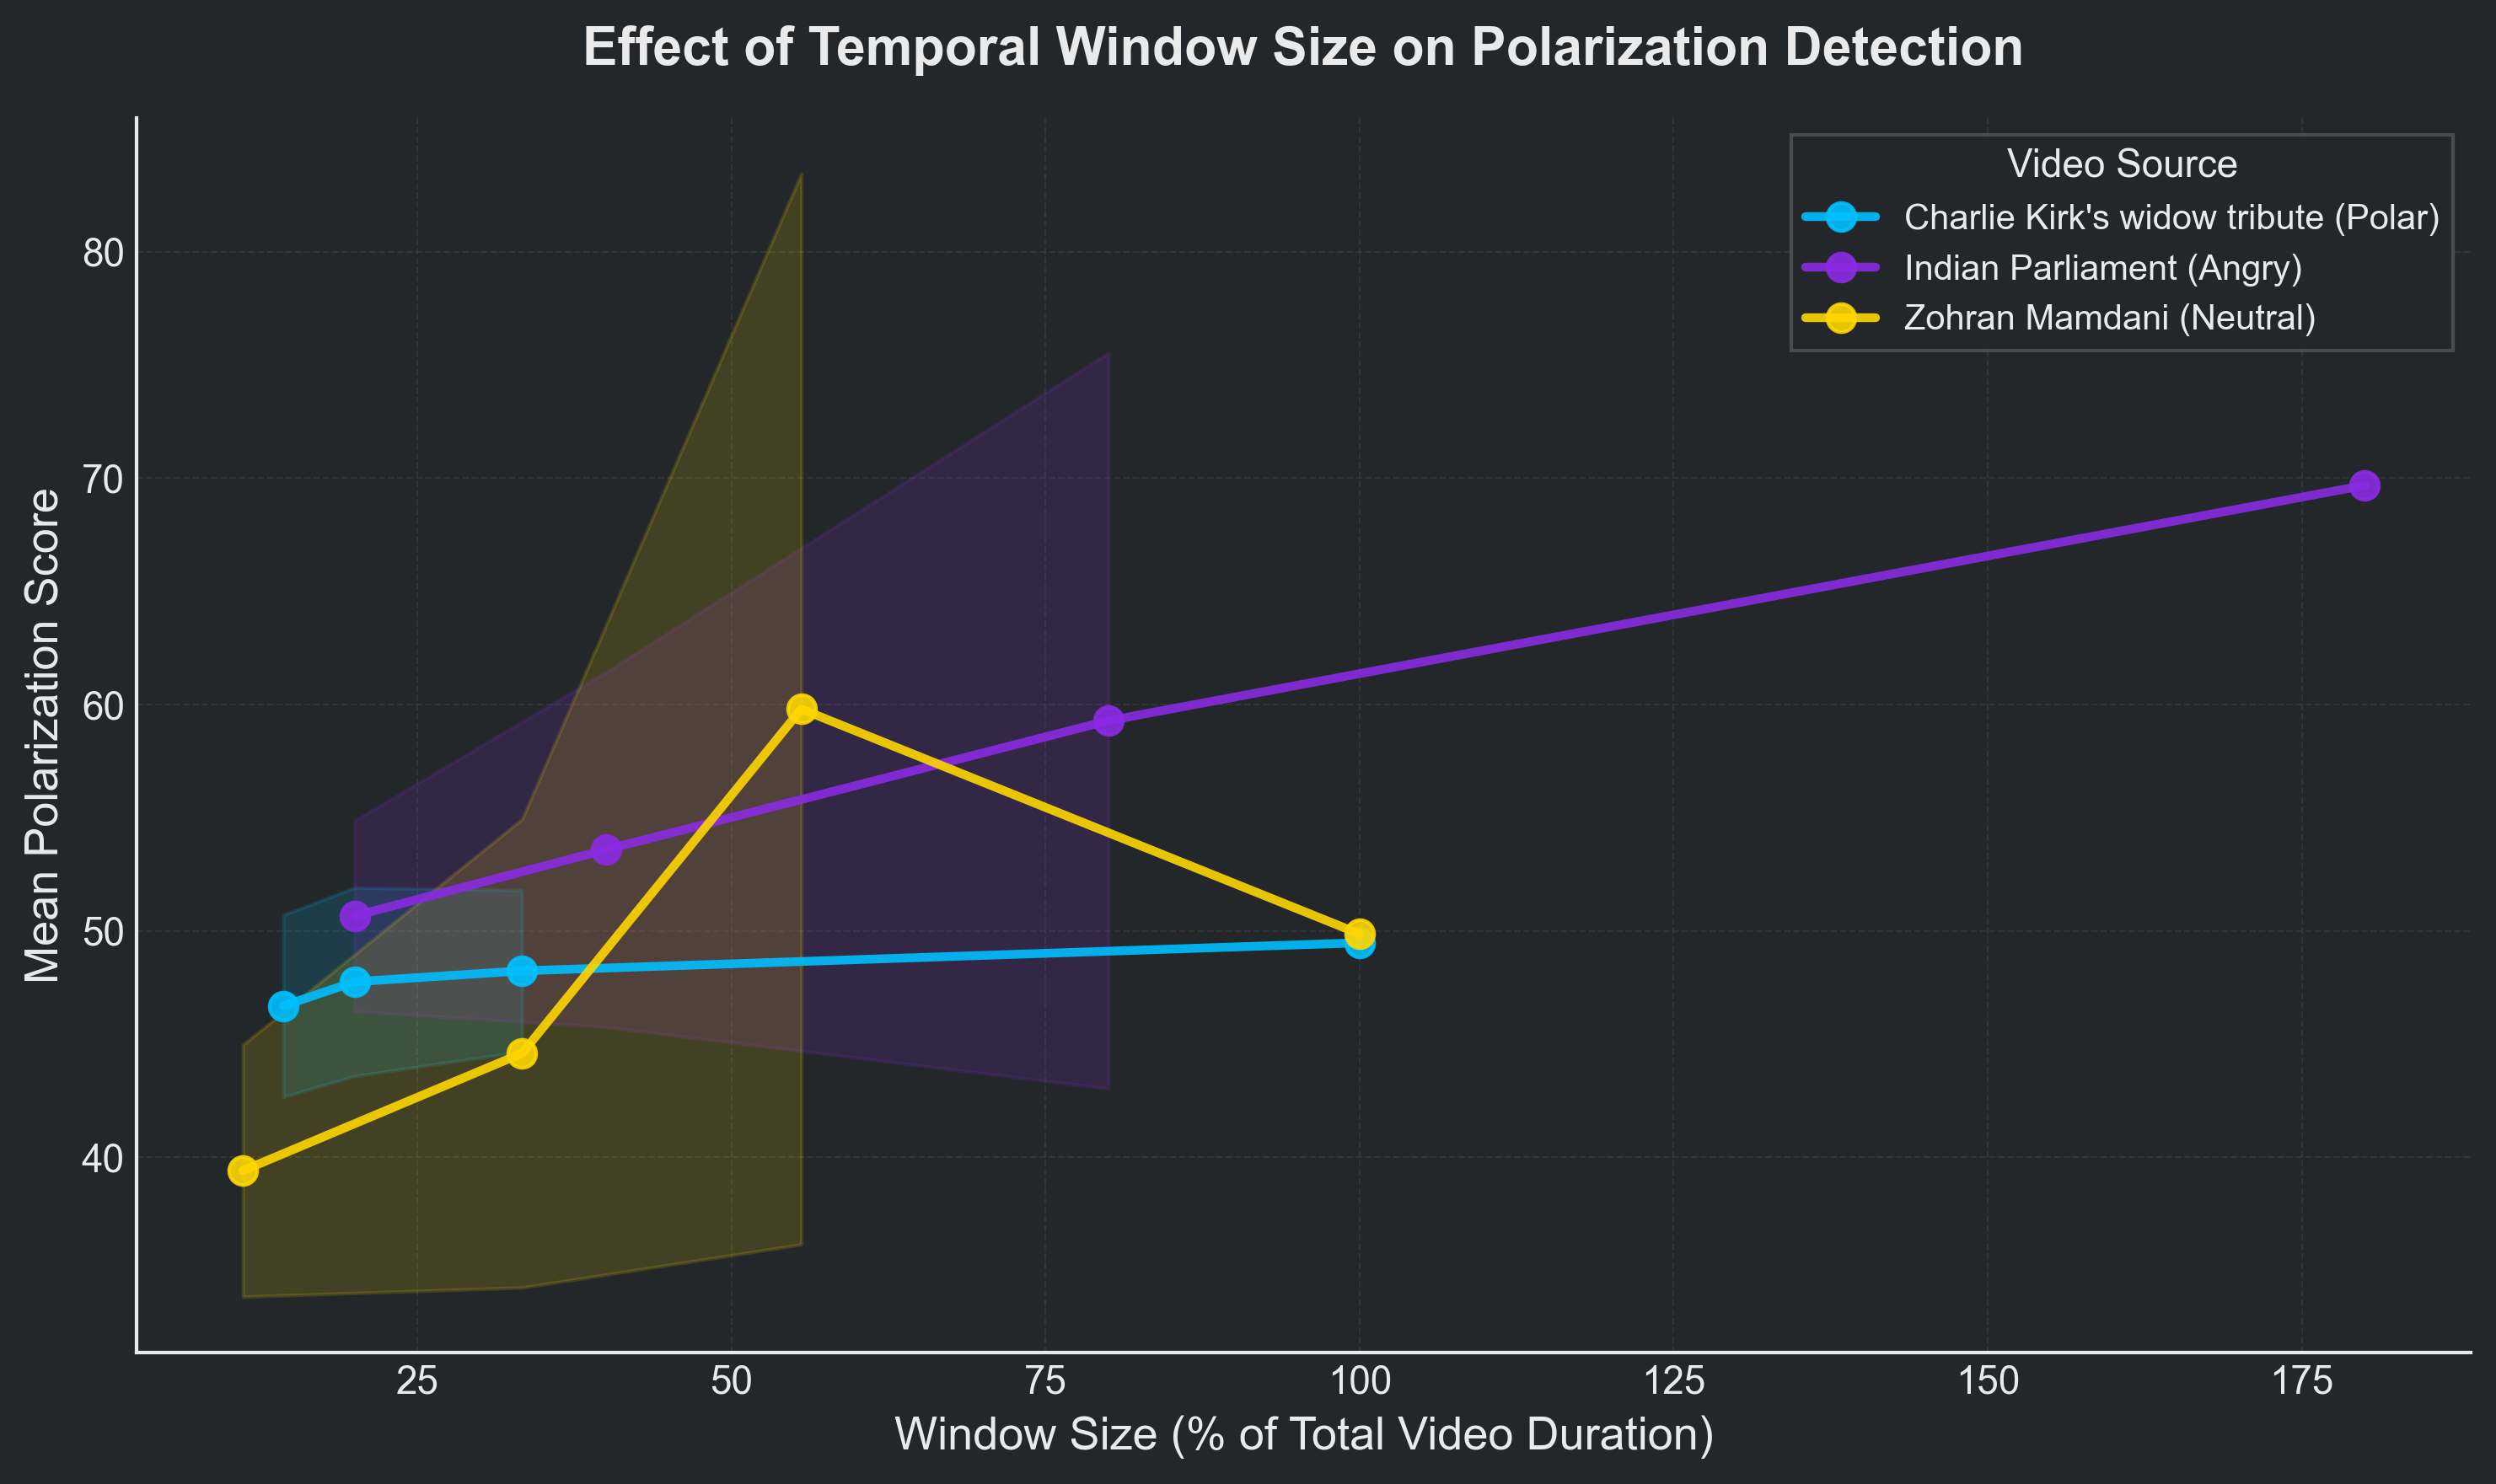

[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)


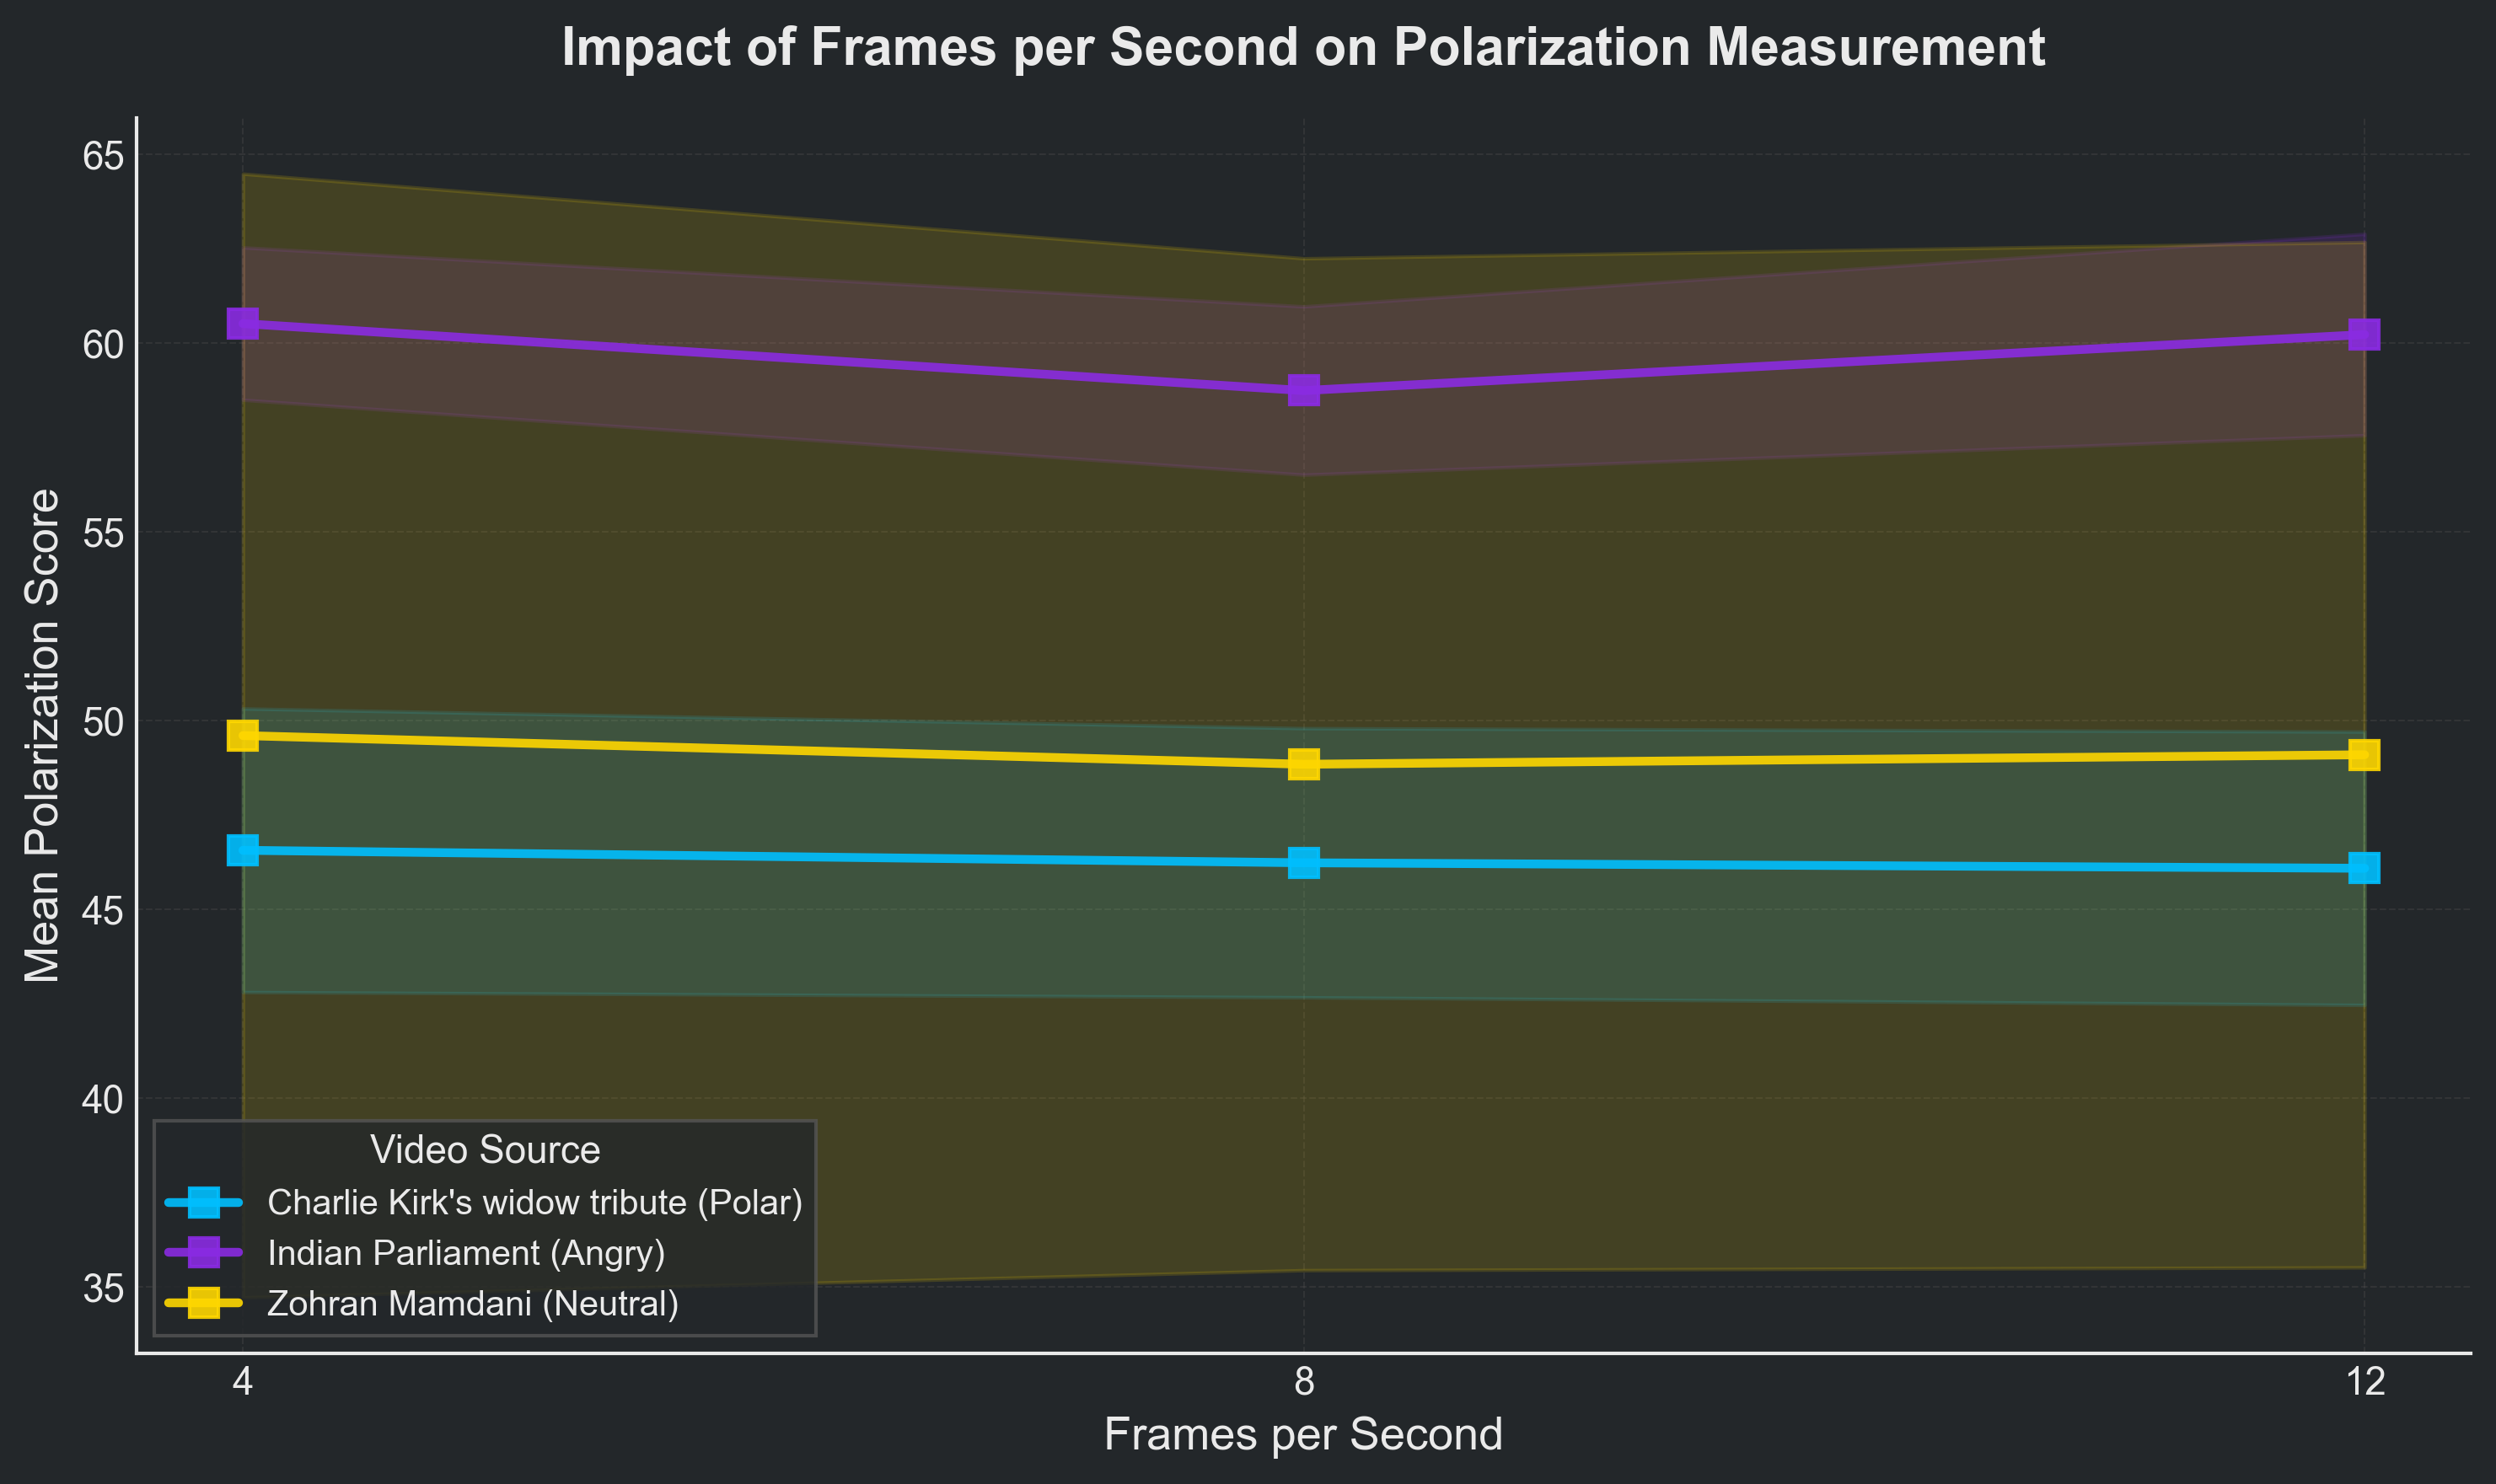

[3/3] Generating: Function Comparison Analysis (Bar Chart)


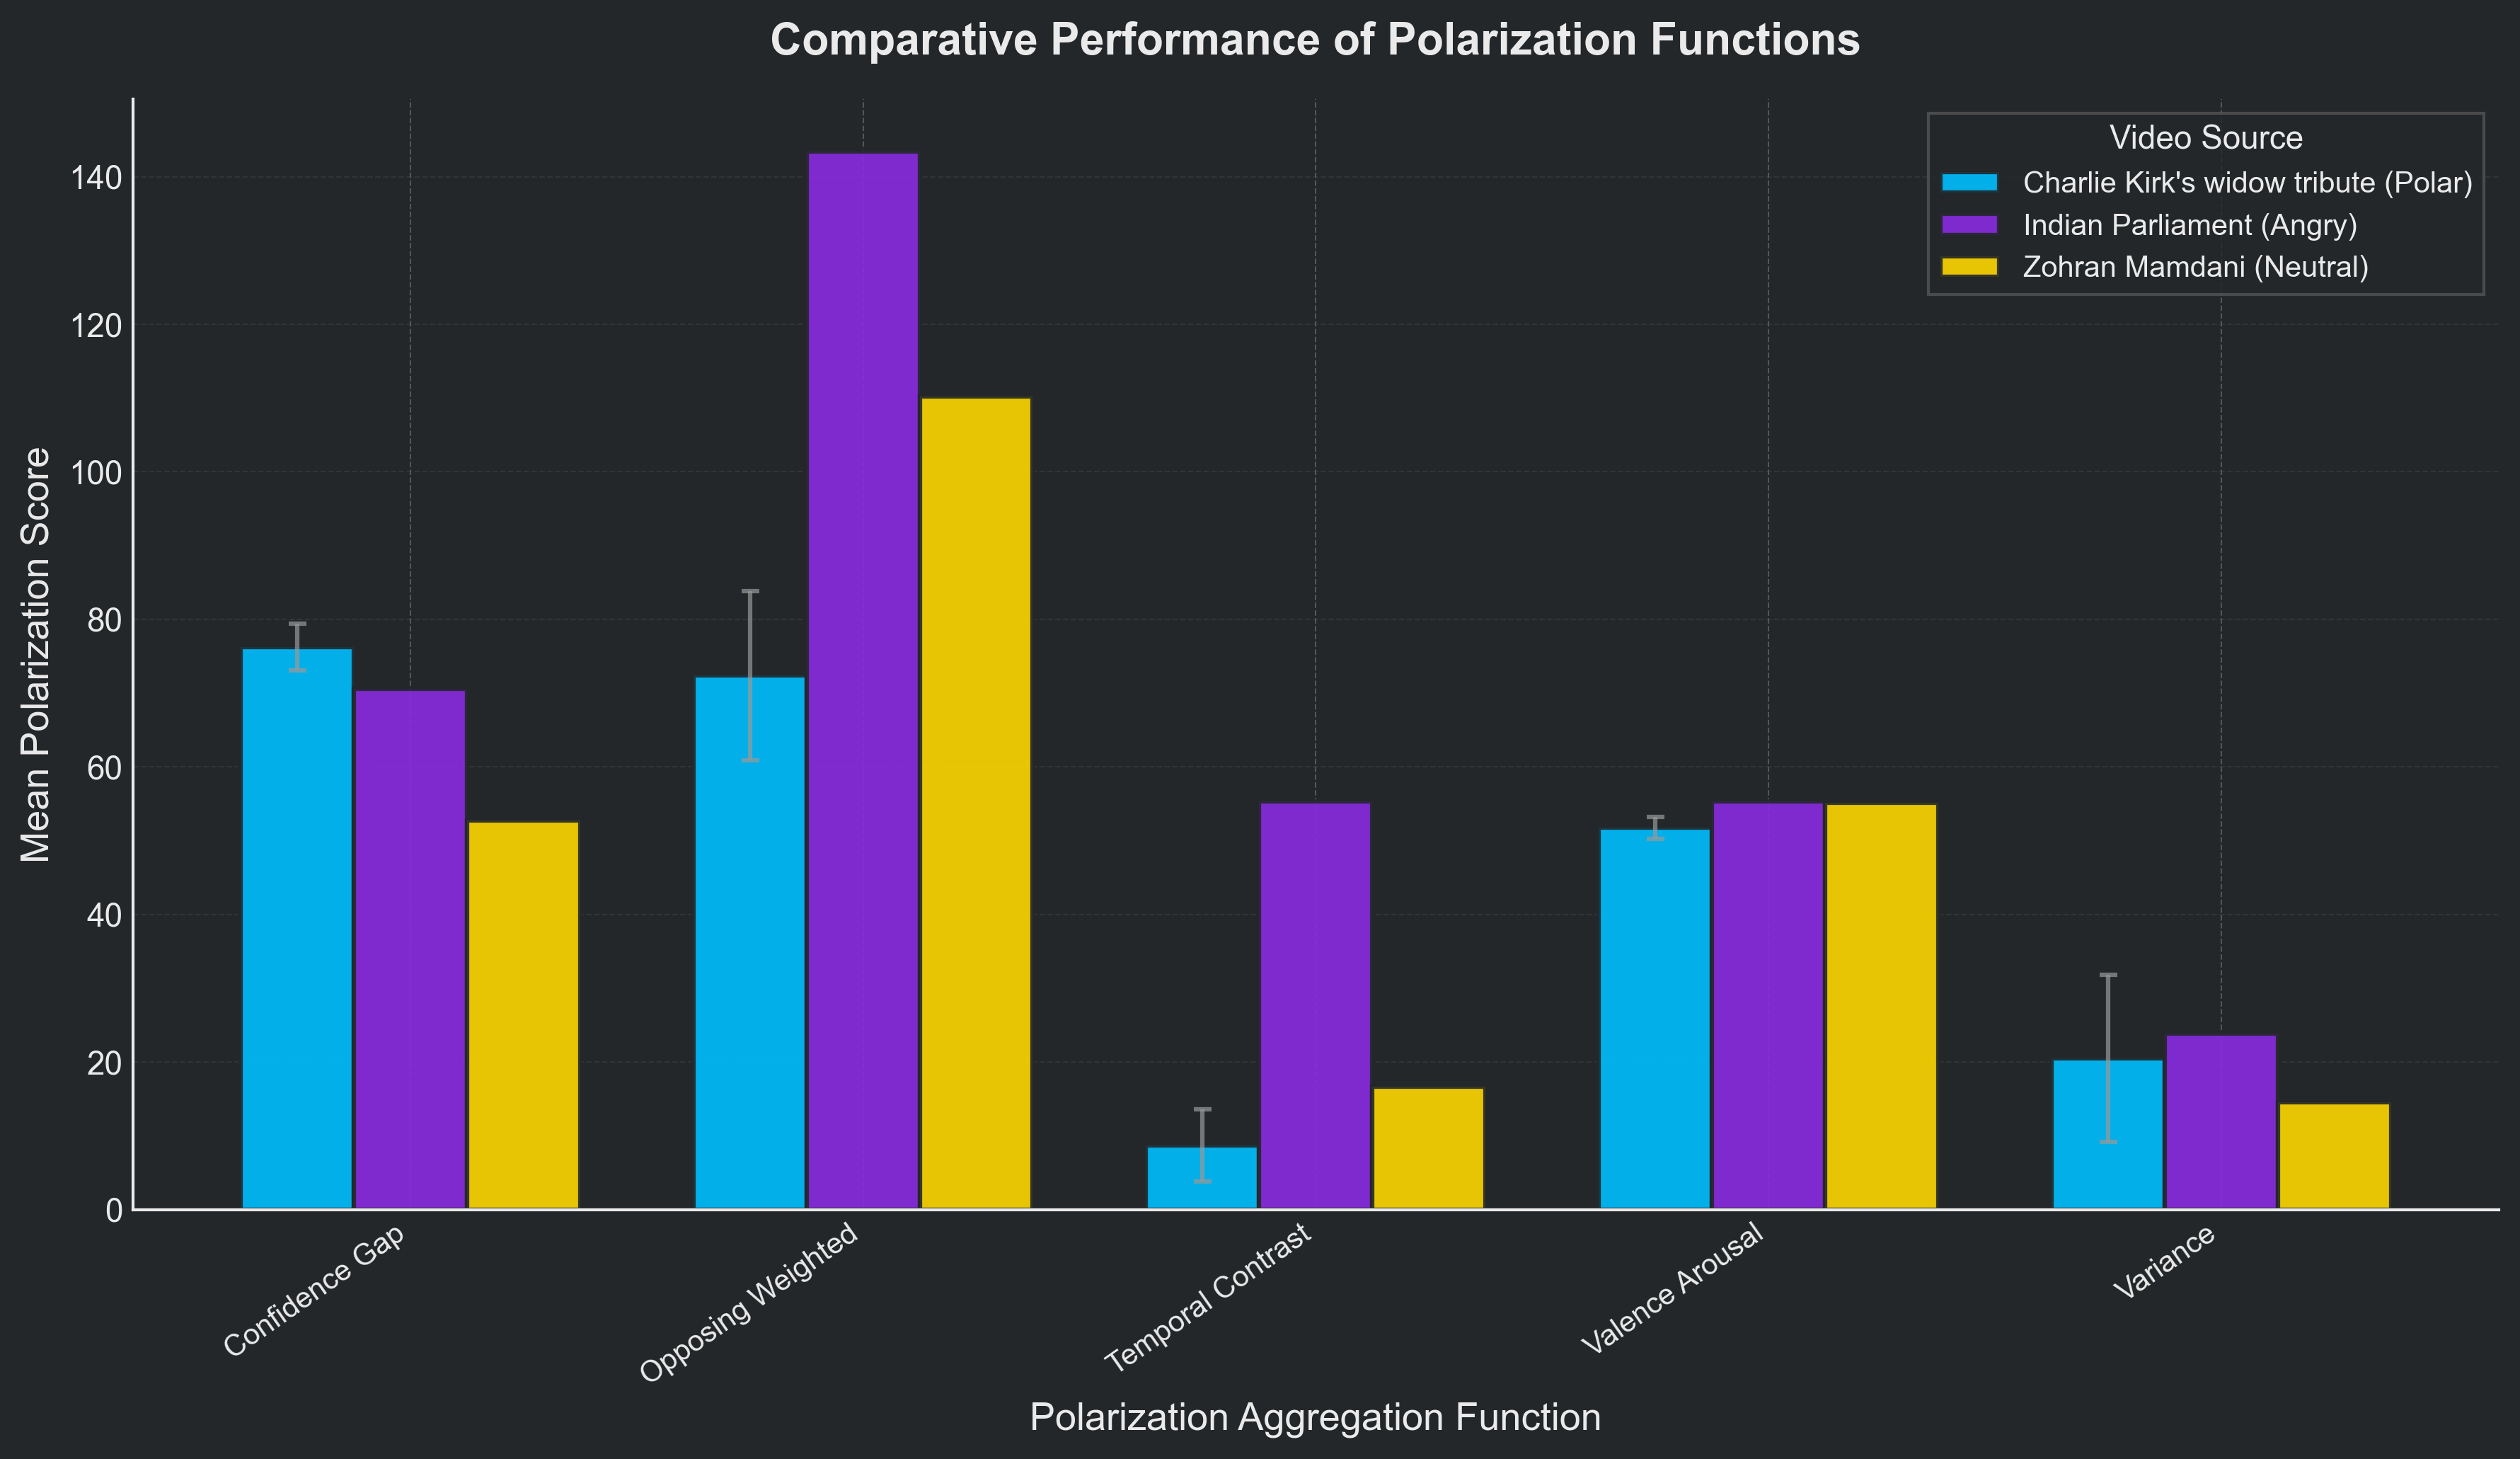


✓ All visualizations generated successfully
✓ High-resolution figures saved (300 DPI)

Done.


In [12]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# --- NEW: Professional Dark Theme Color Palette ---
COLORS = {
    'primary': '#00BFFF',     # DeepSkyBlue
    'secondary': '#8A2BE2',   # BlueViolet
    'tertiary': '#FFD700',    # Gold
    'background': '#23272A',  # Dark Charcoal
    'grid': '#555555',        # Mid-Grey for subtle grid
    'text': '#EAEAEA'         # Light Grey for text
}

# Custom palette for multiple videos
VIDEO_PALETTE = ['#00BFFF', '#8A2BE2', '#FFD700']

def set_publication_style():
    """Set consistent professional styling for all plots."""
    plt.rcParams['figure.facecolor'] = COLORS['background']
    plt.rcParams['axes.facecolor'] = COLORS['background']
    plt.rcParams['axes.edgecolor'] = COLORS['text']
    plt.rcParams['axes.labelcolor'] = COLORS['text']
    plt.rcParams['xtick.color'] = COLORS['text']
    plt.rcParams['ytick.color'] = COLORS['text']
    plt.rcParams['text.color'] = COLORS['text']
    plt.rcParams['grid.color'] = COLORS['grid']
    plt.rcParams['legend.facecolor'] = COLORS['background']
    plt.rcParams['legend.edgecolor'] = COLORS['grid']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11


def parse_data(video_paths):
    """Parse all experiment data into a DataFrame."""
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
       
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
           
            # Experiment 1: Aggregation Functions
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        std_score = df['polarization_score'].std()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 
                            'parameter': 'N/A', 'value': 0, 'function': func_name, 
                            'mean_score': mean_score, 'std_score': std_score
                        })

            # Experiment 2: Window Size
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                       
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 
                                    'parameter': 'Window Size (s)', 'value': win_size, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

            # Experiment 3: Frame Samples
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 
                                    'parameter': 'Frames per Second', 'value': frame_rate, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths, save_path=None):
    """
    Line plot for window size impact - best for showing trends over continuous variables.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == 'Window Size'].copy()
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
   
    plot_data = exp_df.groupby(['video', 'relative_window_size']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['relative_window_size'], video_data['mean_score'], 
                marker='o', linewidth=2.5, markersize=8, 
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['relative_window_size'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel('Window Size (% of Total Video Duration)', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Effect of Temporal Window Size on Polarization Detection', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11, 
              frameon=True, fancybox=False)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name, save_path=None):
    """
    Line plot for frame sampling - shows trends in discrete sampling rates.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
   
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['value'], video_data['mean_score'], 
                marker='s', linewidth=2.5, markersize=8,
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['value'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel(parameter_name, fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title(f'Impact of {parameter_name} on Polarization Measurement', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False)
    ax.grid(True, alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks(sorted(plot_data['value'].unique()))
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def plot_function_comparison(df, save_path=None):
    """
    Grouped bar chart - best for comparing categorical functions across videos.
    """
    set_publication_style()
    
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    func_df['function'] = func_df['function'].str.replace('_', ' ').str.title()
   
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

    unique_functions = sorted(func_df['function'].unique())
    x = np.arange(len(unique_functions))
    width = 0.25
    
    videos = sorted(func_df['video'].unique())
    for idx, video in enumerate(videos):
        video_data = func_df[func_df['video'] == video].set_index('function').reindex(unique_functions).reset_index()
        
        positions = x + (idx - len(videos) / 2 + 0.5) * width
        
        bars = ax.bar(positions, video_data['mean_score'], width, 
                      label=video, color=VIDEO_PALETTE[idx], alpha=0.9,
                      edgecolor=COLORS['background'], linewidth=1.5)
        
        if 'std_score' in video_data.columns:
            ax.errorbar(positions, video_data['mean_score'], 
                       yerr=video_data['std_score'],
                       fmt='none', ecolor='#999999', capsize=3, # Lighter error bar color
                       capthick=1.5, alpha=0.7)

    ax.set_xlabel('Polarization Aggregation Function', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Comparative Performance of Polarization Functions', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.set_xticks(x)
    ax.set_xticklabels(unique_functions, rotation=35, ha='right', fontsize=10)
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False)
    
    ax.grid(True, alpha=0.3, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def generate_summary_statistics(df):
    """Generate and print summary statistics for the report."""
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    for experiment in df['experiment'].unique():
        print(f"\n{experiment}:")
        exp_data = df[df['experiment'] == experiment]
        print(f"  Videos analyzed: {exp_data['video'].nunique()}")
        print(f"  Mean score range: {exp_data['mean_score'].min():.3f} - {exp_data['mean_score'].max():.3f}")


if __name__ == "__main__":
    print("Loading and parsing polarization analysis data...")
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        legend_mapping = {
            "CharlieKirk_FullWife": "Charlie Kirk's widow tribute (Polar)",
            "Indian_ParliAngry": "Indian Parliament (Angry)",
            "Zohran_Mamdani": "Zohran Mamdani (Neutral)"
        }
        master_df['video'] = master_df['video'].replace(legend_mapping)

        new_video_lengths = {legend_mapping.get(k, k): v for k, v in VIDEO_LENGTHS.items()}

        print(f"✓ Data loaded successfully")
        print(f"✓ Total records parsed: {len(master_df)}")
        print(f"✓ Video sources: {', '.join(sorted(master_df['video'].unique()))}")
        
        generate_summary_statistics(master_df)
       
        print("\n" + "="*70)
        print("GENERATING VISUALIZATIONS")
        print("="*70)
        
        print("\n[1/3] Generating: Relative Window Size Analysis (Line Plot)")
        plot_normalized_window_impact(master_df, new_video_lengths, 
                                      save_path='figure1_window_size_dark.png')
       
        print("[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            save_path='figure2_frame_sampling_dark.png')
       
        print("[3/3] Generating: Function Comparison Analysis (Bar Chart)")
        plot_function_comparison(master_df, save_path='figure3_function_comparison_dark.png')
       
        print("\n✓ All visualizations generated successfully")
        print("✓ High-resolution figures saved (300 DPI)")
        print("\nDone.")

Loading and parsing polarization analysis data...
✓ Data loaded successfully
✓ Total records parsed: 120
✓ Video sources: Charlie Kirk's widow tribute (Polar), Indian Parliament (Angry), Zohran Mamdani (Neutral)

SUMMARY STATISTICS

Function Comparison:
  Videos analyzed: 3
  Mean score range: 8.669 - 143.395

Frame Samples:
  Videos analyzed: 3
  Mean score range: 8.676 - 132.475

Window Size:
  Videos analyzed: 3
  Mean score range: 0.000 - 143.395

GENERATING VISUALIZATIONS

[1/3] Generating: Relative Window Size Analysis (Line Plot)


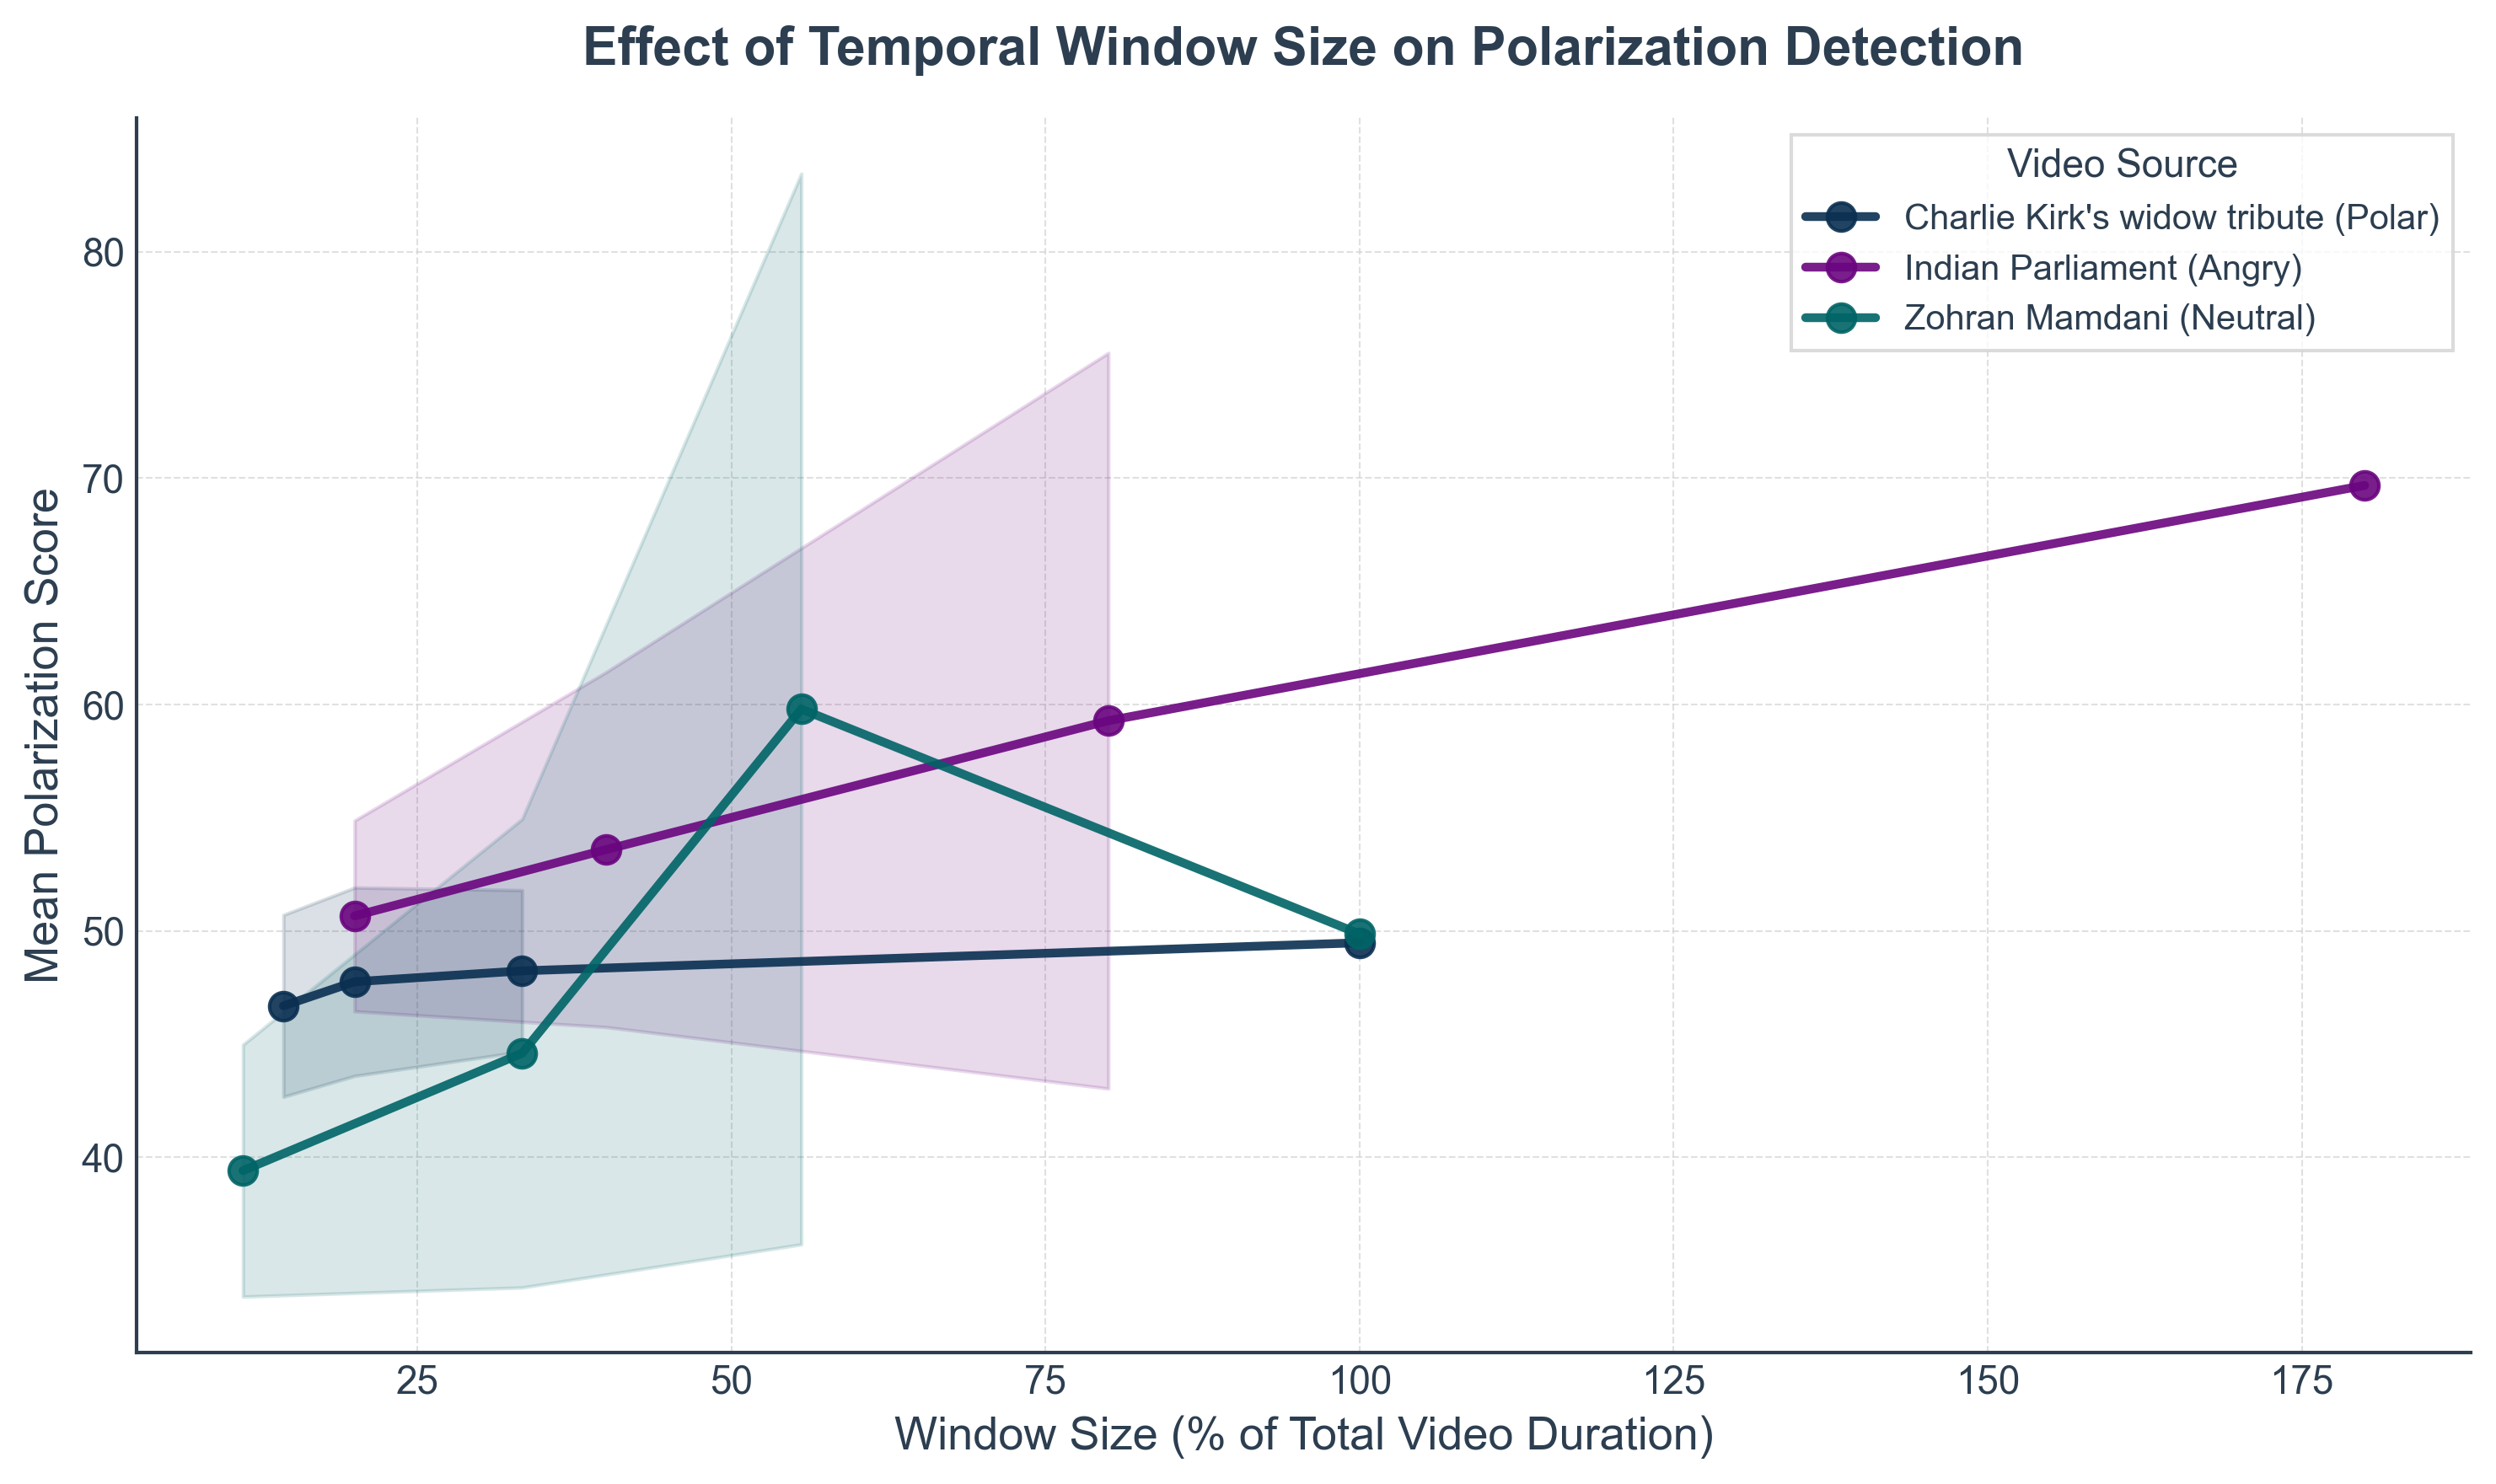

[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)


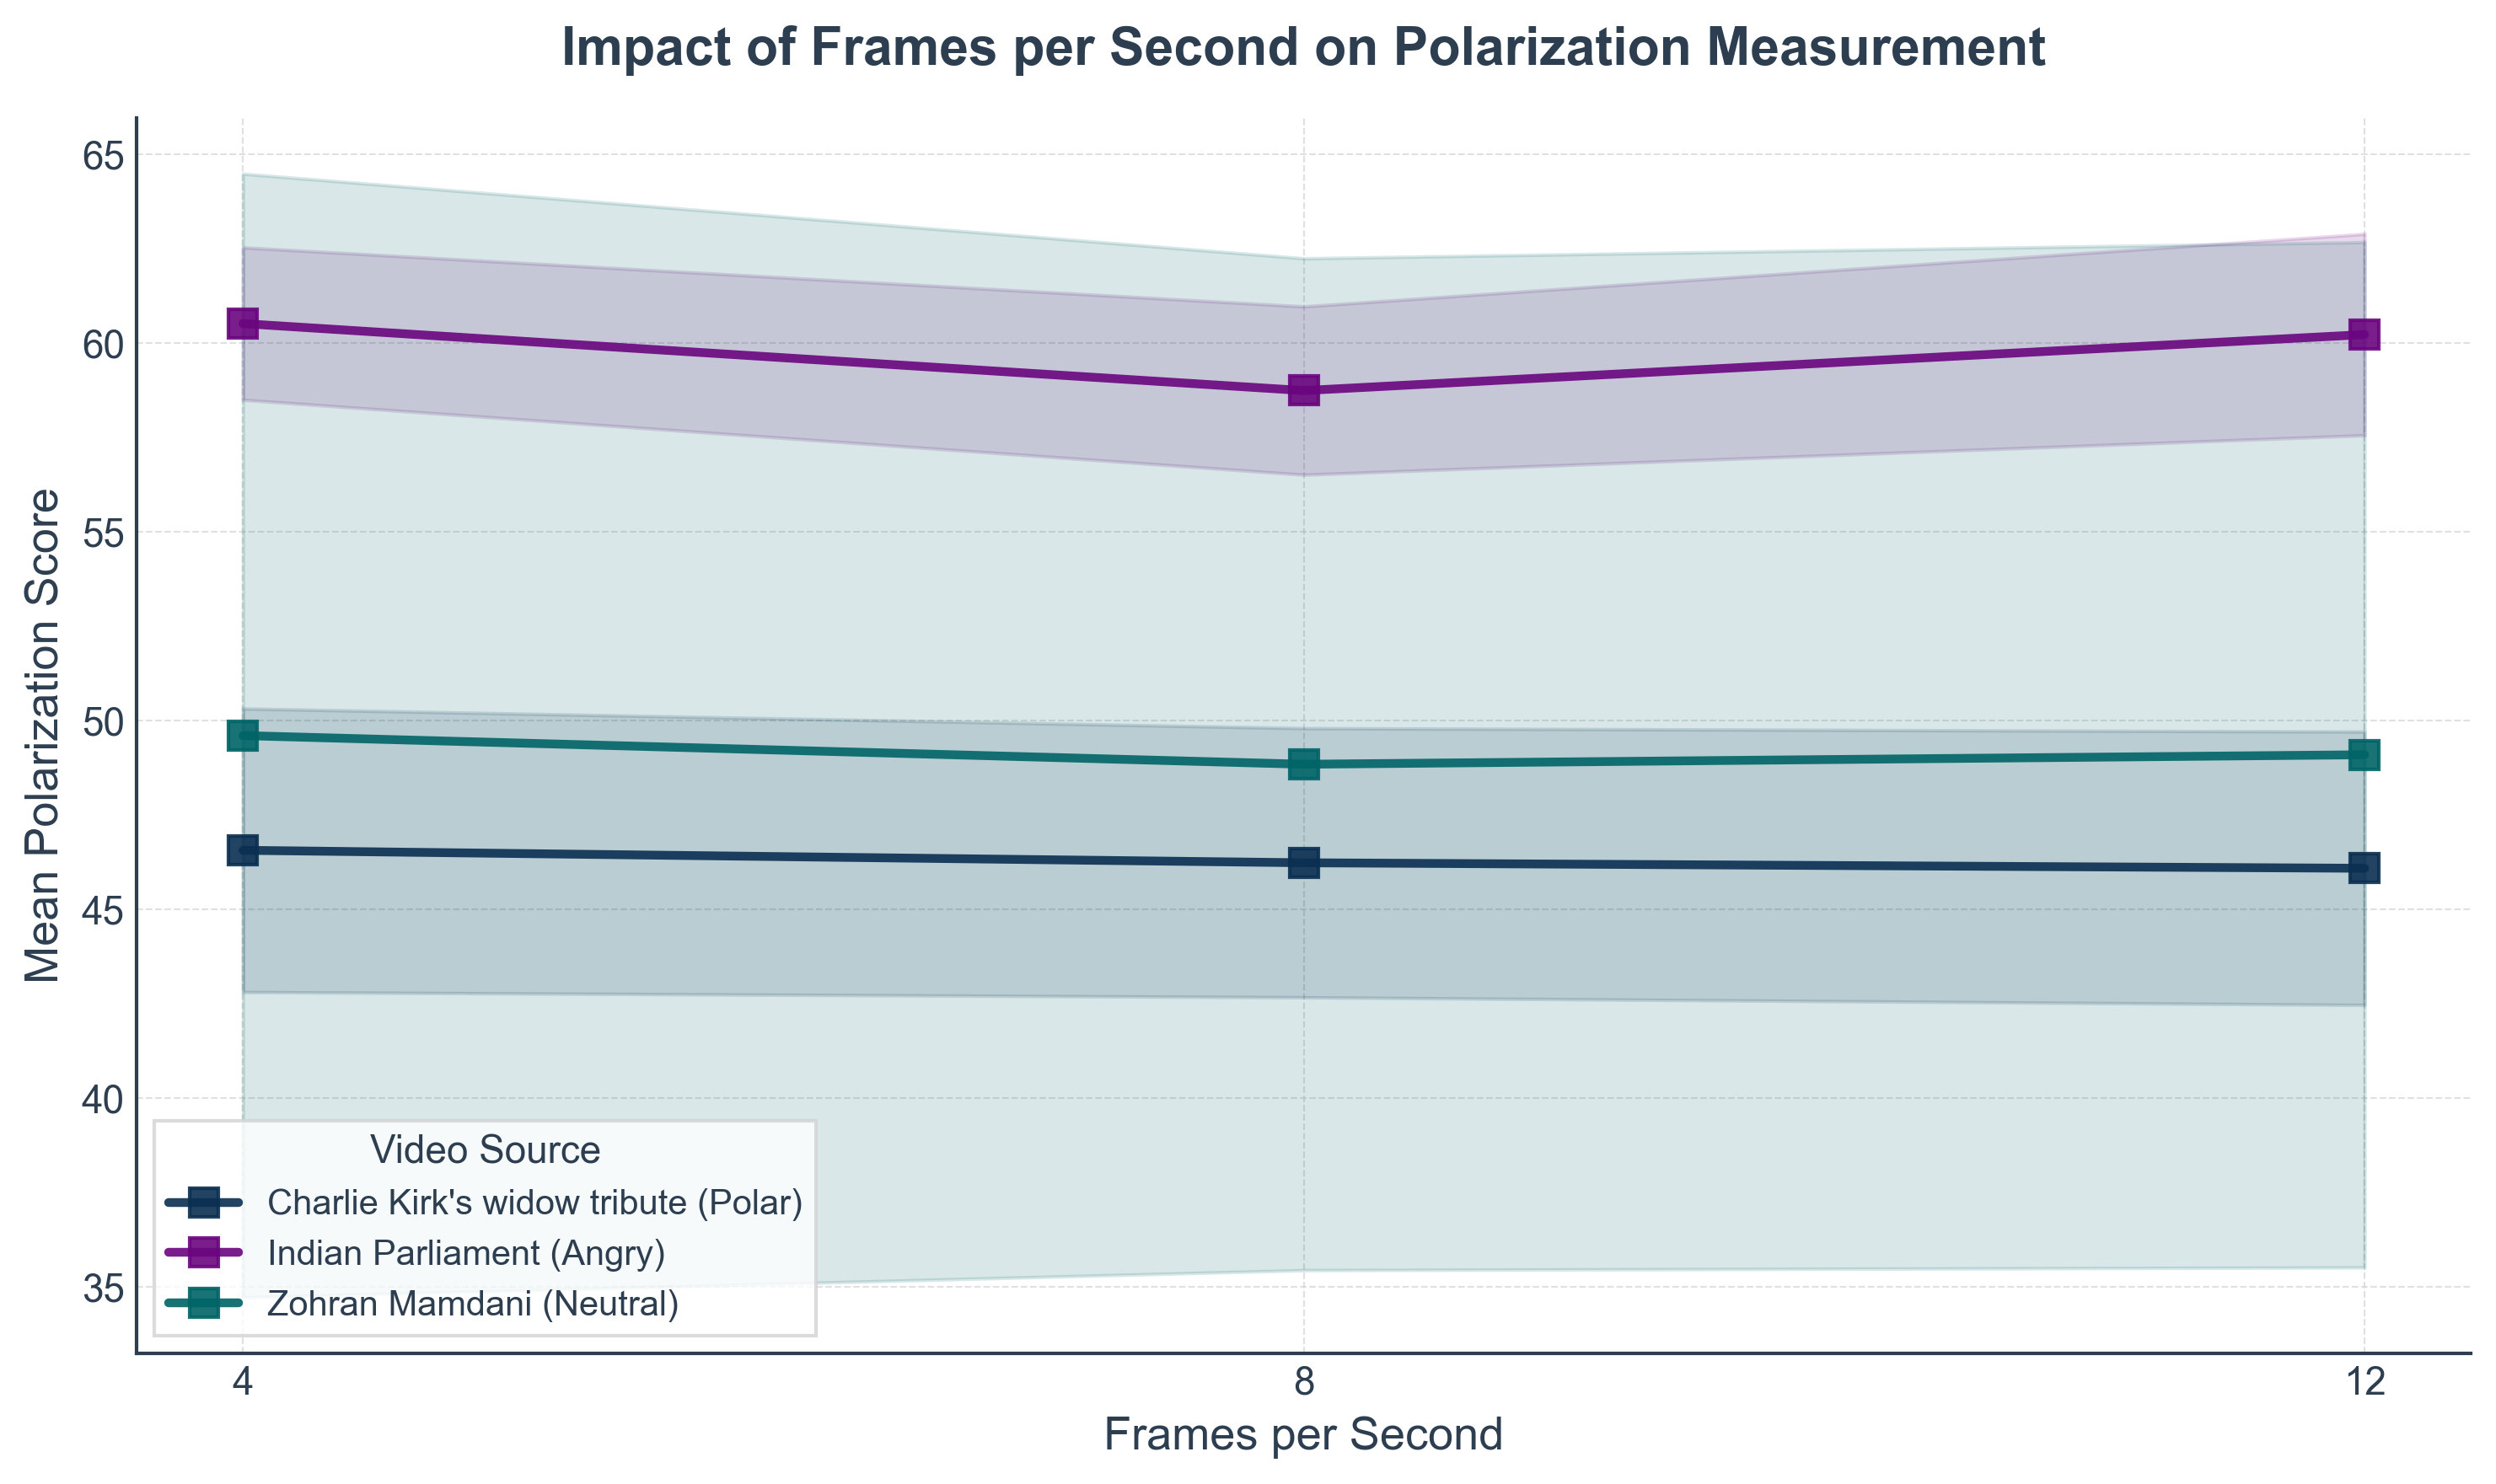

[3/3] Generating: Function Comparison Analysis (Bar Chart)


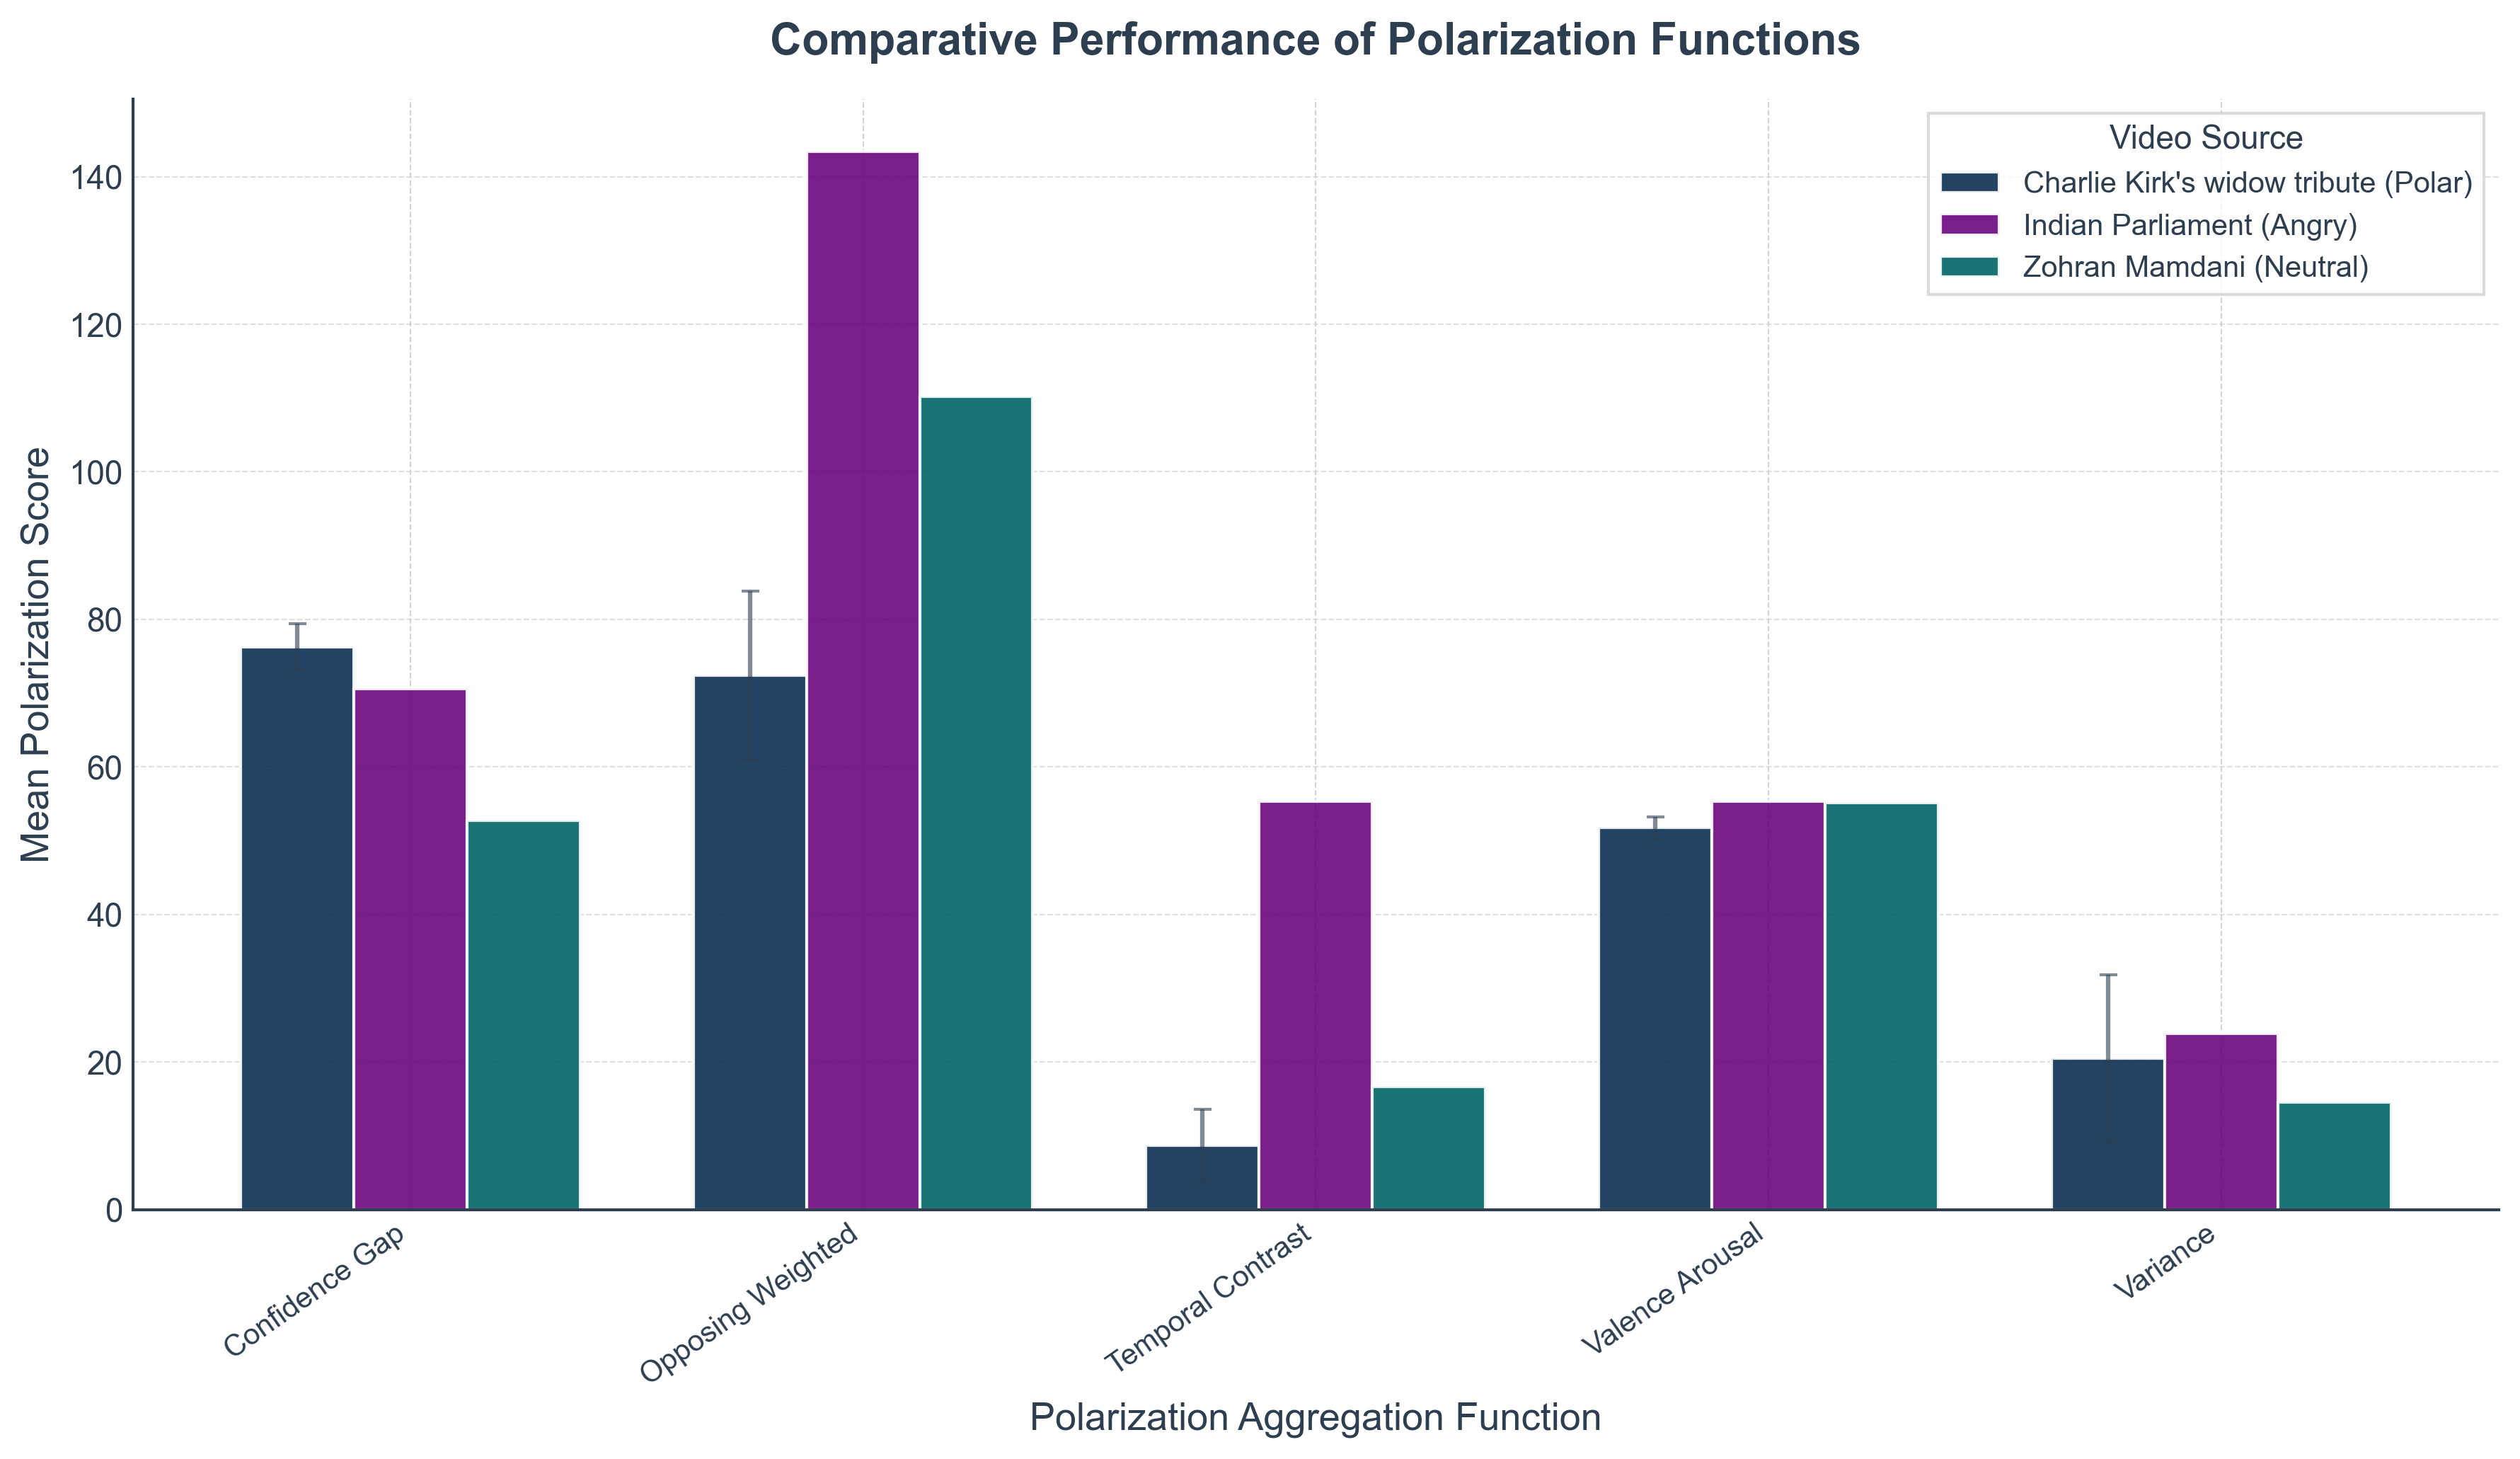


✓ All visualizations generated successfully
✓ High-resolution figures saved (300 DPI)

Done.


In [13]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# --- Configuration ---
VIDEO_PATHS = [
    "./Analysis/CharlieKirk_FullWife",
    "./Indian_ParliAngry",
    "./Zohran_Mamdani"
]

VIDEO_LENGTHS = {
    "CharlieKirk_FullWife": 300,
    "Indian_ParliAngry": 5,
    "Zohran_Mamdani": 9
}

# --- NEW: Professional "Dark on White" Theme ---
COLORS = {
    'primary': '#0A2F51',     # Deep Navy
    'secondary': '#6A057F',   # Rich Magenta/Purple
    'tertiary': '#006466',    # Dark Teal
    'background': '#FFFFFF',  # White
    'grid': '#D3D3D3',        # Light Grey for subtle grid
    'text': '#2C3E50'         # Dark Slate Grey/Blue for text
}

# Custom palette for multiple videos
VIDEO_PALETTE = ['#0A2F51', '#6A057F', '#006466']

def set_publication_style():
    """Set consistent professional styling for all plots."""
    plt.rcParams['figure.facecolor'] = COLORS['background']
    plt.rcParams['axes.facecolor'] = COLORS['background']
    plt.rcParams['axes.edgecolor'] = COLORS['text']
    plt.rcParams['axes.labelcolor'] = COLORS['text']
    plt.rcParams['xtick.color'] = COLORS['text']
    plt.rcParams['ytick.color'] = COLORS['text']
    plt.rcParams['text.color'] = COLORS['text']
    plt.rcParams['grid.color'] = COLORS['grid']
    plt.rcParams['legend.facecolor'] = COLORS['background']
    plt.rcParams['legend.edgecolor'] = COLORS['grid']
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['grid.linewidth'] = 0.5
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    plt.rcParams['font.size'] = 11


def parse_data(video_paths):
    """Parse all experiment data into a DataFrame."""
    all_results = []

    for video_path in video_paths:
        if not os.path.isdir(video_path):
            print(f"Warning: Directory not found, skipping: {video_path}")
            continue
       
        video_name = os.path.basename(video_path)

        for experiment_folder in os.listdir(video_path):
            experiment_path = os.path.join(video_path, experiment_folder)
            if not os.path.isdir(experiment_path):
                continue
           
            # Experiment 1: Aggregation Functions
            if 'Agg_functions_changed_e1' in experiment_folder:
                for csv_file in os.listdir(experiment_path):
                    if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                        func_name = csv_file.replace('.csv', '')
                        df = pd.read_csv(os.path.join(experiment_path, csv_file))
                        mean_score = df['polarization_score'].mean()
                        std_score = df['polarization_score'].std()
                        all_results.append({
                            'video': video_name, 'experiment': 'Function Comparison', 
                            'parameter': 'N/A', 'value': 0, 'function': func_name, 
                            'mean_score': mean_score, 'std_score': std_score
                        })

            # Experiment 2: Window Size
            elif 'Window_size_changed_e2' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                    if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue
                       
                        win_size = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Window Size', 
                                    'parameter': 'Window Size (s)', 'value': win_size, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

            # Experiment 3: Frame Samples
            elif 'Frame_samples_changed_e3' in experiment_folder:
                for param_folder in os.listdir(experiment_path):
                     if os.path.isdir(os.path.join(experiment_path, param_folder)):
                        match = re.search(r'(\d+)', param_folder)
                        if not match: continue

                        frame_rate = int(match.group(1))
                        param_path = os.path.join(experiment_path, param_folder)
                        for csv_file in os.listdir(param_path):
                            if csv_file.startswith('calculate_polarization_') and csv_file.endswith('.csv'):
                                func_name = csv_file.replace('.csv', '')
                                df = pd.read_csv(os.path.join(param_path, csv_file))
                                mean_score = df['polarization_score'].mean()
                                std_score = df['polarization_score'].std()
                                all_results.append({
                                    'video': video_name, 'experiment': 'Frame Samples', 
                                    'parameter': 'Frames per Second', 'value': frame_rate, 
                                    'function': func_name, 'mean_score': mean_score,
                                    'std_score': std_score
                                })

    return pd.DataFrame(all_results)


def plot_normalized_window_impact(df, video_lengths, save_path=None):
    """
    Line plot for window size impact - best for showing trends over continuous variables.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == 'Window Size'].copy()
    exp_df['video_length'] = exp_df['video'].map(video_lengths)
    exp_df['relative_window_size'] = (exp_df['value'] / exp_df['video_length']) * 100
   
    plot_data = exp_df.groupby(['video', 'relative_window_size']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['relative_window_size'], video_data['mean_score'], 
                marker='o', linewidth=2.5, markersize=8, 
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['relative_window_size'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel('Window Size (% of Total Video Duration)', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Effect of Temporal Window Size on Polarization Detection', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11, 
              frameon=True, fancybox=False)
    ax.grid(True, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def plot_parameter_impact(df, experiment_name, parameter_name, save_path=None):
    """
    Line plot for frame sampling - shows trends in discrete sampling rates.
    """
    set_publication_style()
    
    exp_df = df[df['experiment'] == experiment_name].copy()
    plot_data = exp_df.groupby(['video', 'value']).agg({
        'mean_score': 'mean',
        'std_score': 'mean'
    }).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
   
    videos = sorted(plot_data['video'].unique())
    for idx, video in enumerate(videos):
        video_data = plot_data[plot_data['video'] == video]
        ax.plot(video_data['value'], video_data['mean_score'], 
                marker='s', linewidth=2.5, markersize=8,
                color=VIDEO_PALETTE[idx], label=video, alpha=0.9)
        
        ax.fill_between(video_data['value'],
                        video_data['mean_score'] - video_data['std_score'],
                        video_data['mean_score'] + video_data['std_score'],
                        color=VIDEO_PALETTE[idx], alpha=0.15)
   
    ax.set_xlabel(parameter_name, fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title(f'Impact of {parameter_name} on Polarization Measurement', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False)
    ax.grid(True, alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xticks(sorted(plot_data['value'].unique()))
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def plot_function_comparison(df, save_path=None):
    """
    Grouped bar chart - best for comparing categorical functions across videos.
    """
    set_publication_style()
    
    func_df = df[df['experiment'] == 'Function Comparison'].copy()
    func_df['function'] = func_df['function'].str.replace('calculate_polarization_', '')
    func_df['function'] = func_df['function'].str.replace('_', ' ').str.title()
   
    fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

    unique_functions = sorted(func_df['function'].unique())
    x = np.arange(len(unique_functions))
    width = 0.25
    
    videos = sorted(func_df['video'].unique())
    for idx, video in enumerate(videos):
        video_data = func_df[func_df['video'] == video].set_index('function').reindex(unique_functions).reset_index()
        
        positions = x + (idx - len(videos) / 2 + 0.5) * width
        
        bars = ax.bar(positions, video_data['mean_score'], width, 
                      label=video, color=VIDEO_PALETTE[idx], alpha=0.9,
                      edgecolor='white', linewidth=1)
        
        if 'std_score' in video_data.columns:
            ax.errorbar(positions, video_data['mean_score'], 
                       yerr=video_data['std_score'],
                       fmt='none', ecolor=COLORS['text'], capsize=3,
                       capthick=1, alpha=0.6)

    ax.set_xlabel('Polarization Aggregation Function', fontsize=13, fontweight='500')
    ax.set_ylabel('Mean Polarization Score', fontsize=13, fontweight='500')
    ax.set_title('Comparative Performance of Polarization Functions', 
                 fontsize=15, fontweight='600', pad=15)
    
    ax.set_xticks(x)
    ax.set_xticklabels(unique_functions, rotation=35, ha='right', fontsize=10)
    ax.legend(title='Video Source', fontsize=10, title_fontsize=11,
              frameon=True, fancybox=False)
    
    ax.grid(True, alpha=0.7, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor=COLORS['background'])
    plt.show()


def generate_summary_statistics(df):
    """Generate and print summary statistics for the report."""
    print("\n" + "="*70)
    print("SUMMARY STATISTICS")
    print("="*70)
    
    for experiment in df['experiment'].unique():
        print(f"\n{experiment}:")
        exp_data = df[df['experiment'] == experiment]
        print(f"  Videos analyzed: {exp_data['video'].nunique()}")
        print(f"  Mean score range: {exp_data['mean_score'].min():.3f} - {exp_data['mean_score'].max():.3f}")


if __name__ == "__main__":
    print("Loading and parsing polarization analysis data...")
    master_df = parse_data(VIDEO_PATHS)

    if master_df.empty:
        print("No data found. Please check your VIDEO_PATHS and directory structure.")
    else:
        legend_mapping = {
            "CharlieKirk_FullWife": "Charlie Kirk's widow tribute (Polar)",
            "Indian_ParliAngry": "Indian Parliament (Angry)",
            "Zohran_Mamdani": "Zohran Mamdani (Neutral)"
        }
        master_df['video'] = master_df['video'].replace(legend_mapping)

        new_video_lengths = {legend_mapping.get(k, k): v for k, v in VIDEO_LENGTHS.items()}

        print(f"✓ Data loaded successfully")
        print(f"✓ Total records parsed: {len(master_df)}")
        print(f"✓ Video sources: {', '.join(sorted(master_df['video'].unique()))}")
        
        generate_summary_statistics(master_df)
       
        print("\n" + "="*70)
        print("GENERATING VISUALIZATIONS")
        print("="*70)
        
        print("\n[1/3] Generating: Relative Window Size Analysis (Line Plot)")
        plot_normalized_window_impact(master_df, new_video_lengths, 
                                      save_path='figure1_window_size_light.png')
       
        print("[2/3] Generating: Frame Sampling Rate Analysis (Line Plot)")
        plot_parameter_impact(master_df, 'Frame Samples', 'Frames per Second',
                            save_path='figure2_frame_sampling_light.png')
       
        print("[3/3] Generating: Function Comparison Analysis (Bar Chart)")
        plot_function_comparison(master_df, save_path='figure3_function_comparison_light.png')
       
        print("\n✓ All visualizations generated successfully")
        print("✓ High-resolution figures saved (300 DPI)")
        print("\nDone.")